In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import pandas as pd
import numpy as np
!pip install bioinfokit
import bioinfokit as bio
import seaborn as sns
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
df = pd.read_csv("/content/drive/MyDrive/McDonalds/McDonald.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [158]:
df.isnull().mean()

yummy             0.0
convenient        0.0
spicy             0.0
fattening         0.0
greasy            0.0
fast              0.0
cheap             0.0
tasty             0.0
expensive         0.0
healthy           0.0
disgusting        0.0
Like              0.0
Age               0.0
VisitFrequency    0.0
Gender            0.0
dtype: float64

In [159]:
df.mean()

<ipython-input-159-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Age    44.604955
dtype: float64

In [160]:
columns = df.columns

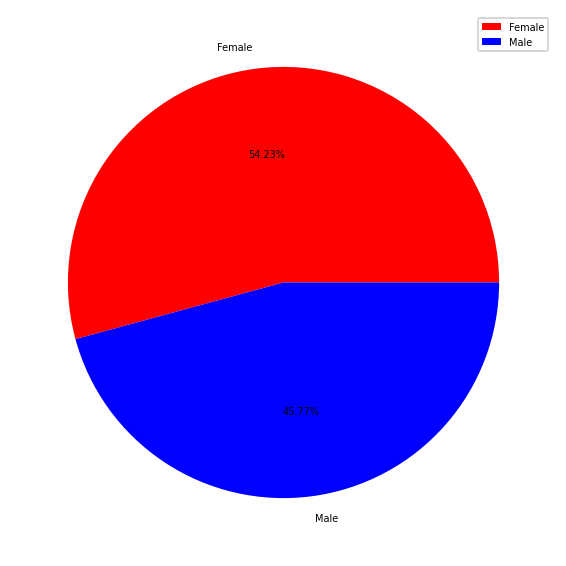

In [161]:
Gender = ["Female", "Male"]
Color = ["red", "blue"]
Size = df["Gender"].value_counts()
plt.pie(Size, labels=Gender, colors=Color, autopct="%.2f%%")
plt.legend()
plt.show()

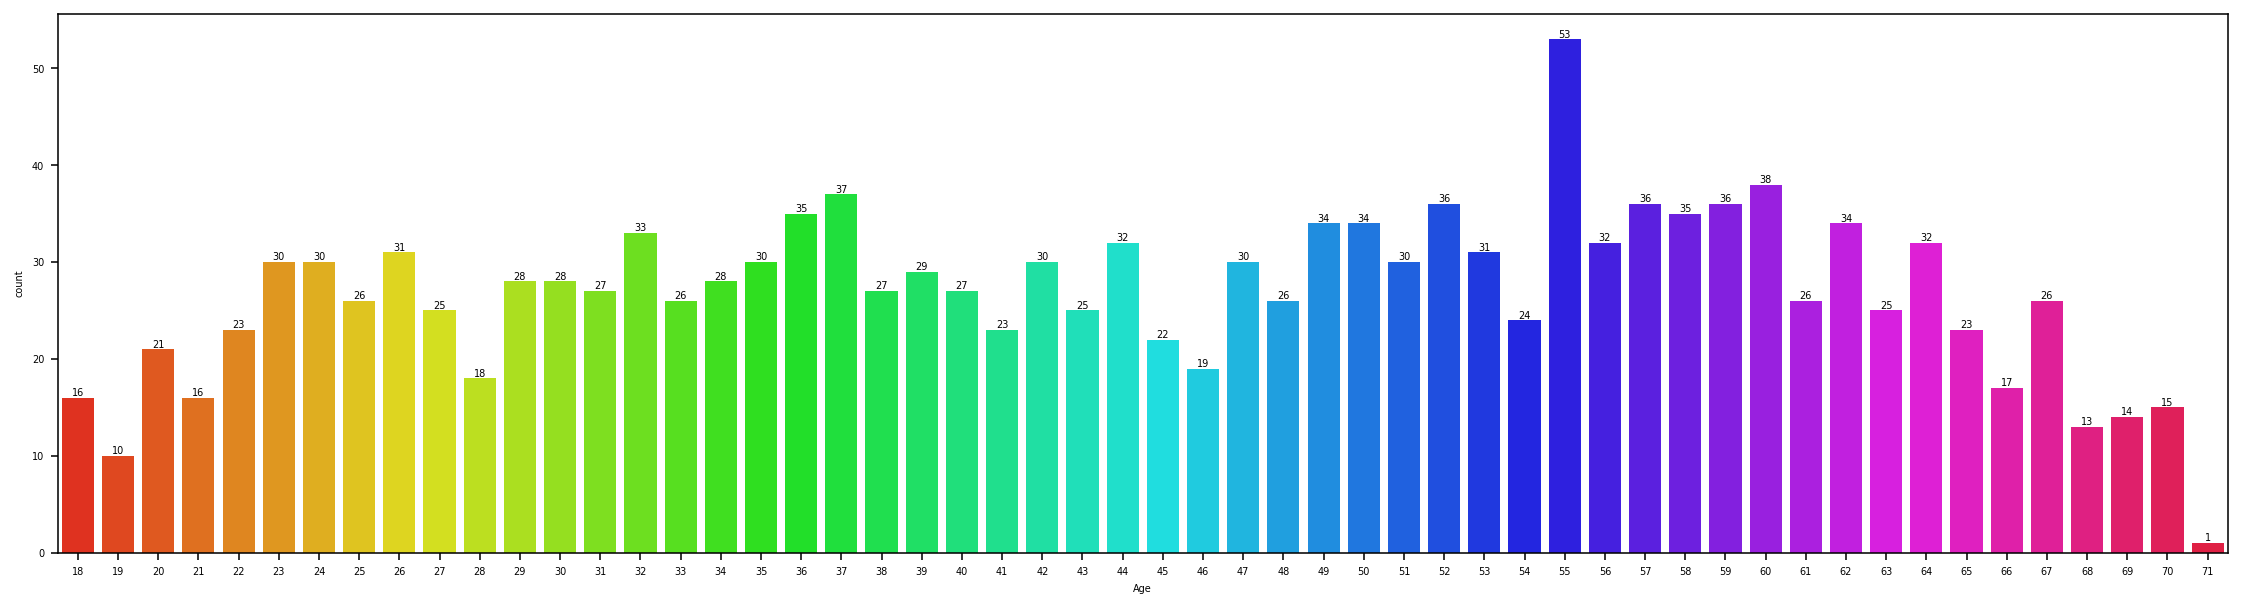

In [162]:
f = sns.countplot(x=df["Age"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (20, 5)

In [163]:
df["Like"]=df["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
    
for i in cols:
    df[i]=le.fit_transform(df[i])

df    

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


Text(0, 0.5, 'Number of Persons')

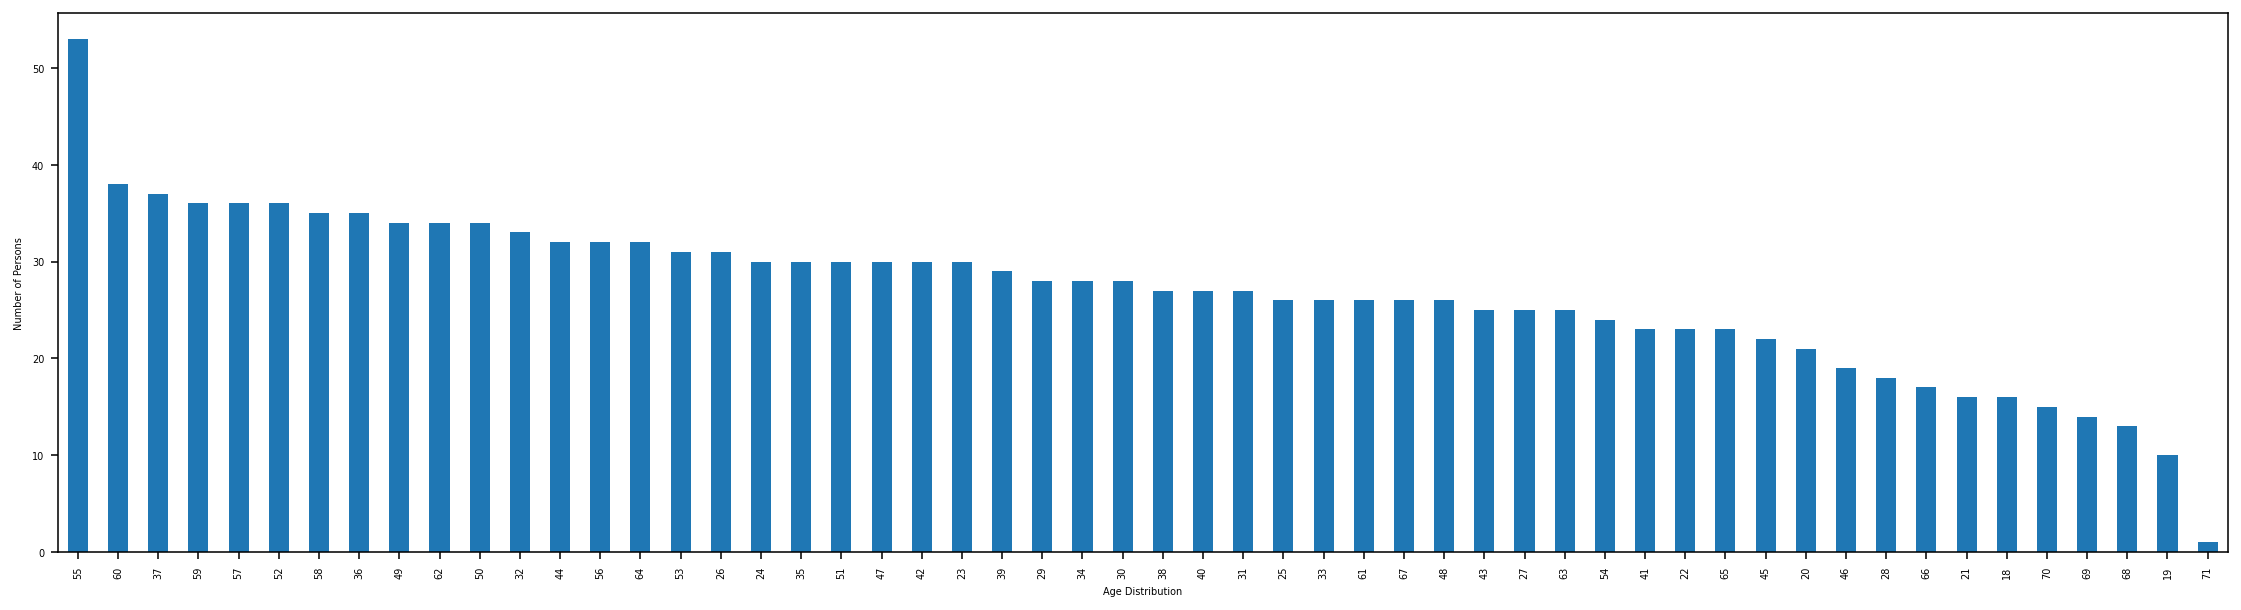

In [165]:
plt.figure(figsize=(20,5))
df.Age.value_counts().plot(kind='bar')
plt.xlabel('Age Distribution')
plt.ylabel('Number of Persons')

Text(0.5, 0, 'Frequency')

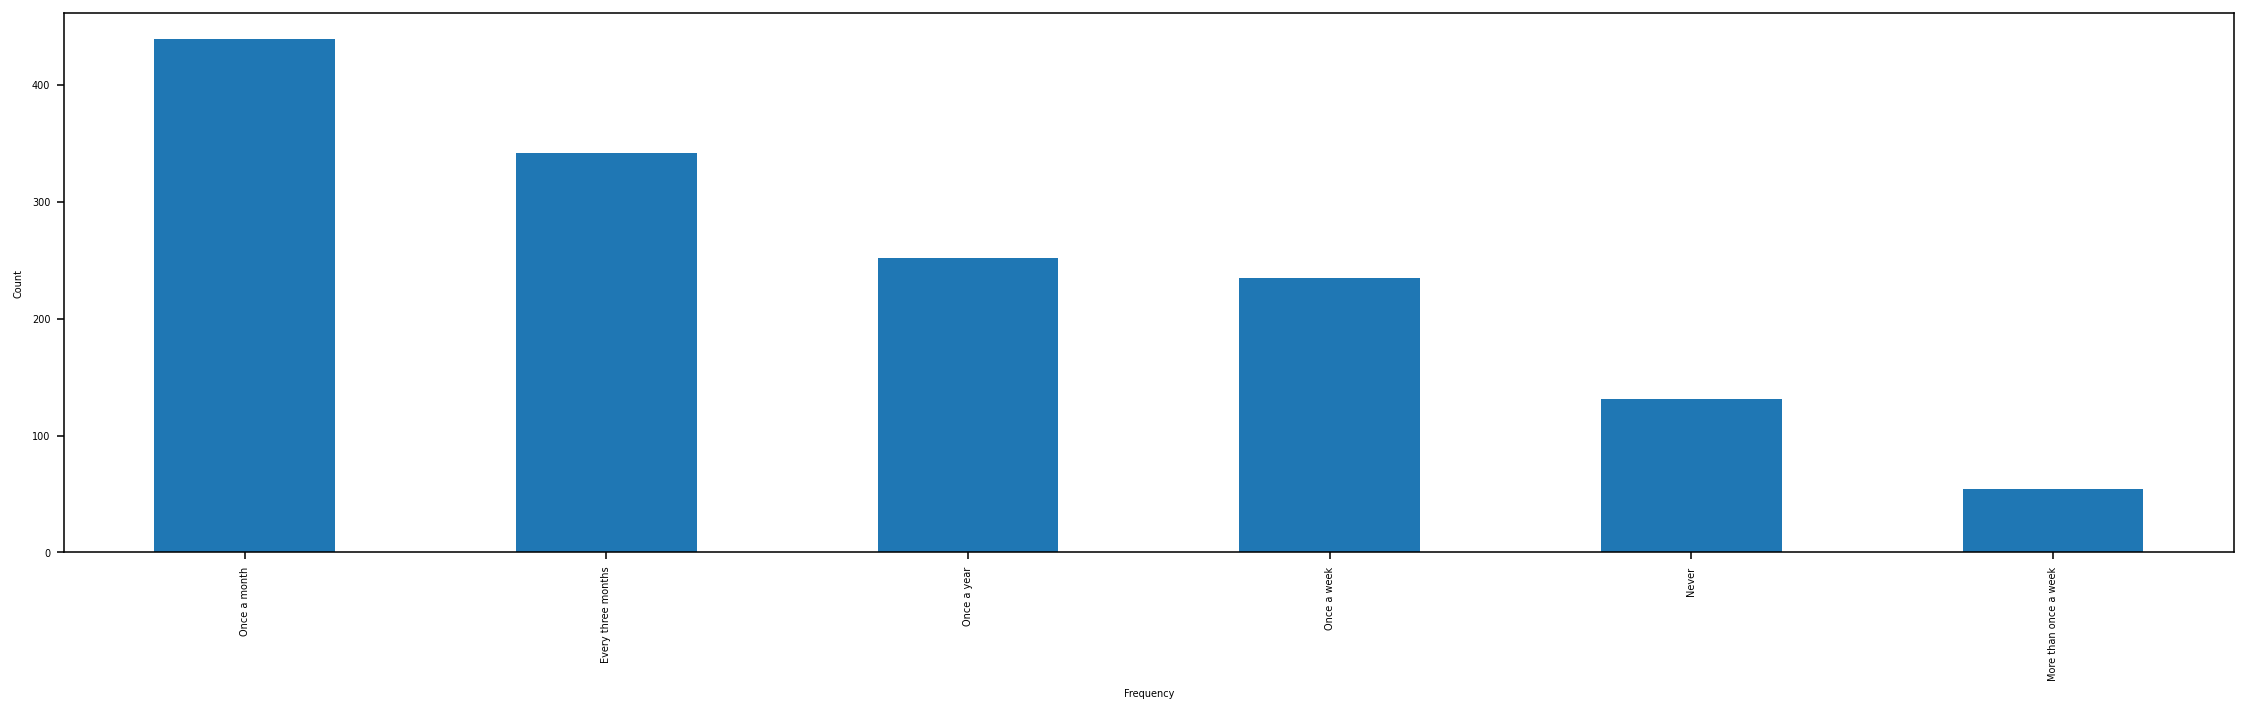

In [166]:
df.VisitFrequency.value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Frequency')

array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>],
       [<Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>],
       [<Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

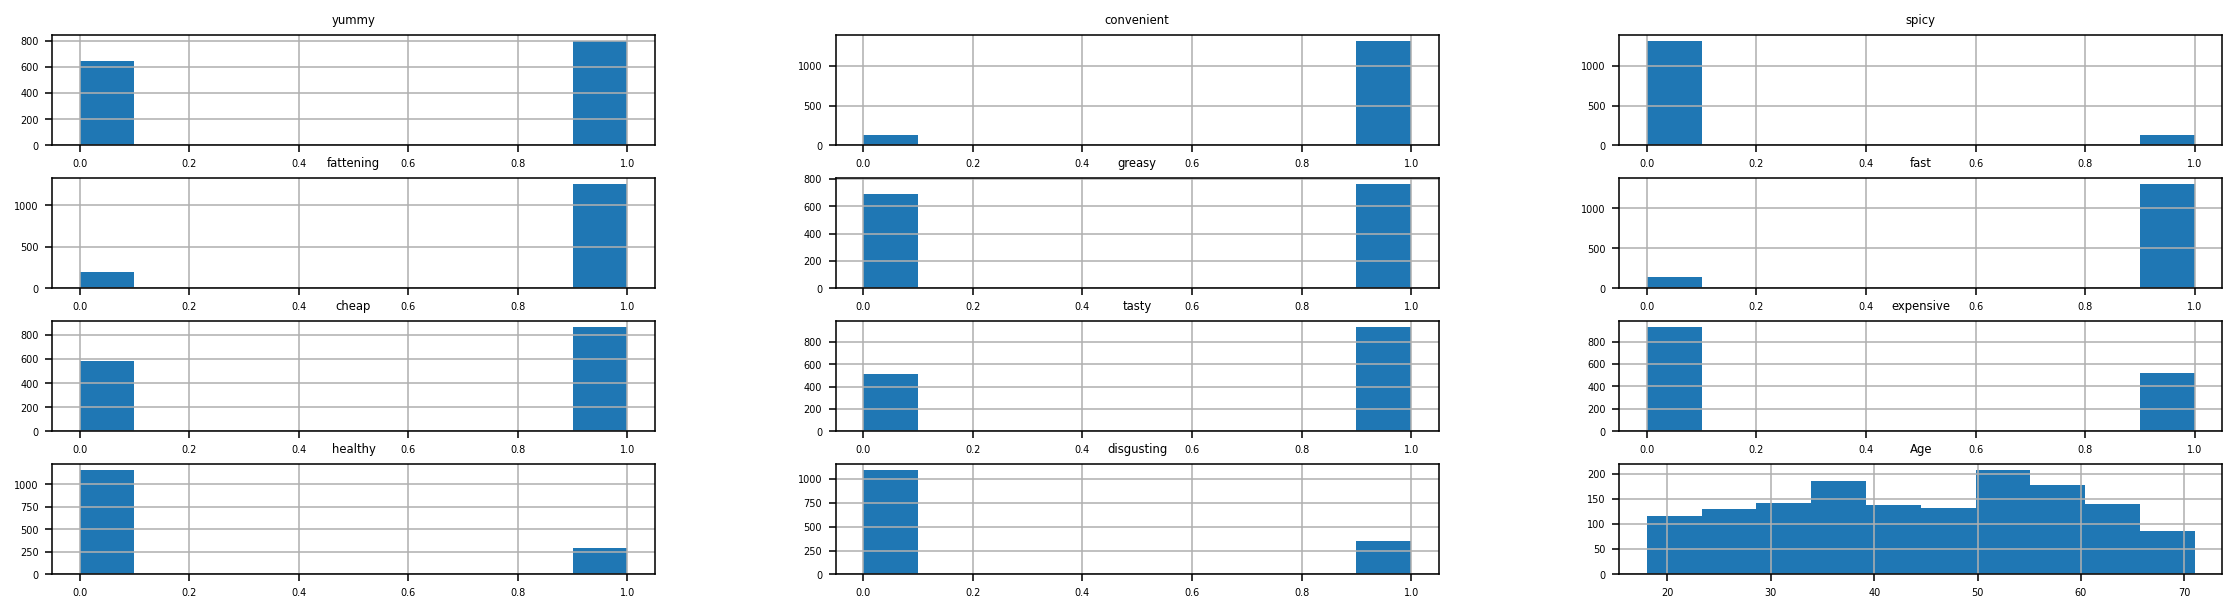

In [167]:
df.hist()

In [168]:
x = df.loc[:, cols]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [169]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
pf = pd.DataFrame(data=pc, columns=names)
pf

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [170]:
std_dev = np.std(pf,axis = 0)
print('Standard Deviation:',std_dev)

Standard Deviation: yummy         0.756789
convenient    0.607246
spicy         0.504446
fattening     0.398661
greasy        0.337289
fast          0.310168
cheap         0.289598
tasty         0.275027
expensive     0.265160
healthy       0.248756
disgusting    0.236821
dtype: float64


In [171]:
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [172]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [173]:
components = pca.components_
num_pc = pca.n_features_
pc_name = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame

loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


pandas.core.frame.DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

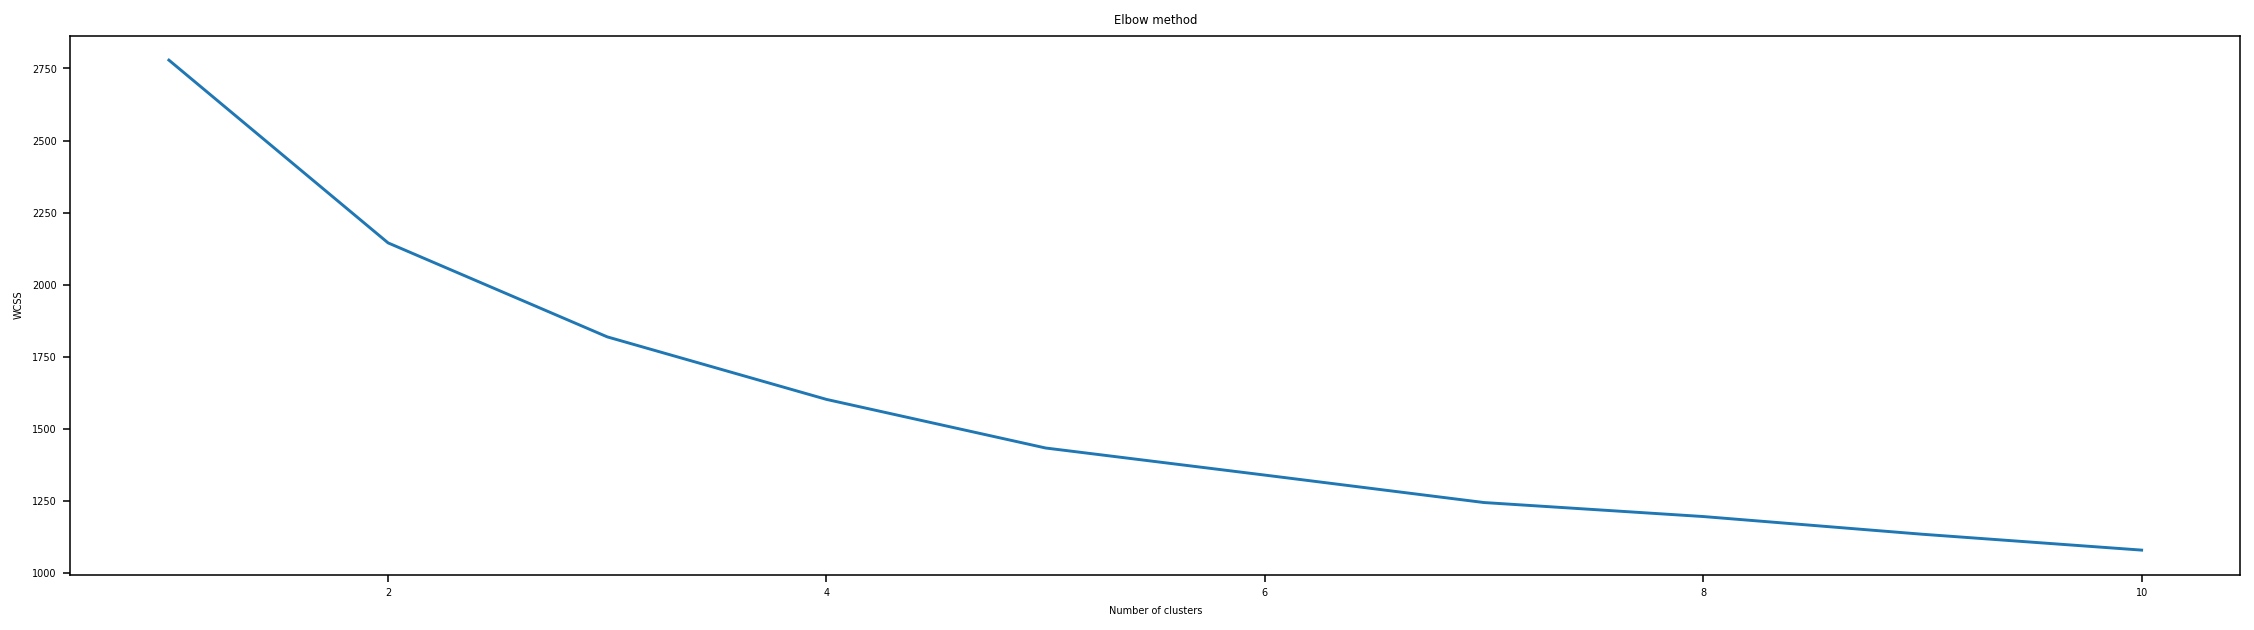

In [174]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [175]:

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(x)

df['cluster_num'] = kmeans.labels_
print("Cluster labels:", kmeans.labels_)
print("Within-cluster sum of squares (inertia):", kmeans.inertia_)
print("Number of iterations:", kmeans.n_iter_)
print("Cluster centers:", kmeans.cluster_centers_)

Cluster labels: [3 1 4 ... 4 2 0]
Within-cluster sum of squares (inertia): 1434.6060971914808
Number of iterations: 5
Cluster centers: [[ 2.15517241e-02  6.85344828e-01  8.62068966e-02  9.35344828e-01
   7.32758621e-01  7.54310345e-01  6.89655172e-02  8.62068966e-02
   9.22413793e-01  6.03448276e-02  7.37068966e-01]
 [ 7.92880259e-01  9.80582524e-01  1.22977346e-01  9.70873786e-01
   1.00000000e+00  9.48220065e-01  8.93203883e-01  9.54692557e-01
   1.06796117e-01  1.81229773e-01  1.71521036e-01]
 [ 8.46547315e-01  9.76982097e-01  9.20716113e-02  7.10997442e-01
   0.00000000e+00  9.64194373e-01  8.84910486e-01  9.66751918e-01
   3.06905371e-02  3.75959079e-01  1.53452685e-02]
 [ 3.78787879e-03  8.71212121e-01  6.43939394e-02  9.01515152e-01
   5.75757576e-01  9.35606061e-01  8.78787879e-01  3.78787879e-03
   1.51515152e-02  8.33333333e-02  4.01515152e-01]
 [ 8.59922179e-01  9.53307393e-01  9.72762646e-02  8.83268482e-01
   5.21400778e-01  8.40466926e-01 -8.88178420e-16  9.41634241e-01
 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [176]:
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 264, 1: 309, 4: 257, 2: 391, 0: 232})

In [177]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


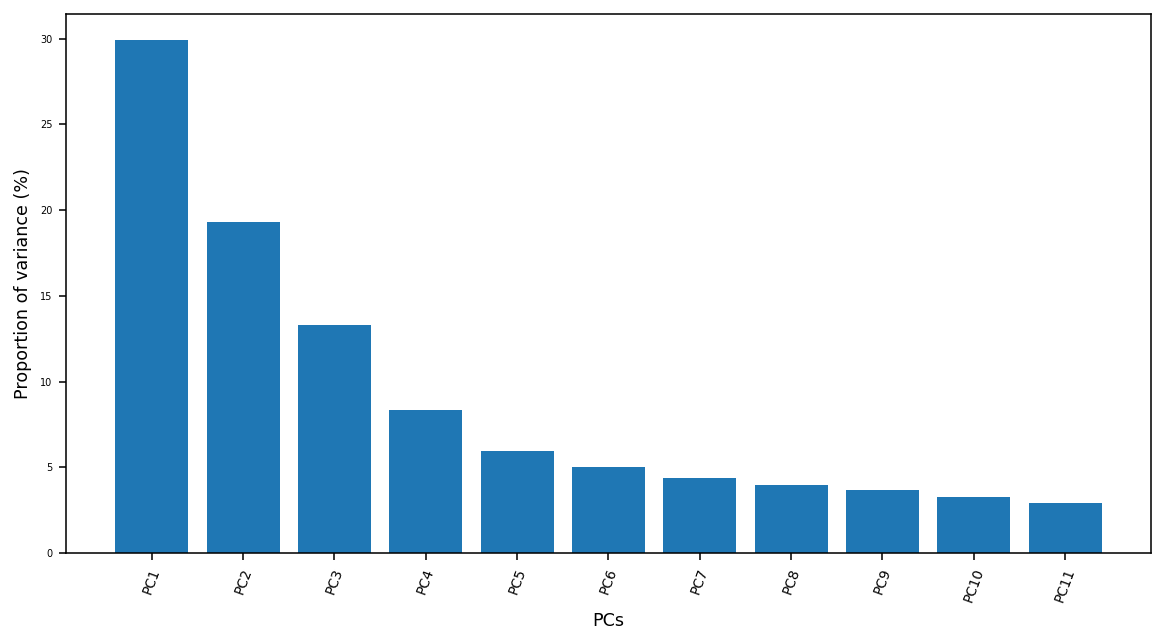

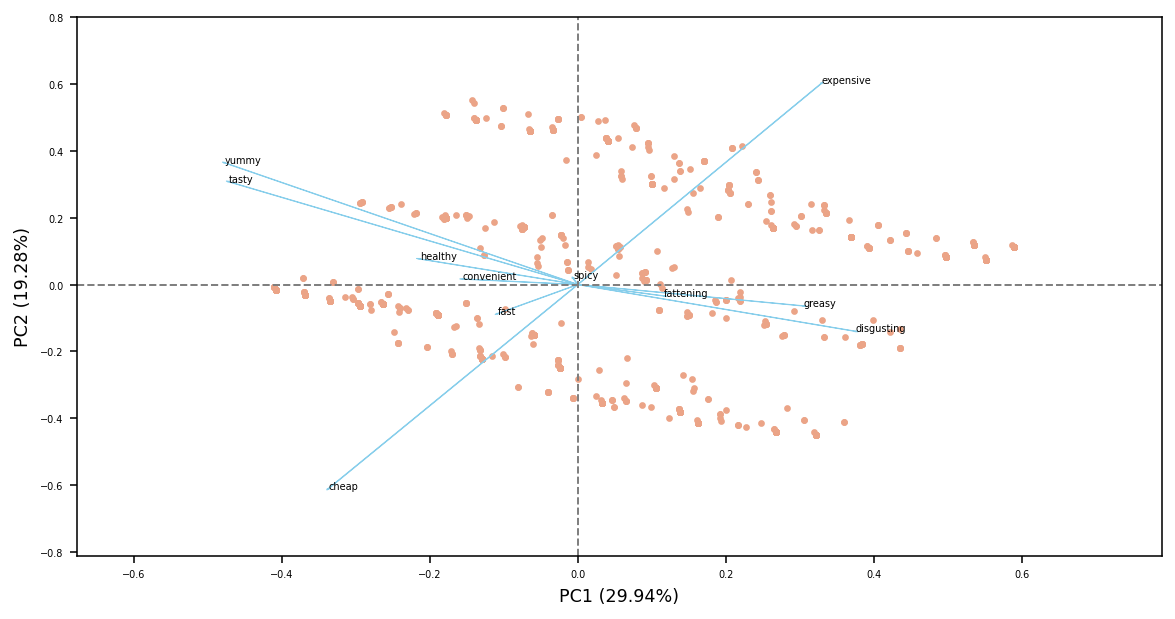

In [178]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))# get PC scores
pca_scores = PCA().fit_transform(x)


cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

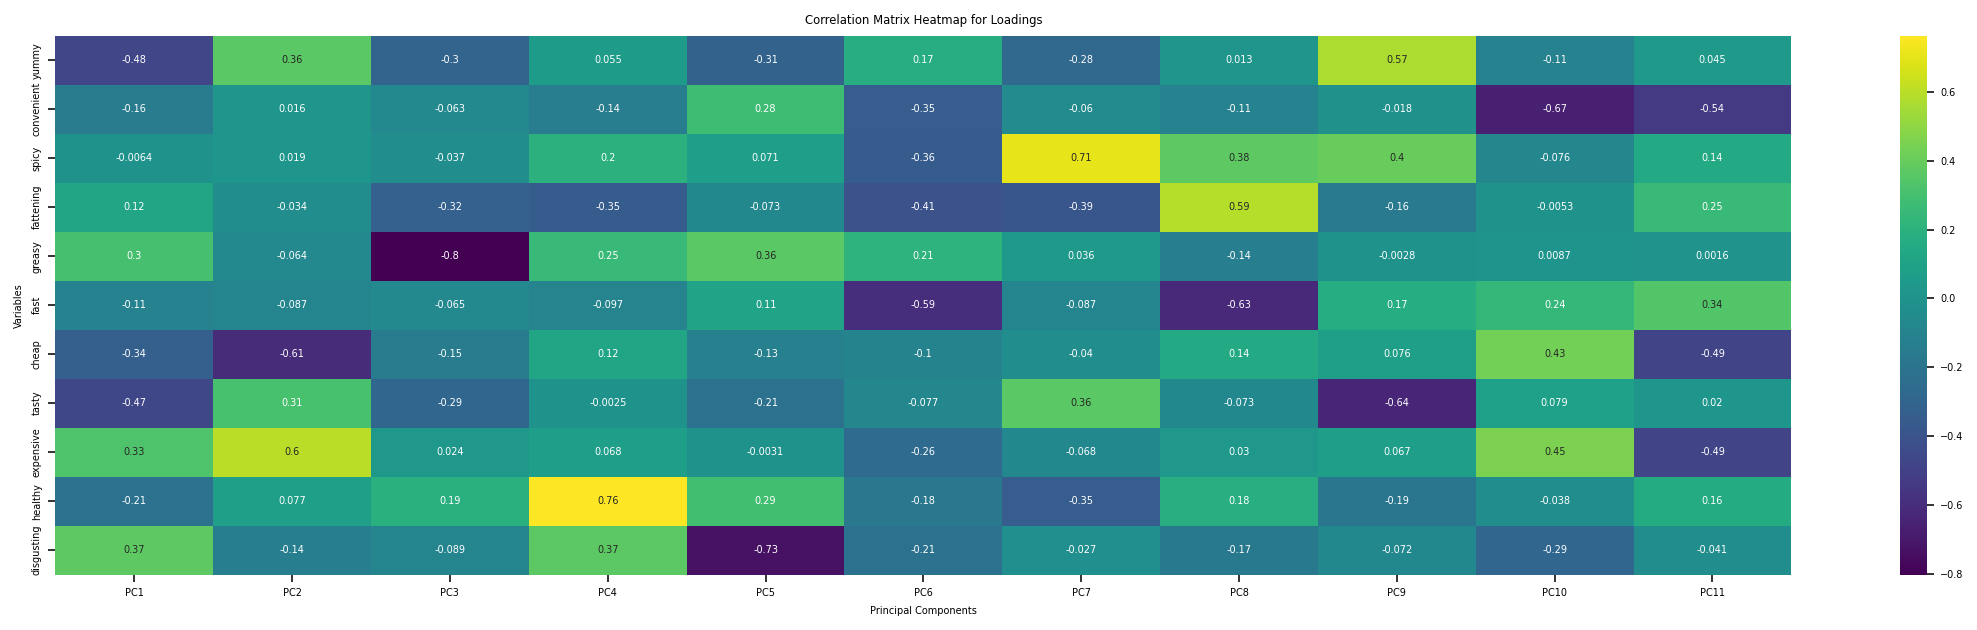

In [179]:
plt.rcParams['figure.figsize'] = (20,5)
sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap for Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Variables')
plt.show()

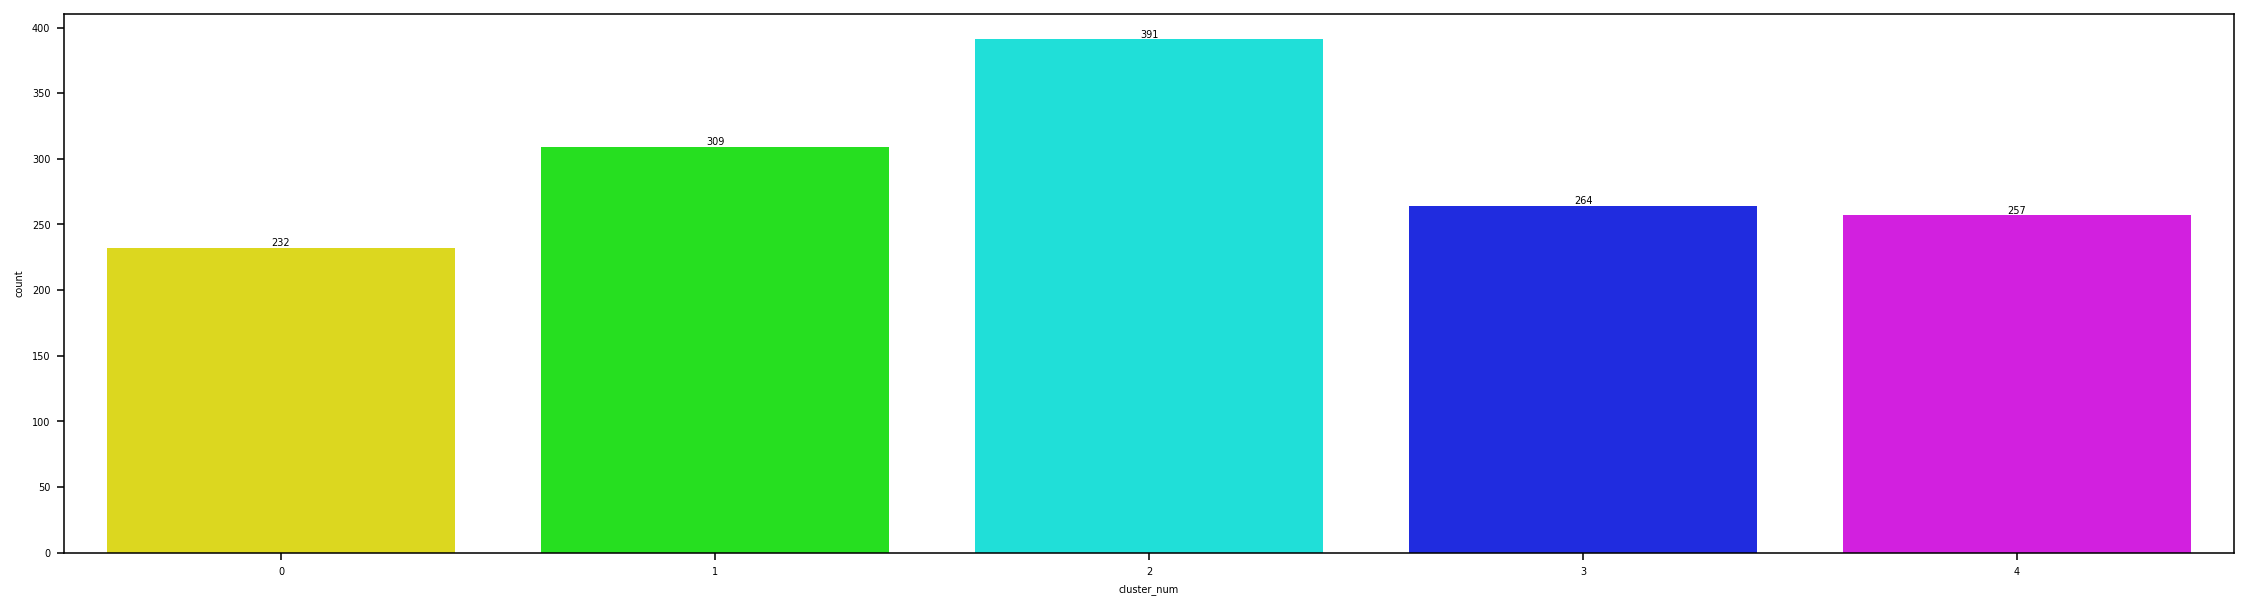

In [180]:
f = sns.countplot(x=df["cluster_num"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)


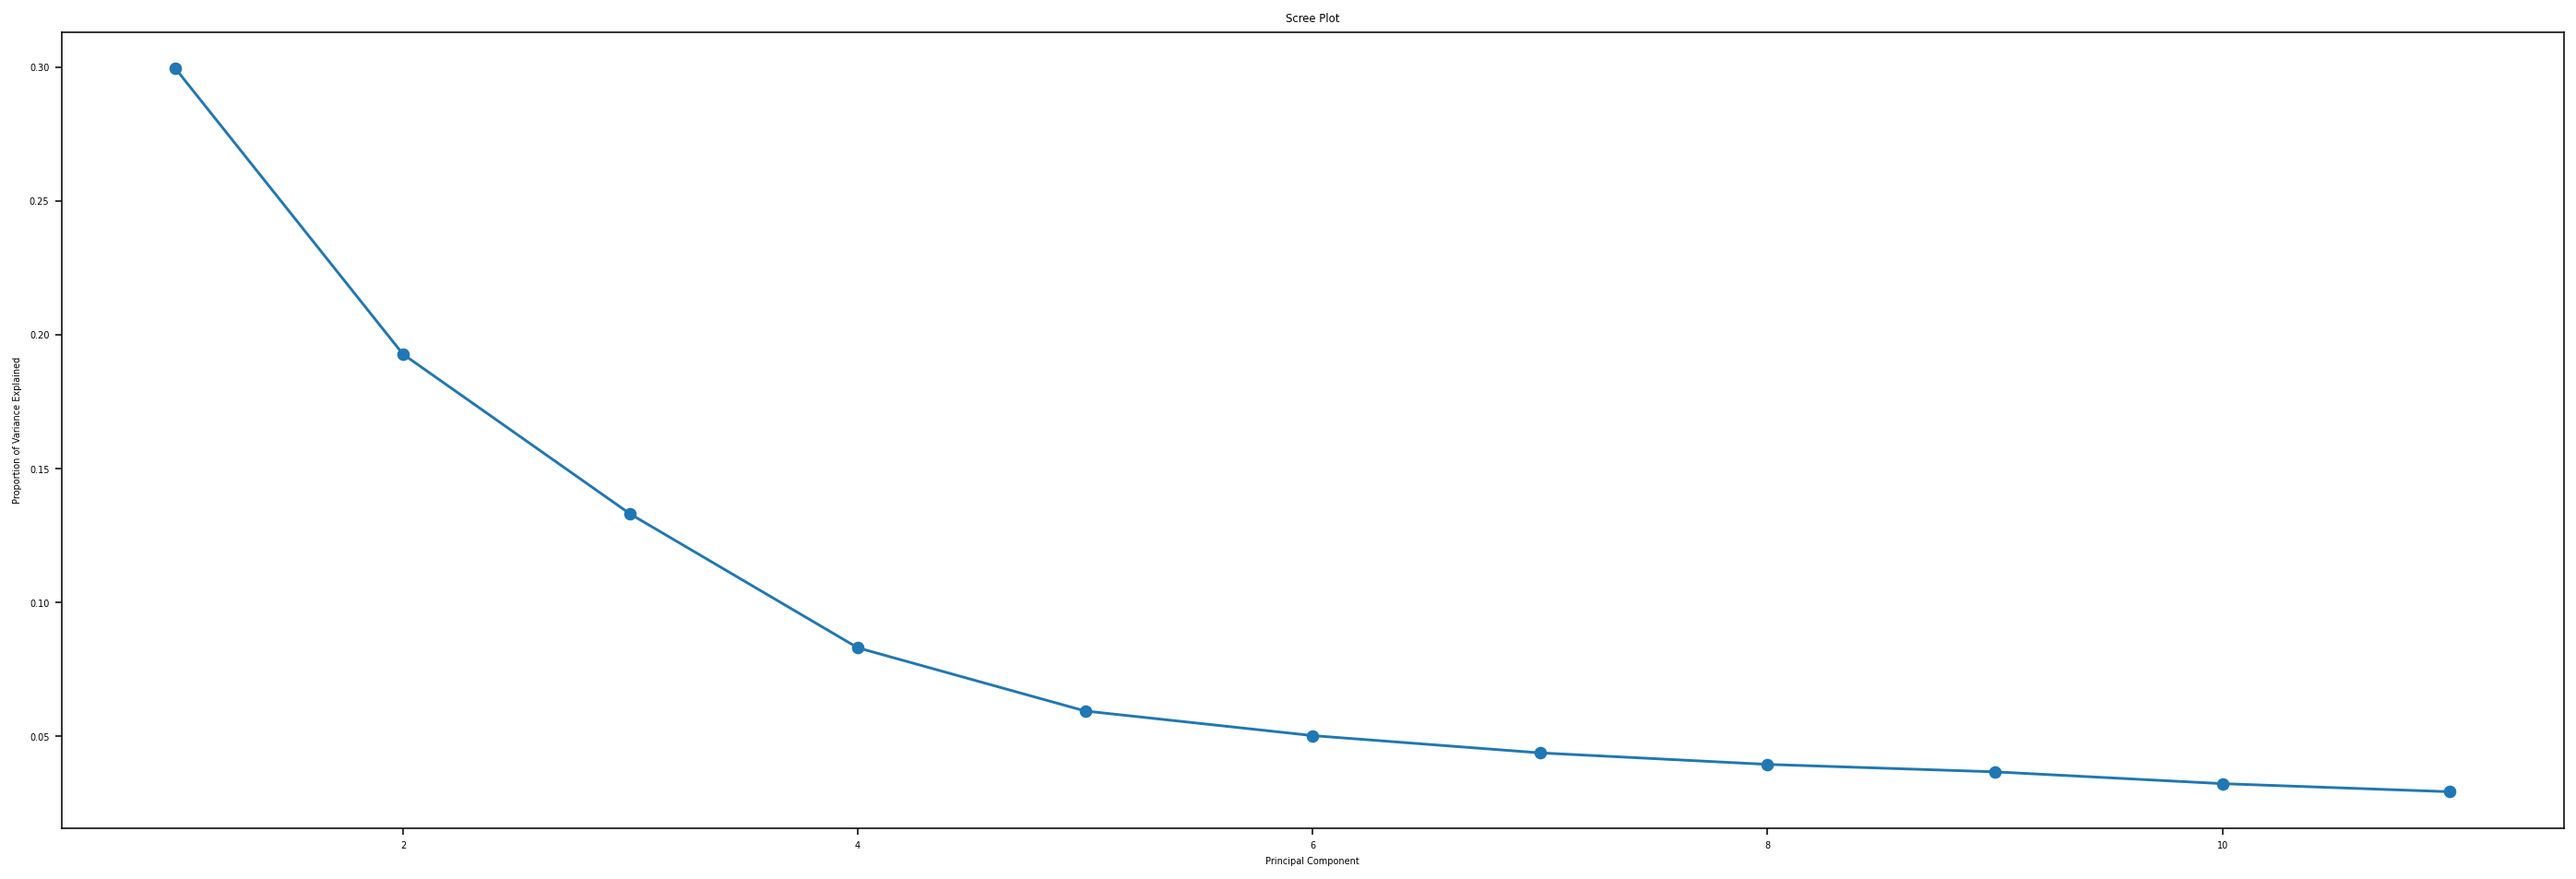

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,4
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,0
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,4
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,2


In [181]:

plt.plot(range(1, num_pc + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

pca_scores = pca.transform(x)
df

In [182]:
df1=pd.get_dummies(df, prefix=['cluster_num'], columns=['cluster_num'])
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3,cluster_num_4
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0,0,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,1,0,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,1,0,0,0,0
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,0,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0,0,0,0,1
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,0,0,1,0,0


In [183]:
result=[]
for i in cols:
    Gender = df.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

In [184]:
for i in range(len(result)):
    print(pd.DataFrame(result[i]))

   cluster_num     yummy
0            0  0.021552
1            1  0.792880
2            2  0.846547
3            3  0.003788
4            4  0.859922
   cluster_num  convenient
0            0    0.685345
1            1    0.980583
2            2    0.976982
3            3    0.871212
4            4    0.953307
   cluster_num     spicy
0            0  0.086207
1            1  0.122977
2            2  0.092072
3            3  0.064394
4            4  0.097276
   cluster_num  fattening
0            0   0.935345
1            1   0.970874
2            2   0.710997
3            3   0.901515
4            4   0.883268
   cluster_num    greasy
0            0  0.732759
1            1  1.000000
2            2  0.000000
3            3  0.575758
4            4  0.521401
   cluster_num      fast
0            0  0.754310
1            1  0.948220
2            2  0.964194
3            3  0.935606
4            4  0.840467
   cluster_num     cheap
0            0  0.068966
1            1  0.893204
2      

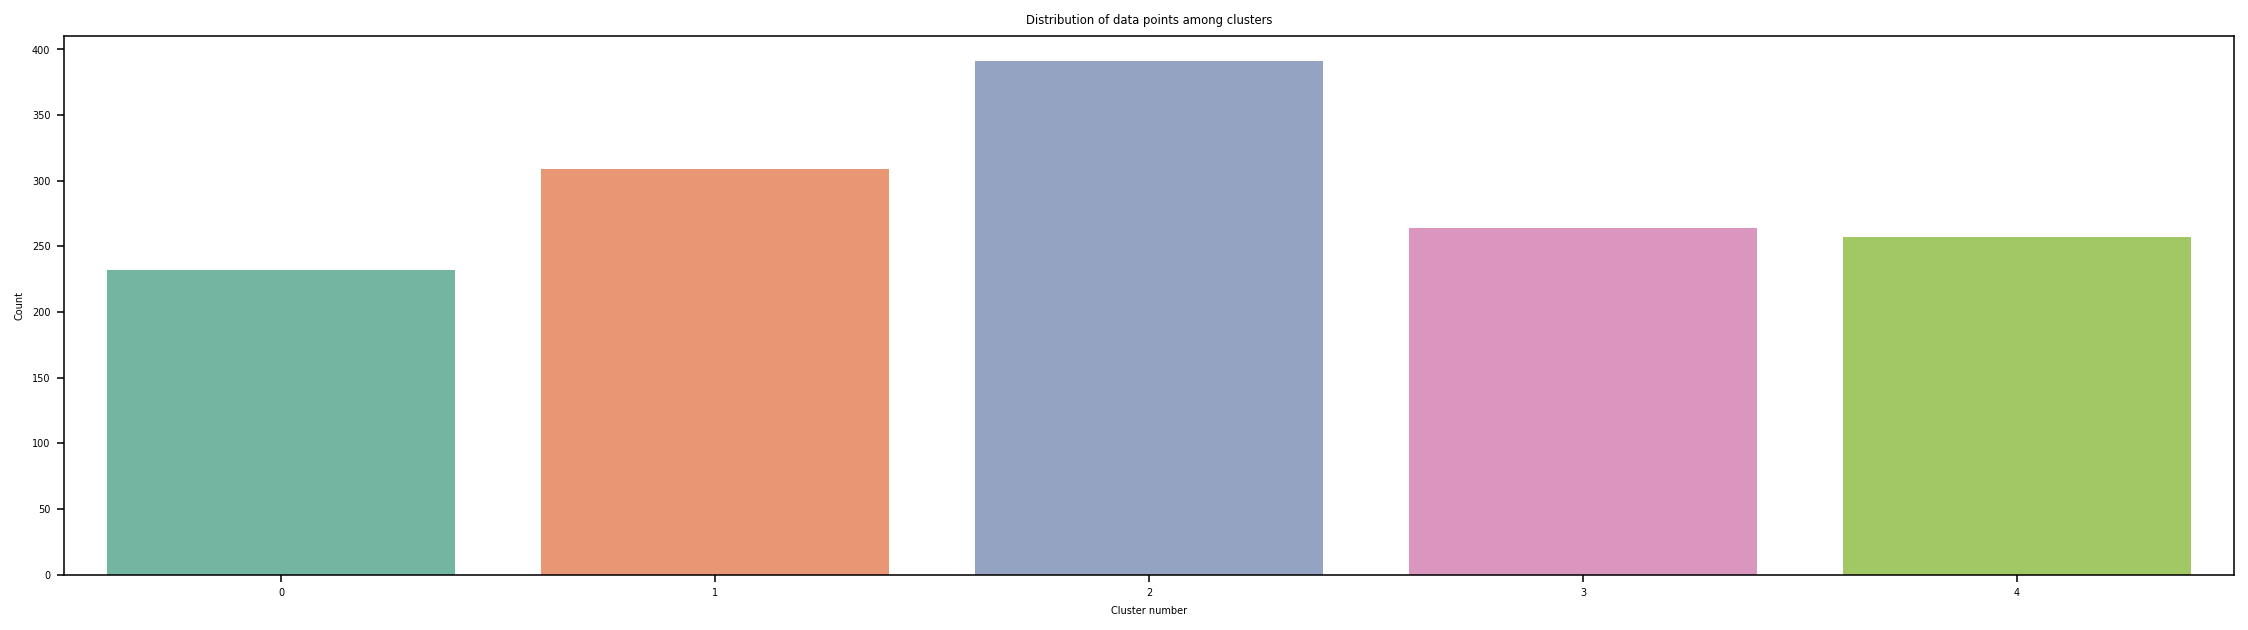

In [185]:
plt.figure(figsize=(20,5))
sns.countplot(x = df["cluster_num"], palette = 'Set2')
plt.xlabel("Cluster number")
plt.ylabel("Count")
plt.title("Distribution of data points among clusters")
plt.show()

In [186]:
df1=pd.get_dummies(df, prefix=['VisitFrequency'], columns=['VisitFrequency'])
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,cluster_num,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,...,-3,61,Female,3,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,...,+2,51,Female,1,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,...,+1,62,Female,4,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,...,+4,69,Female,1,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,...,+2,49,Male,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,-5,47,Male,0,0,0,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,...,+2,36,Female,2,0,0,0,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,...,+3,52,Female,4,0,0,0,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,...,+4,41,Male,2,1,0,0,0,0,0


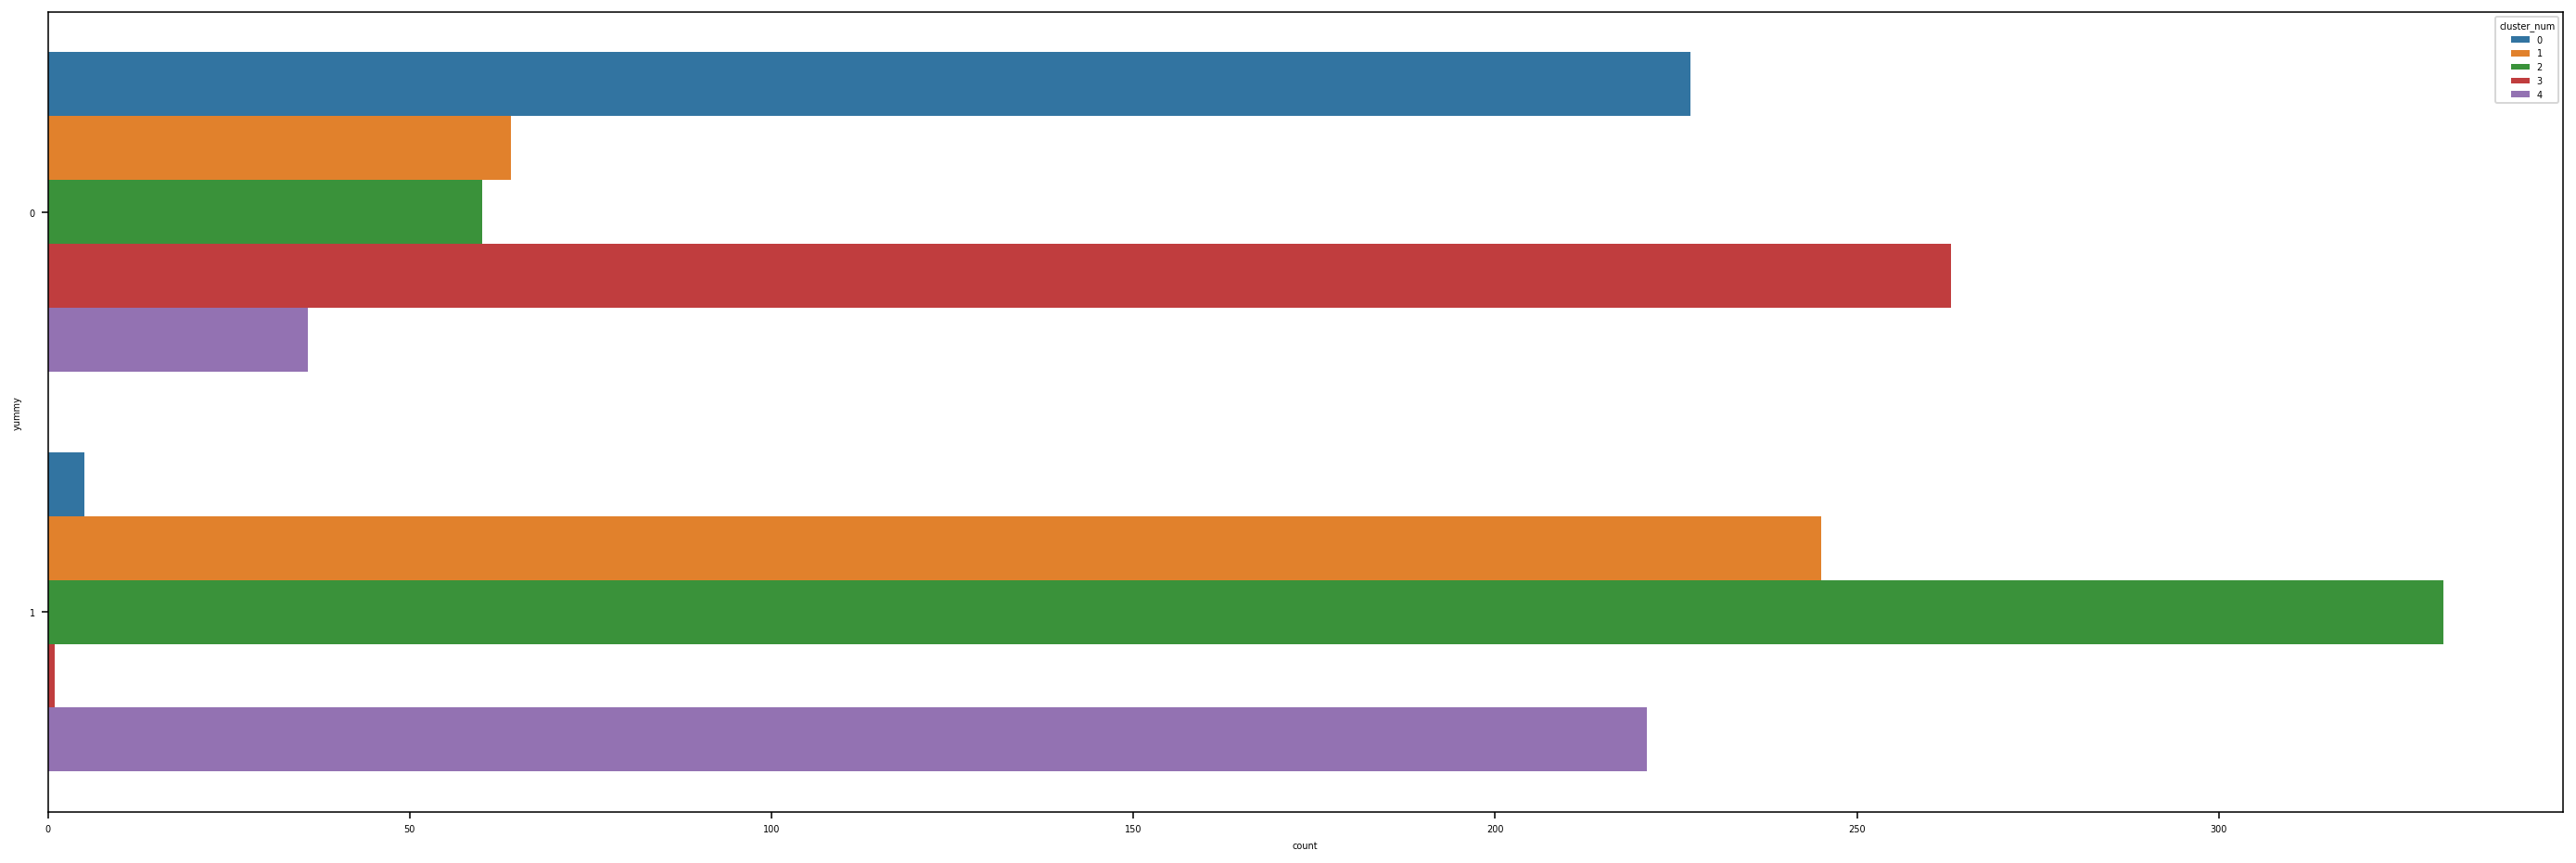

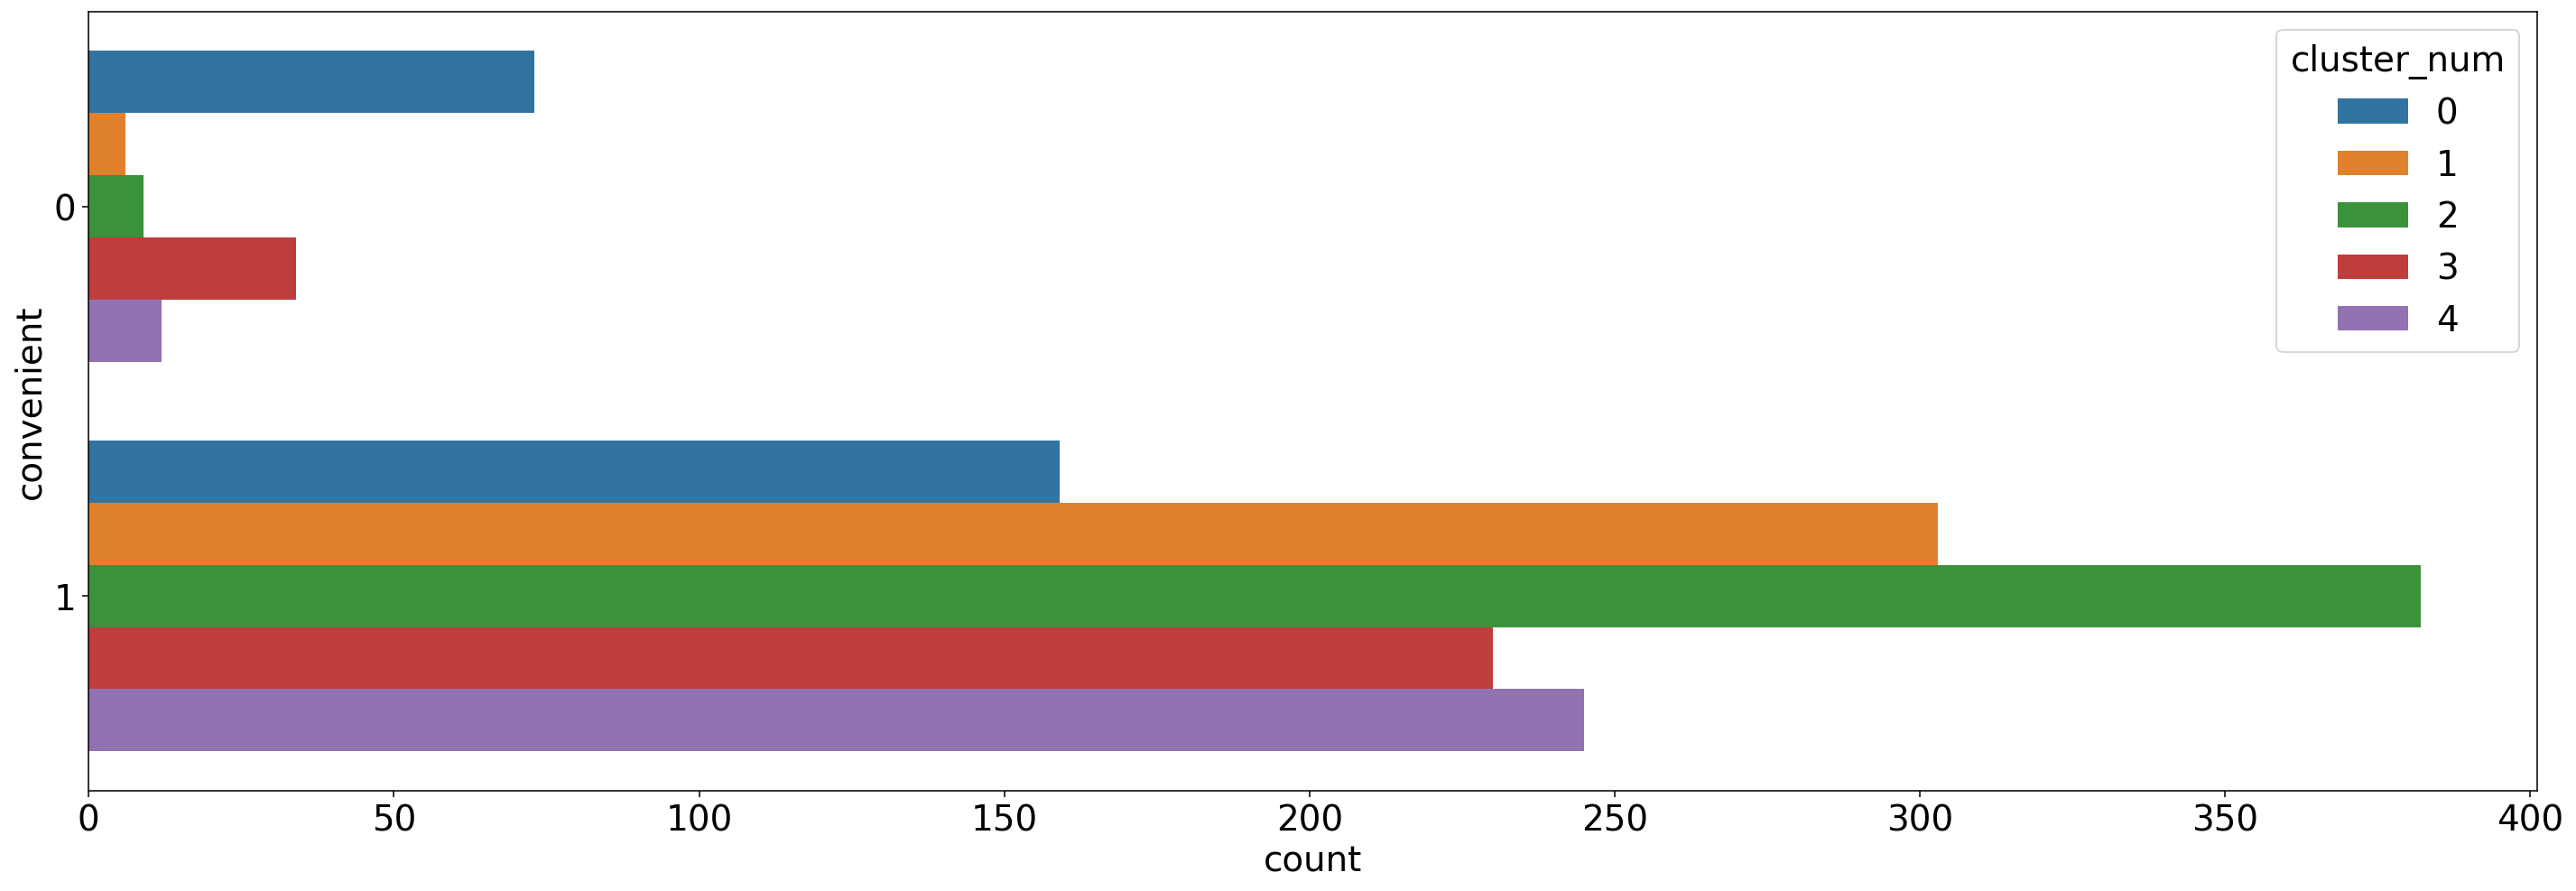

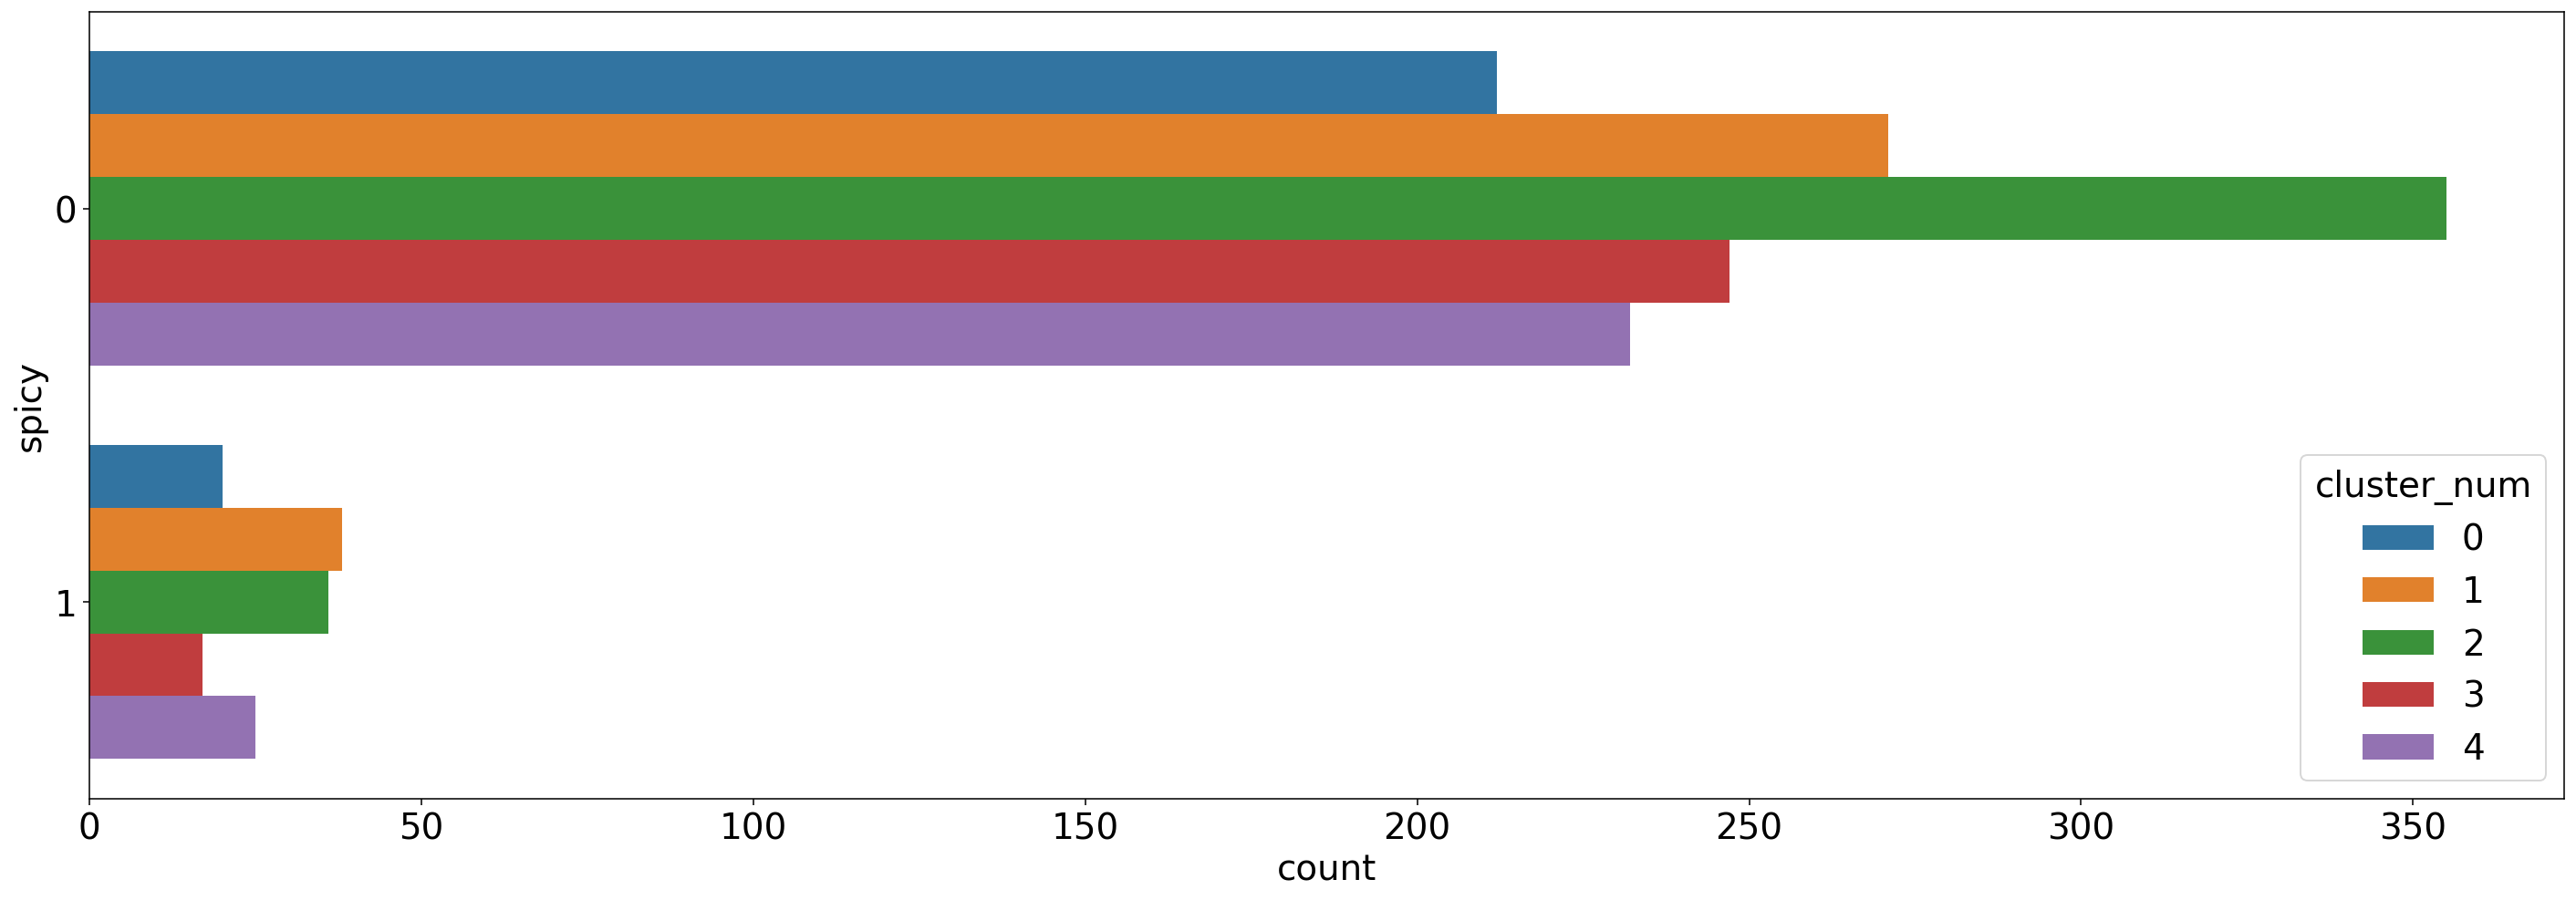

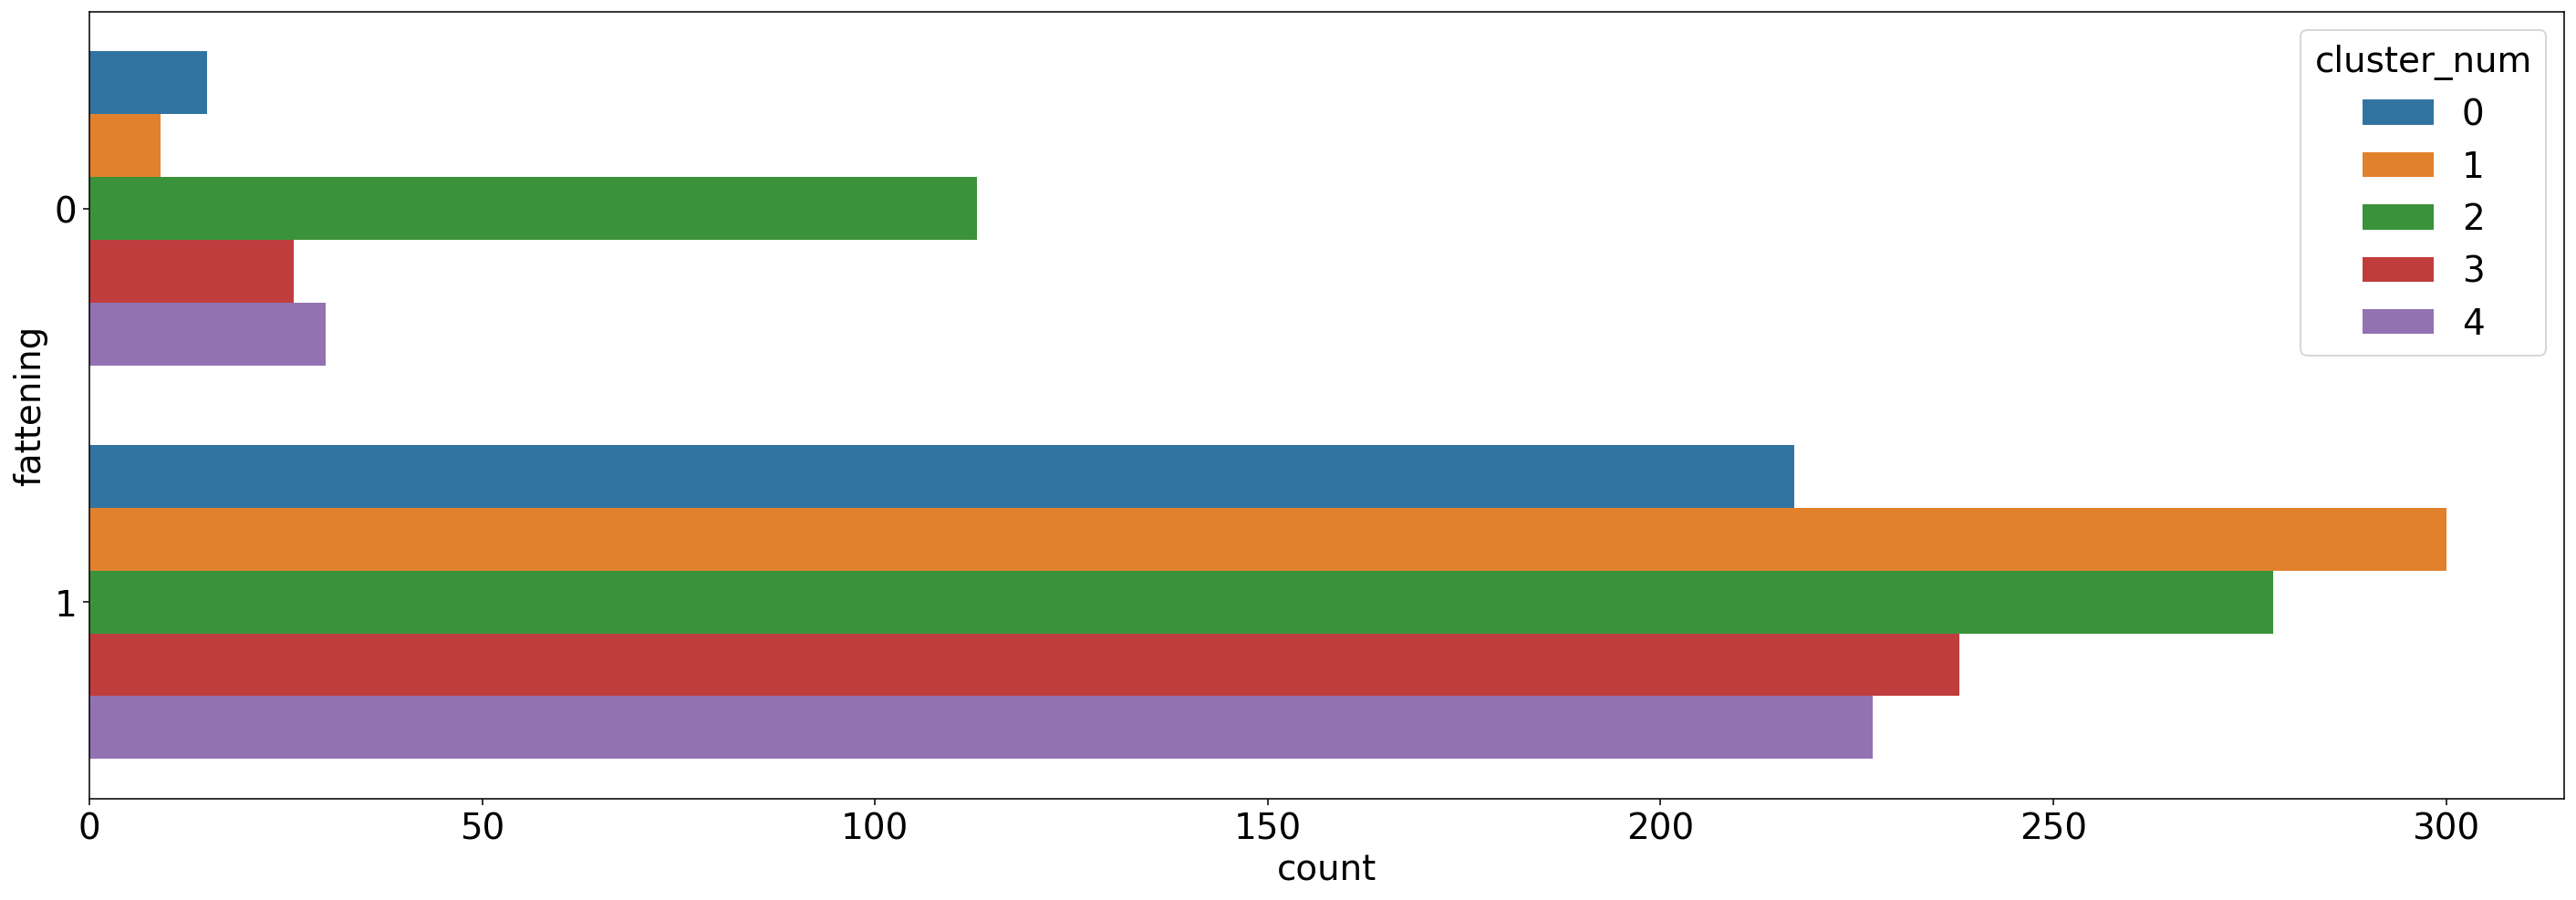

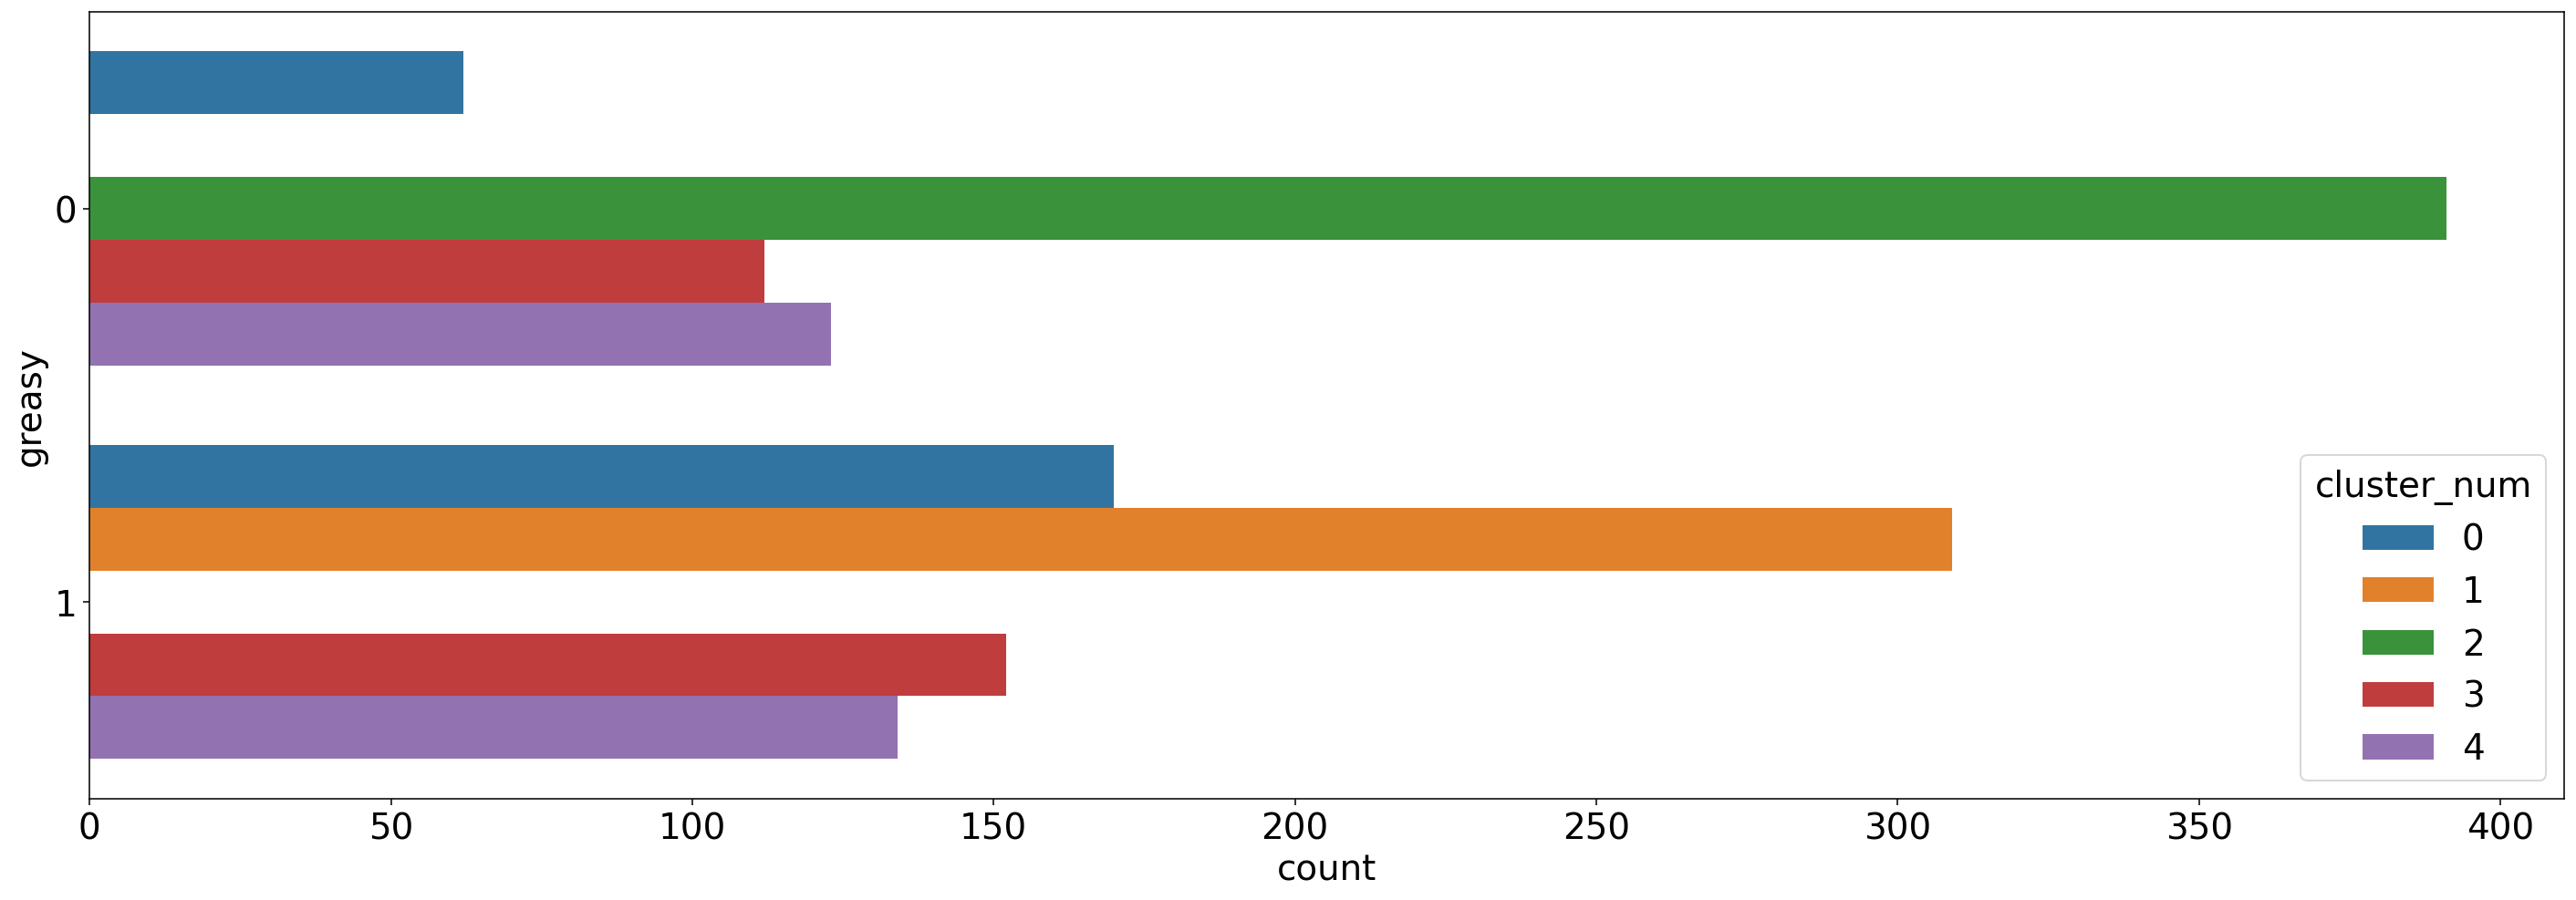

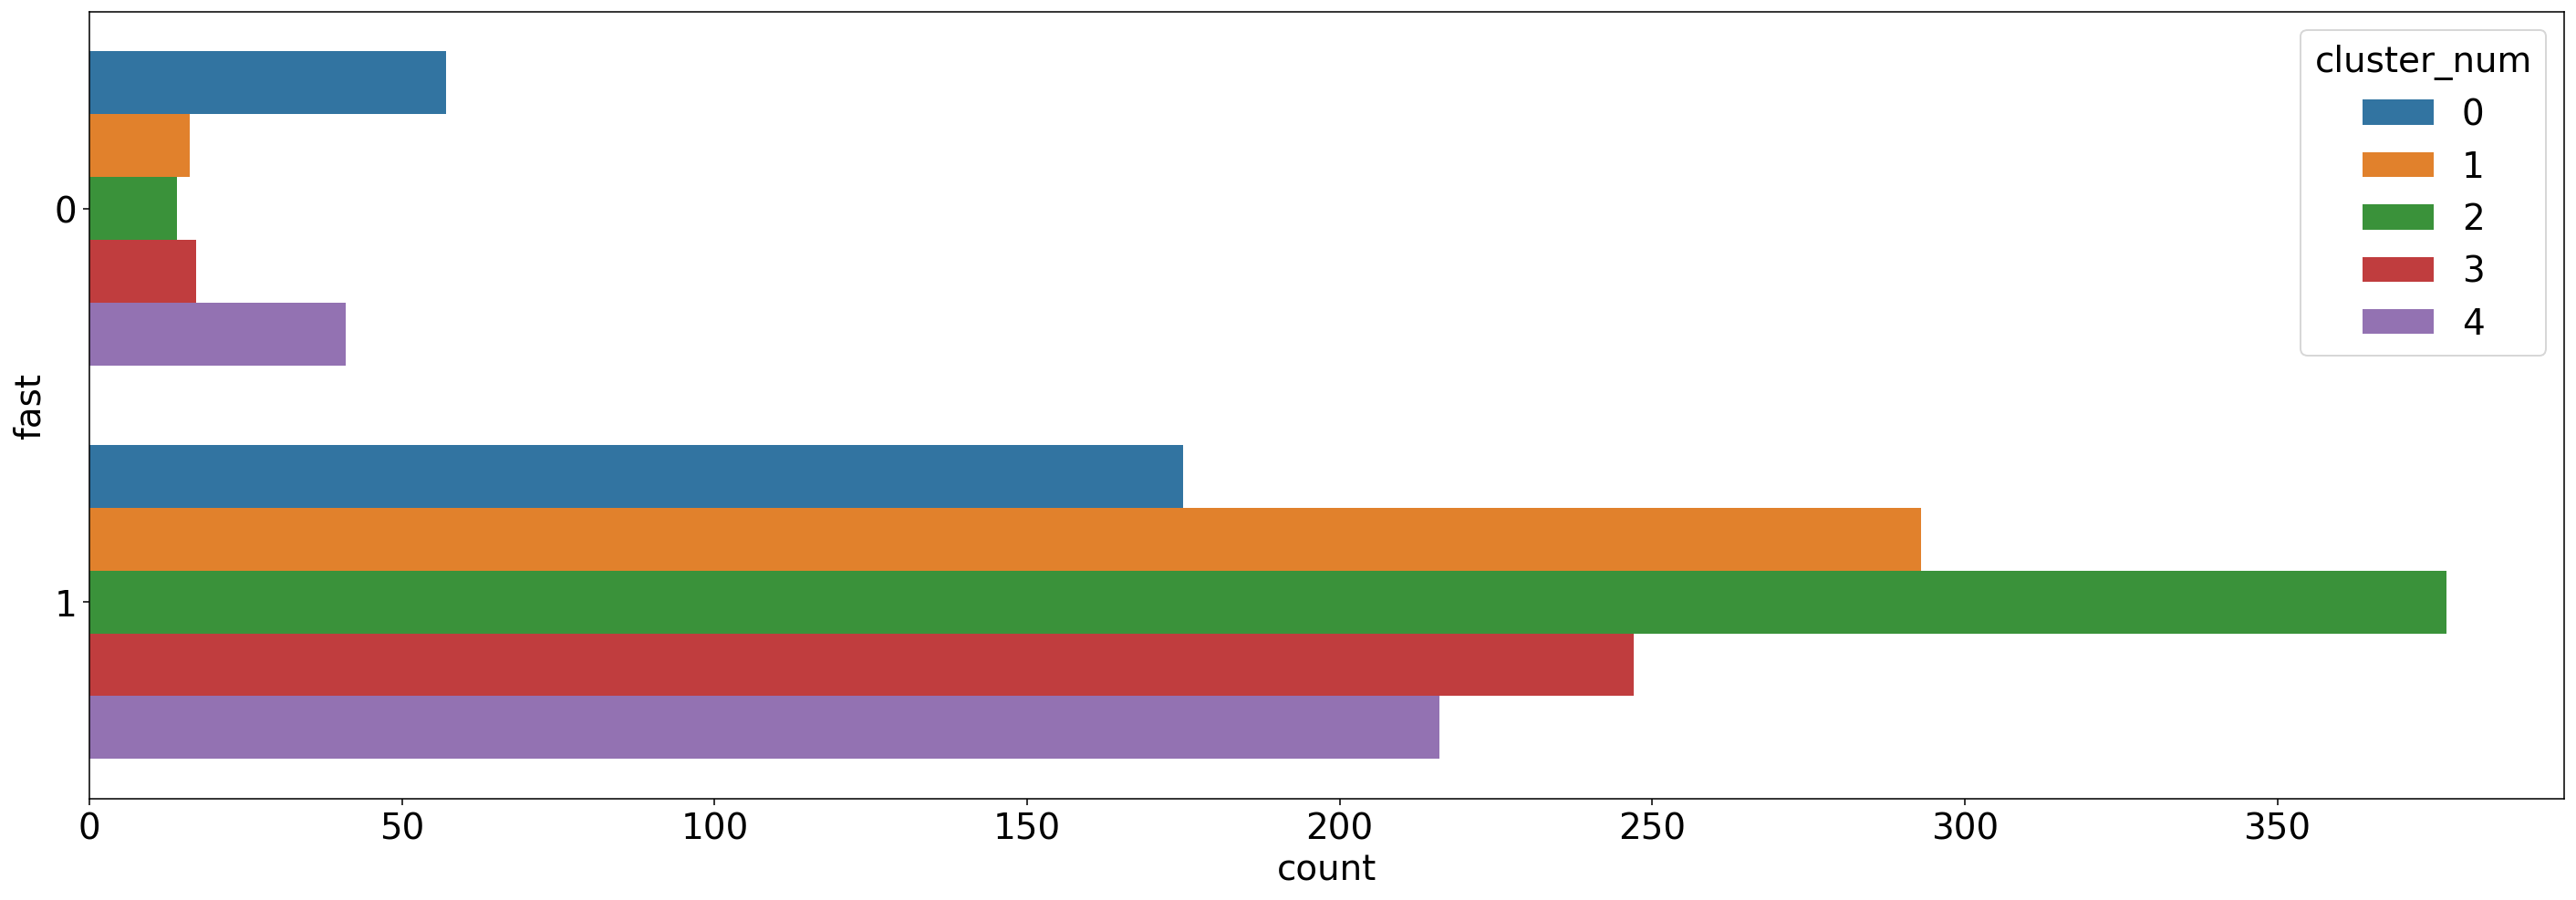

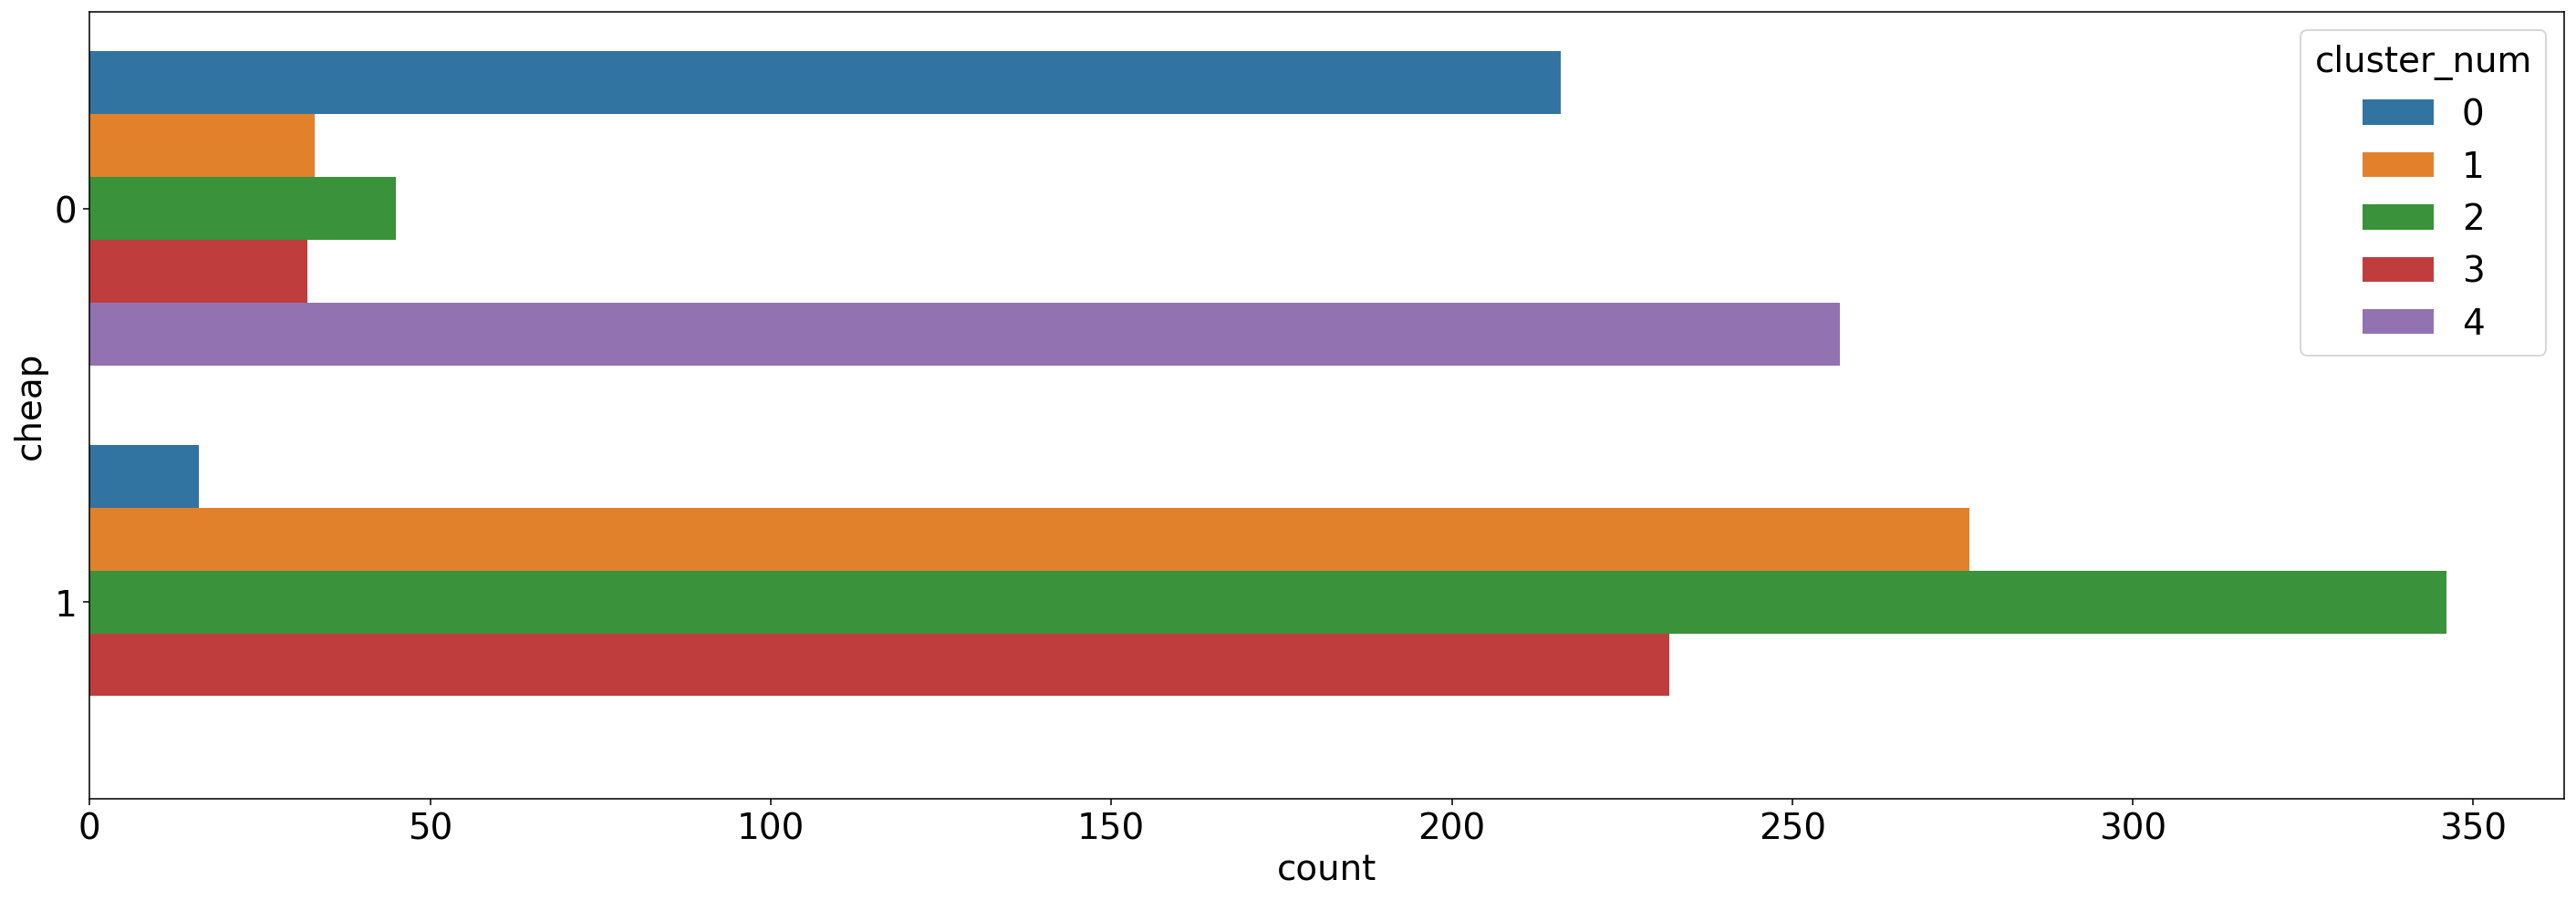

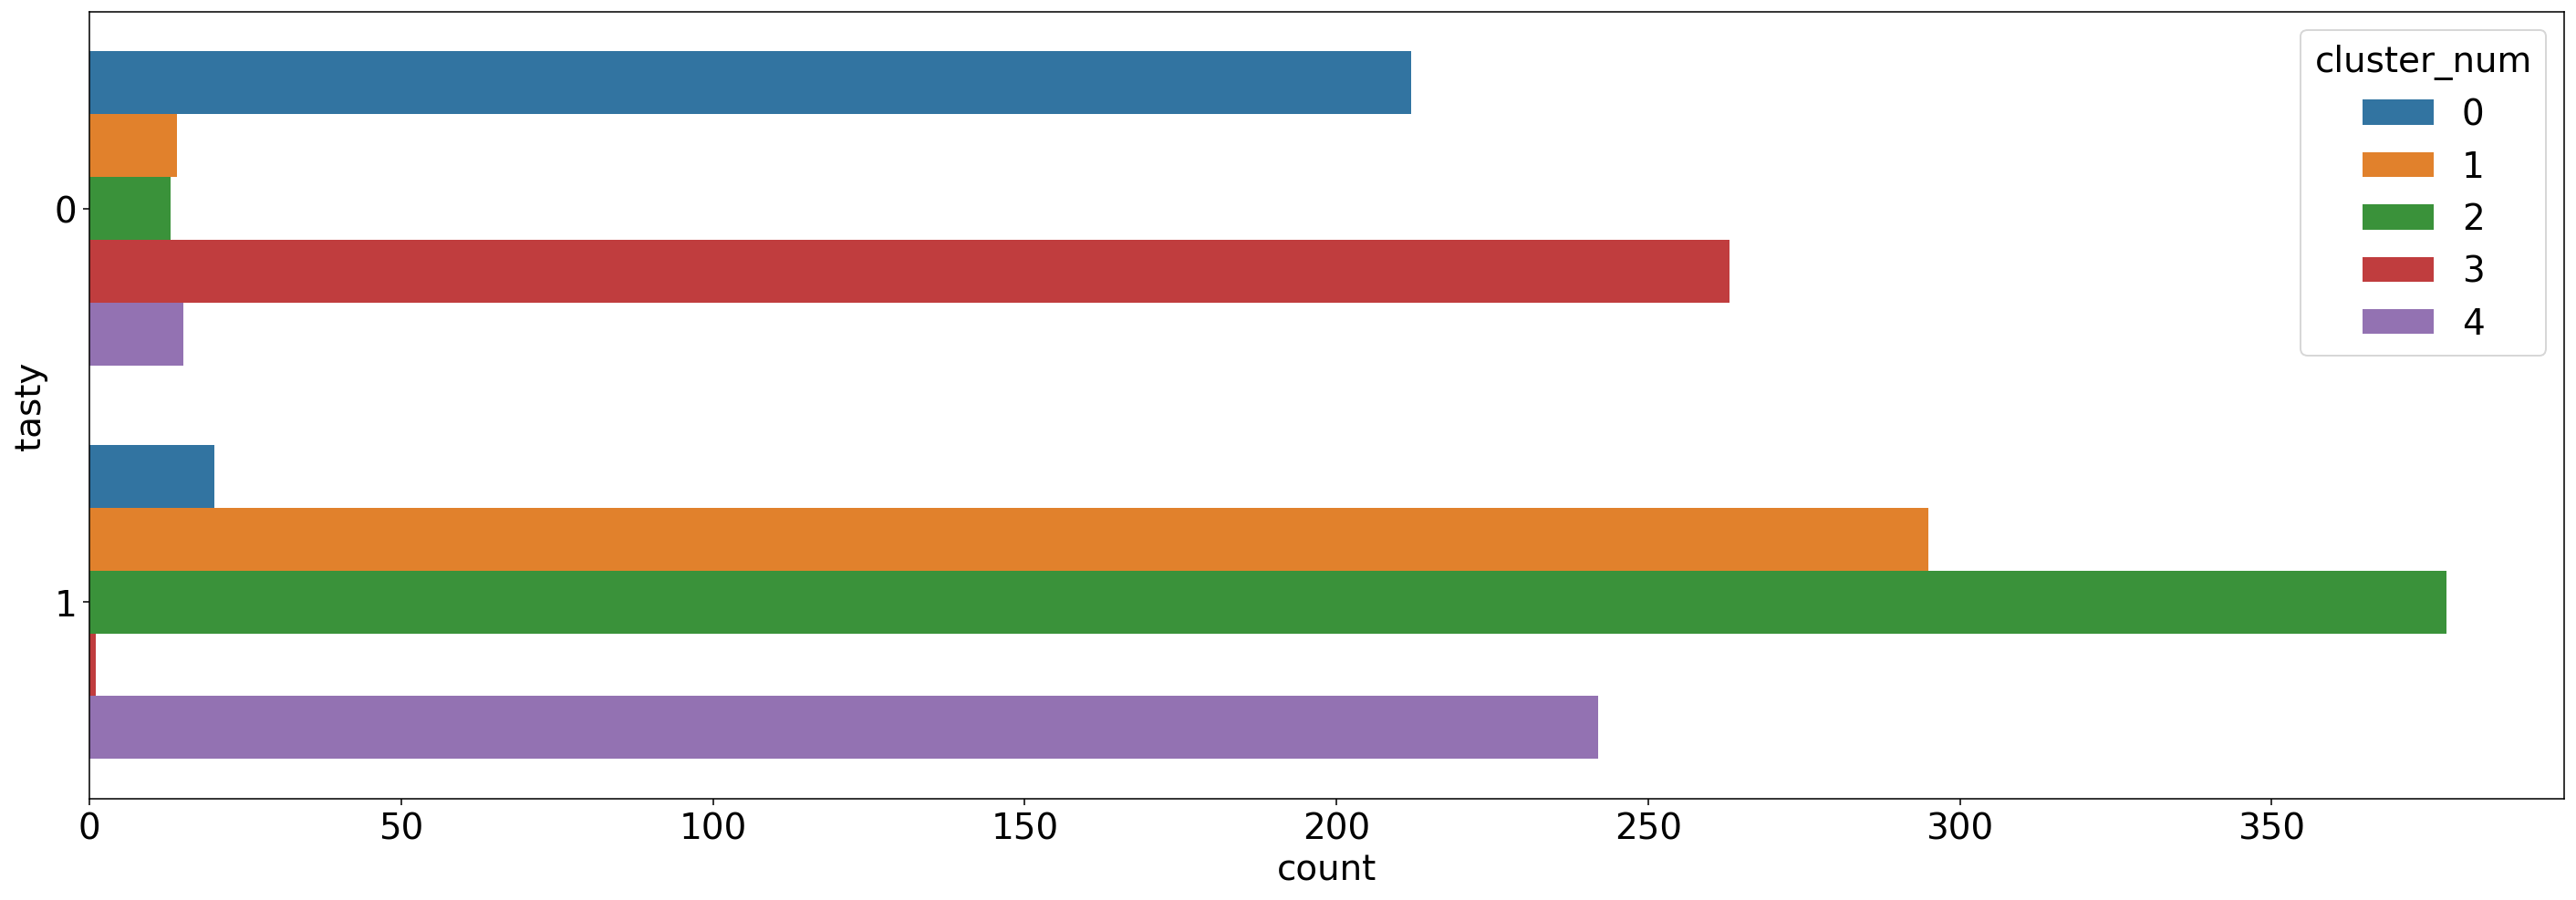

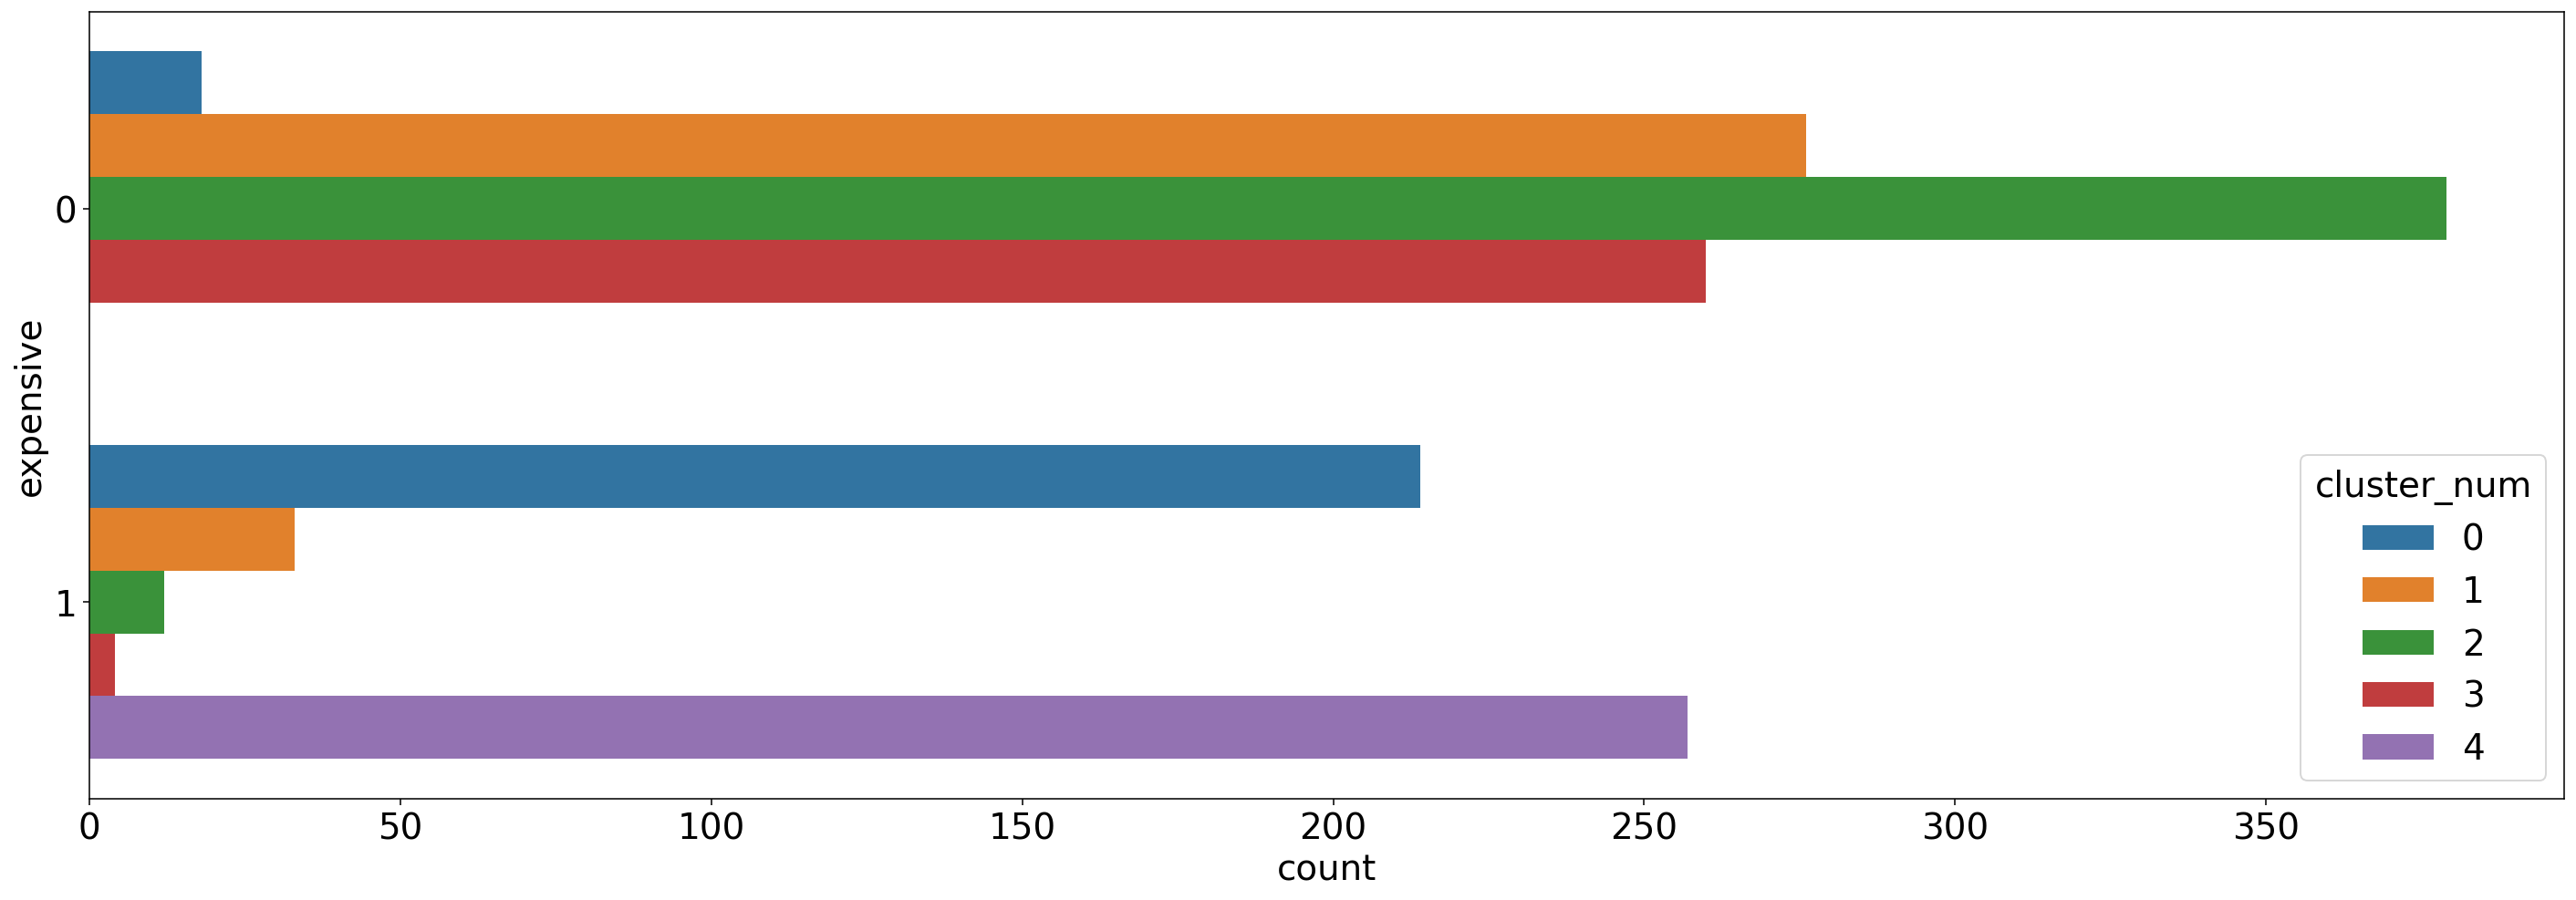

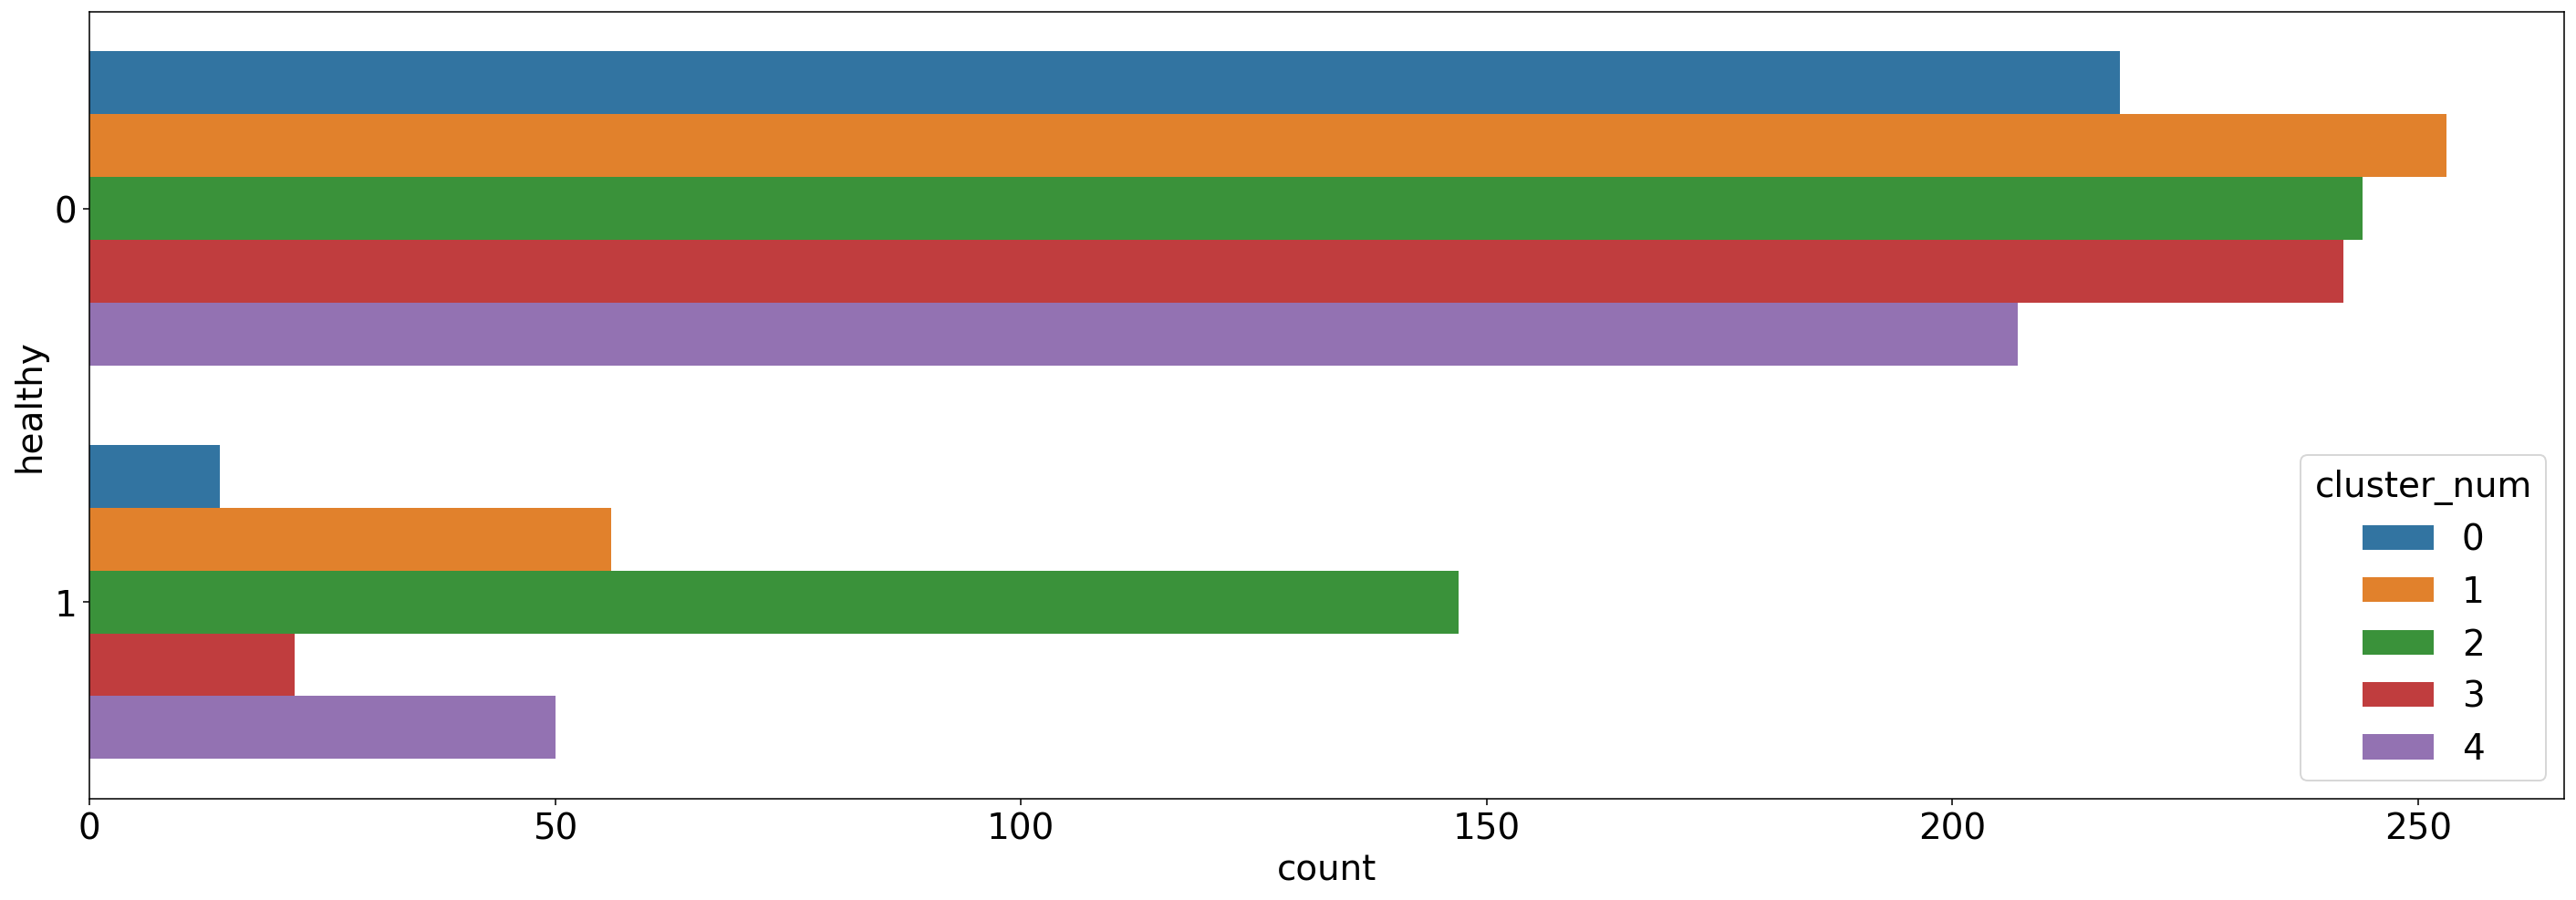

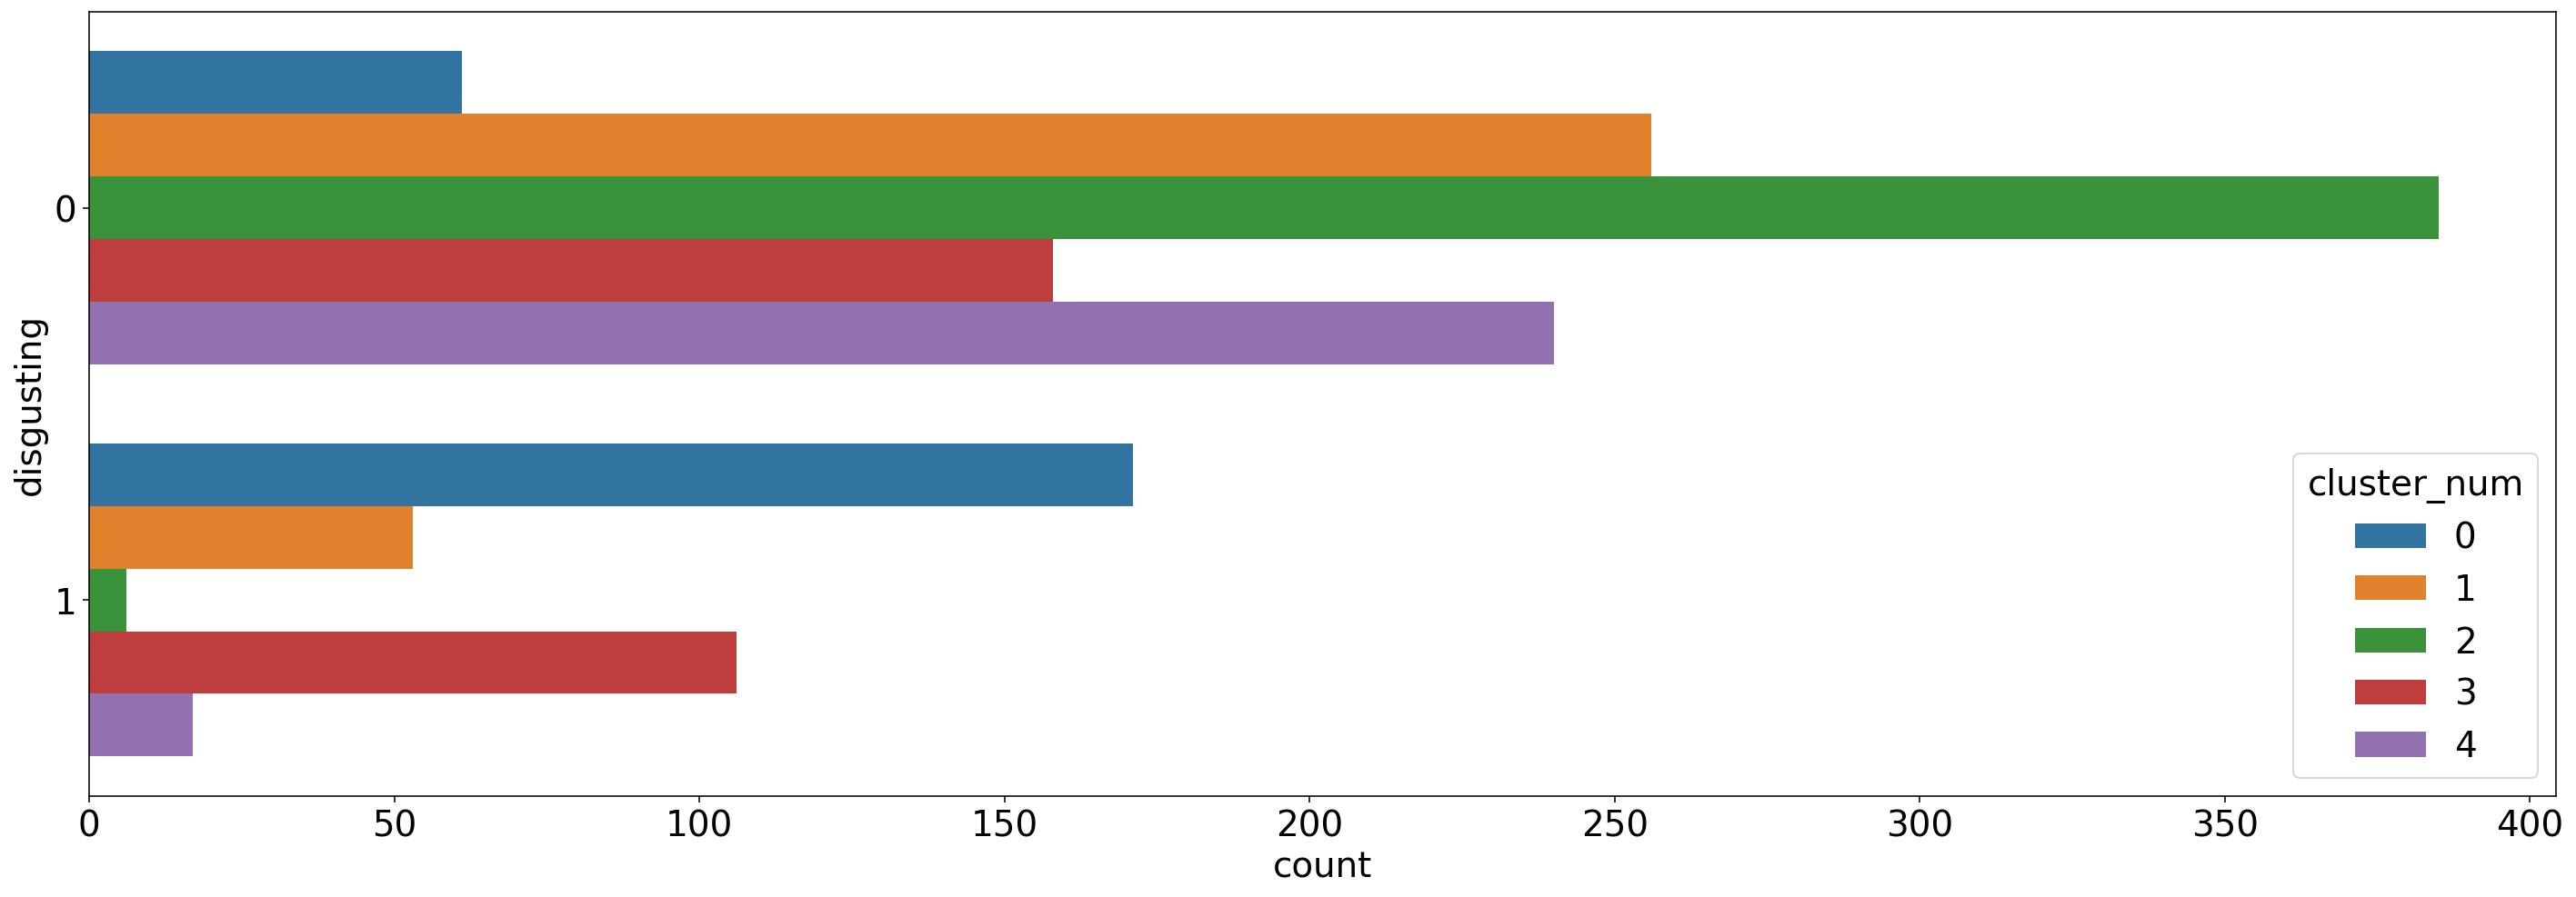

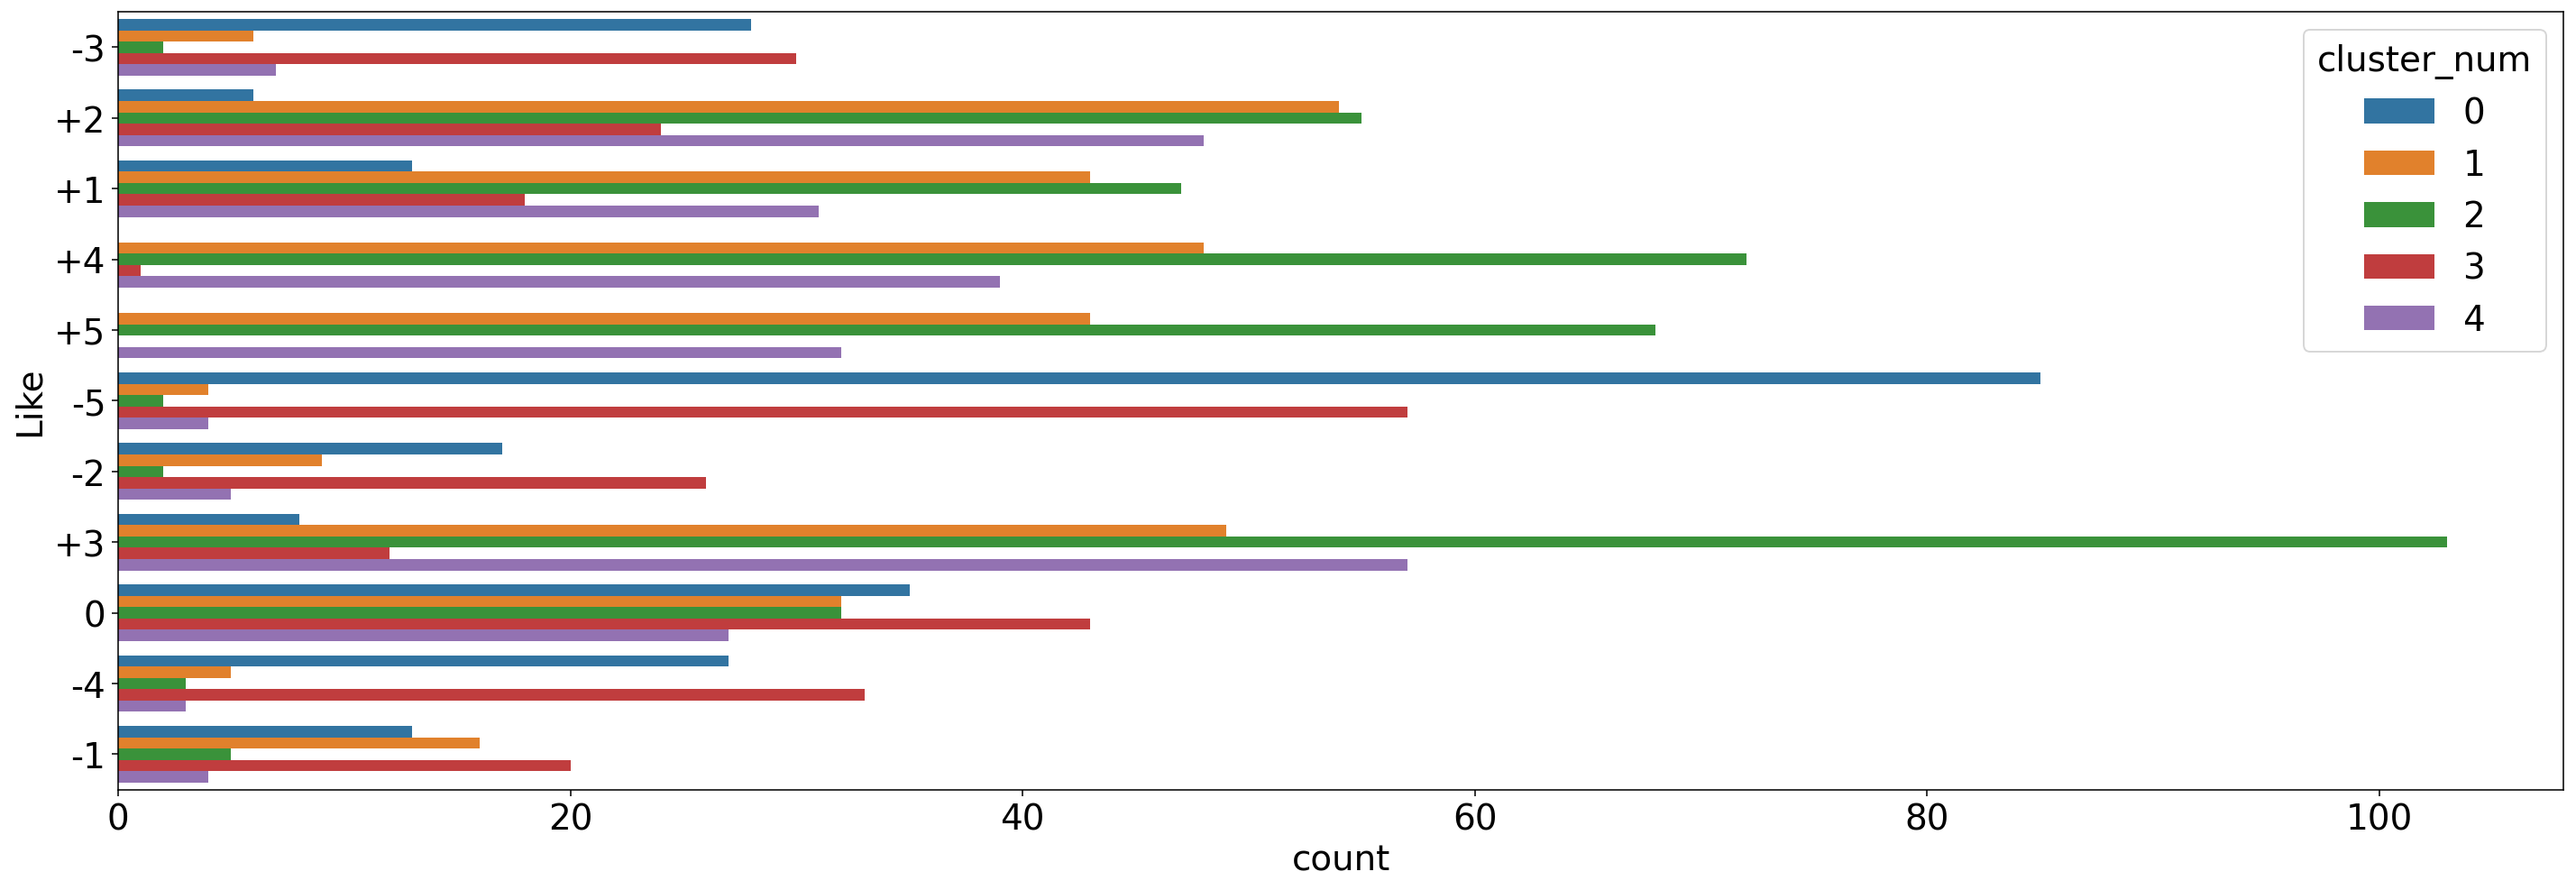

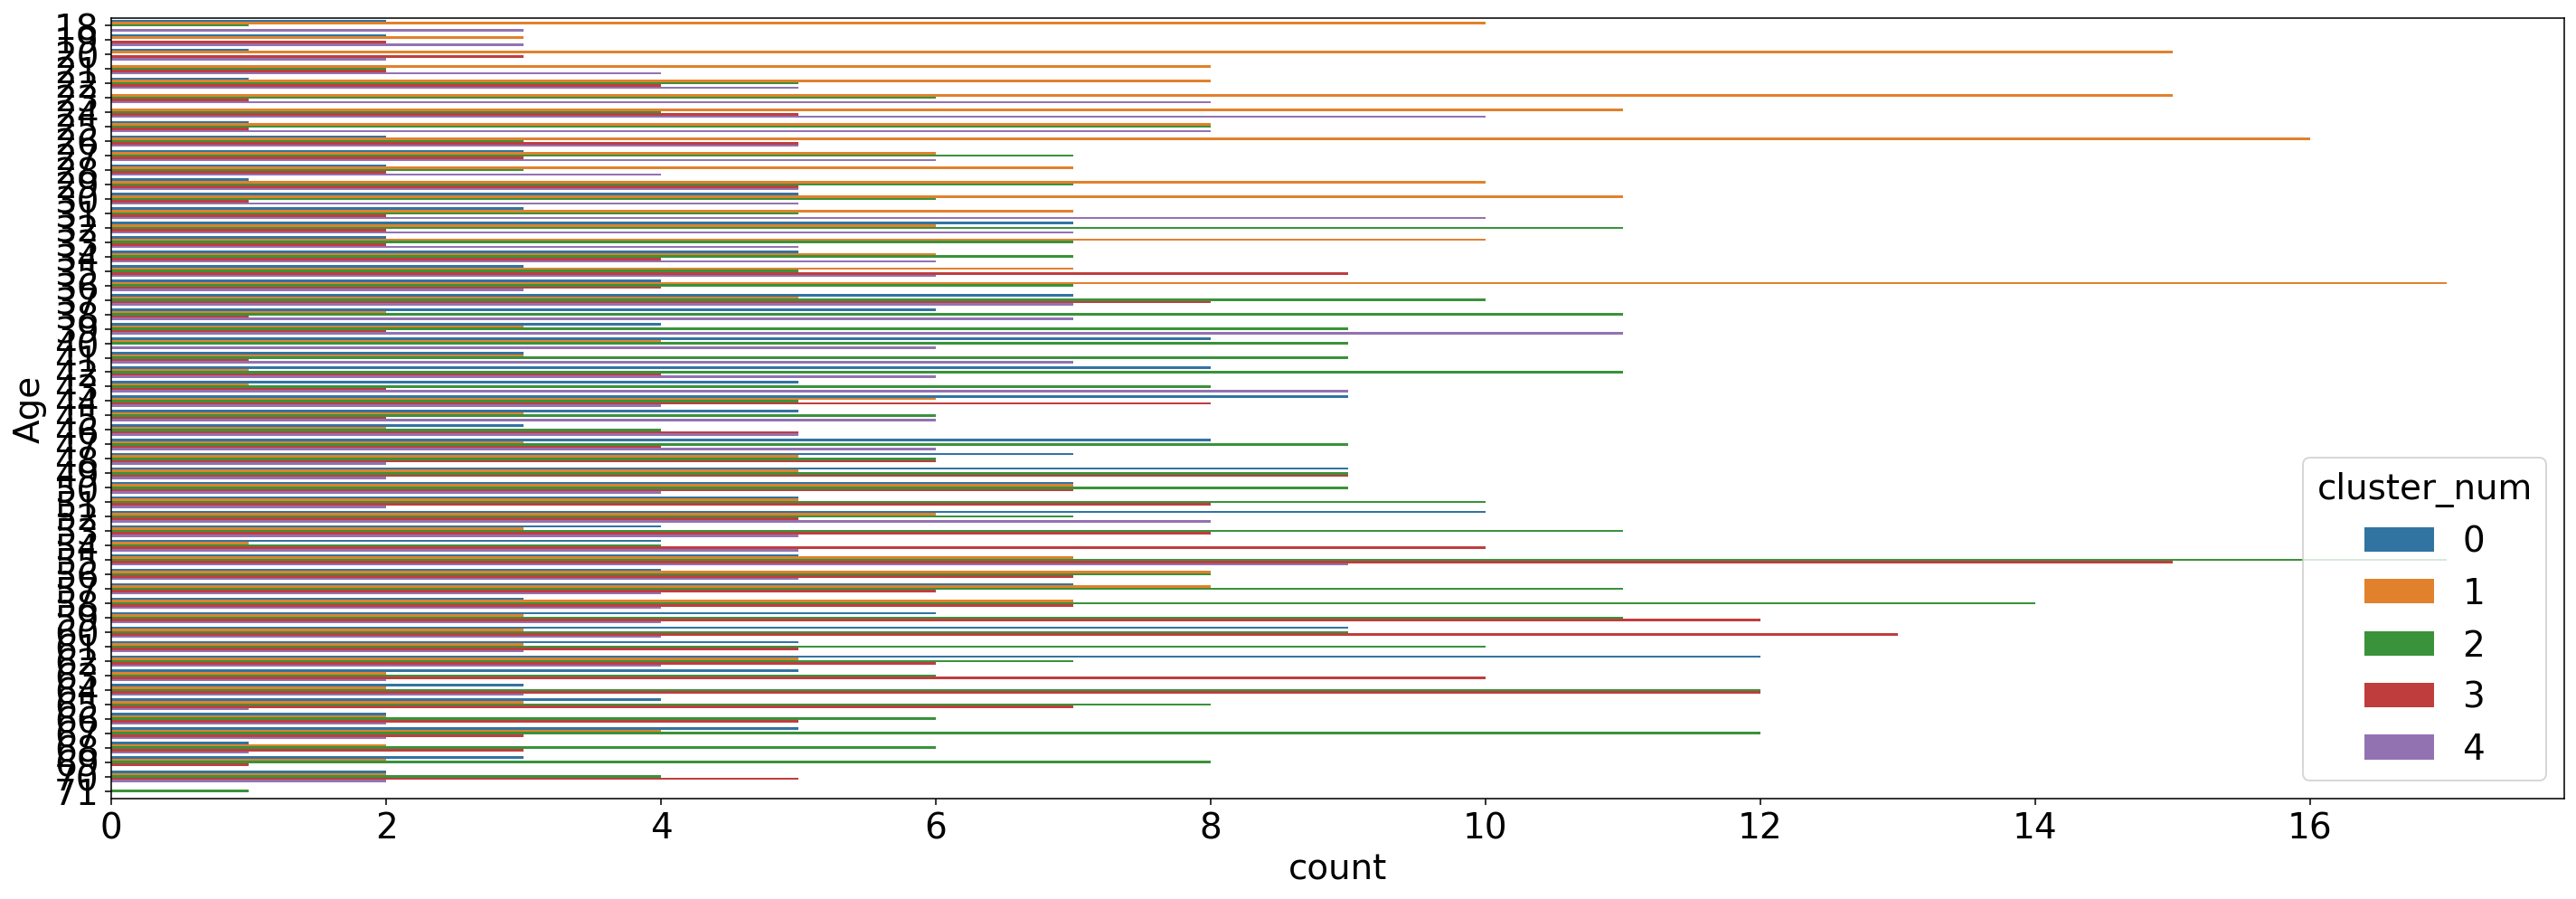

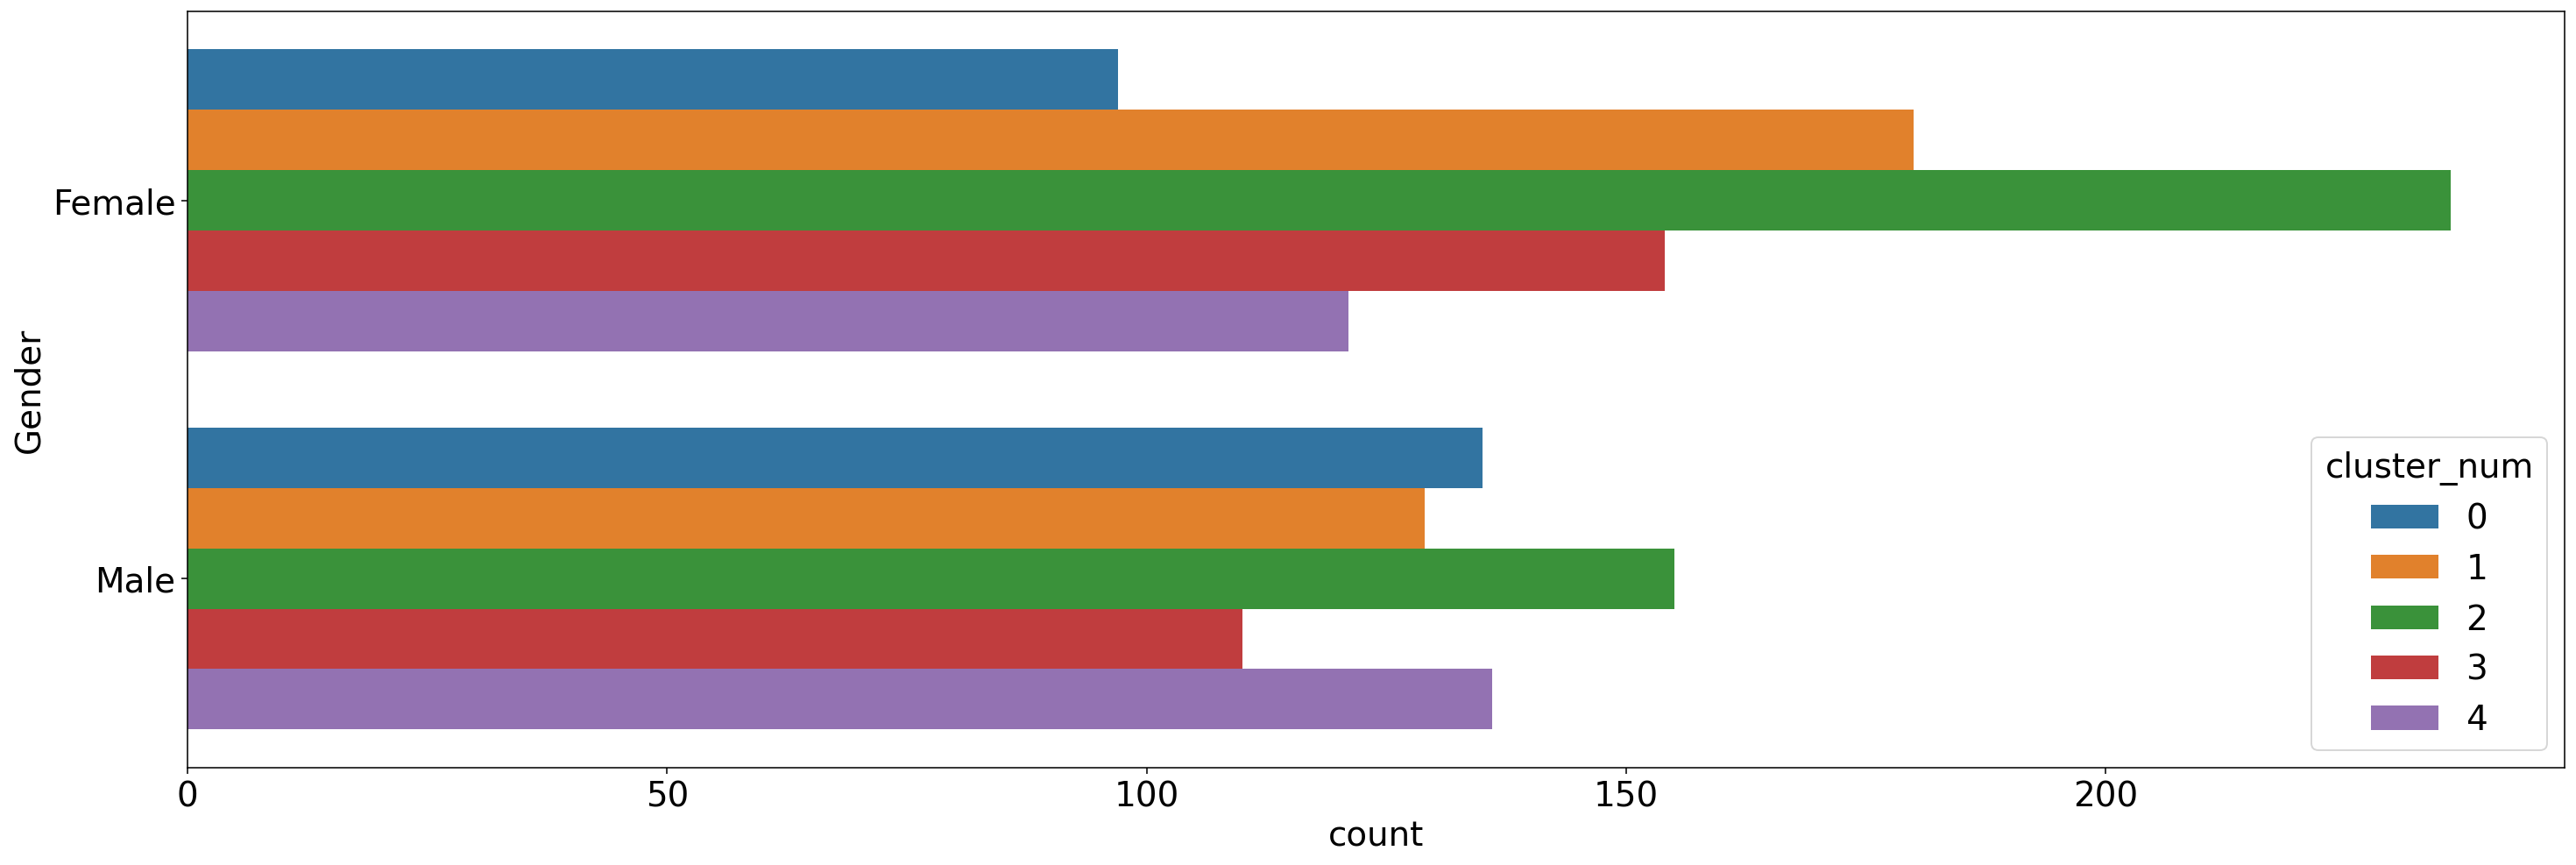

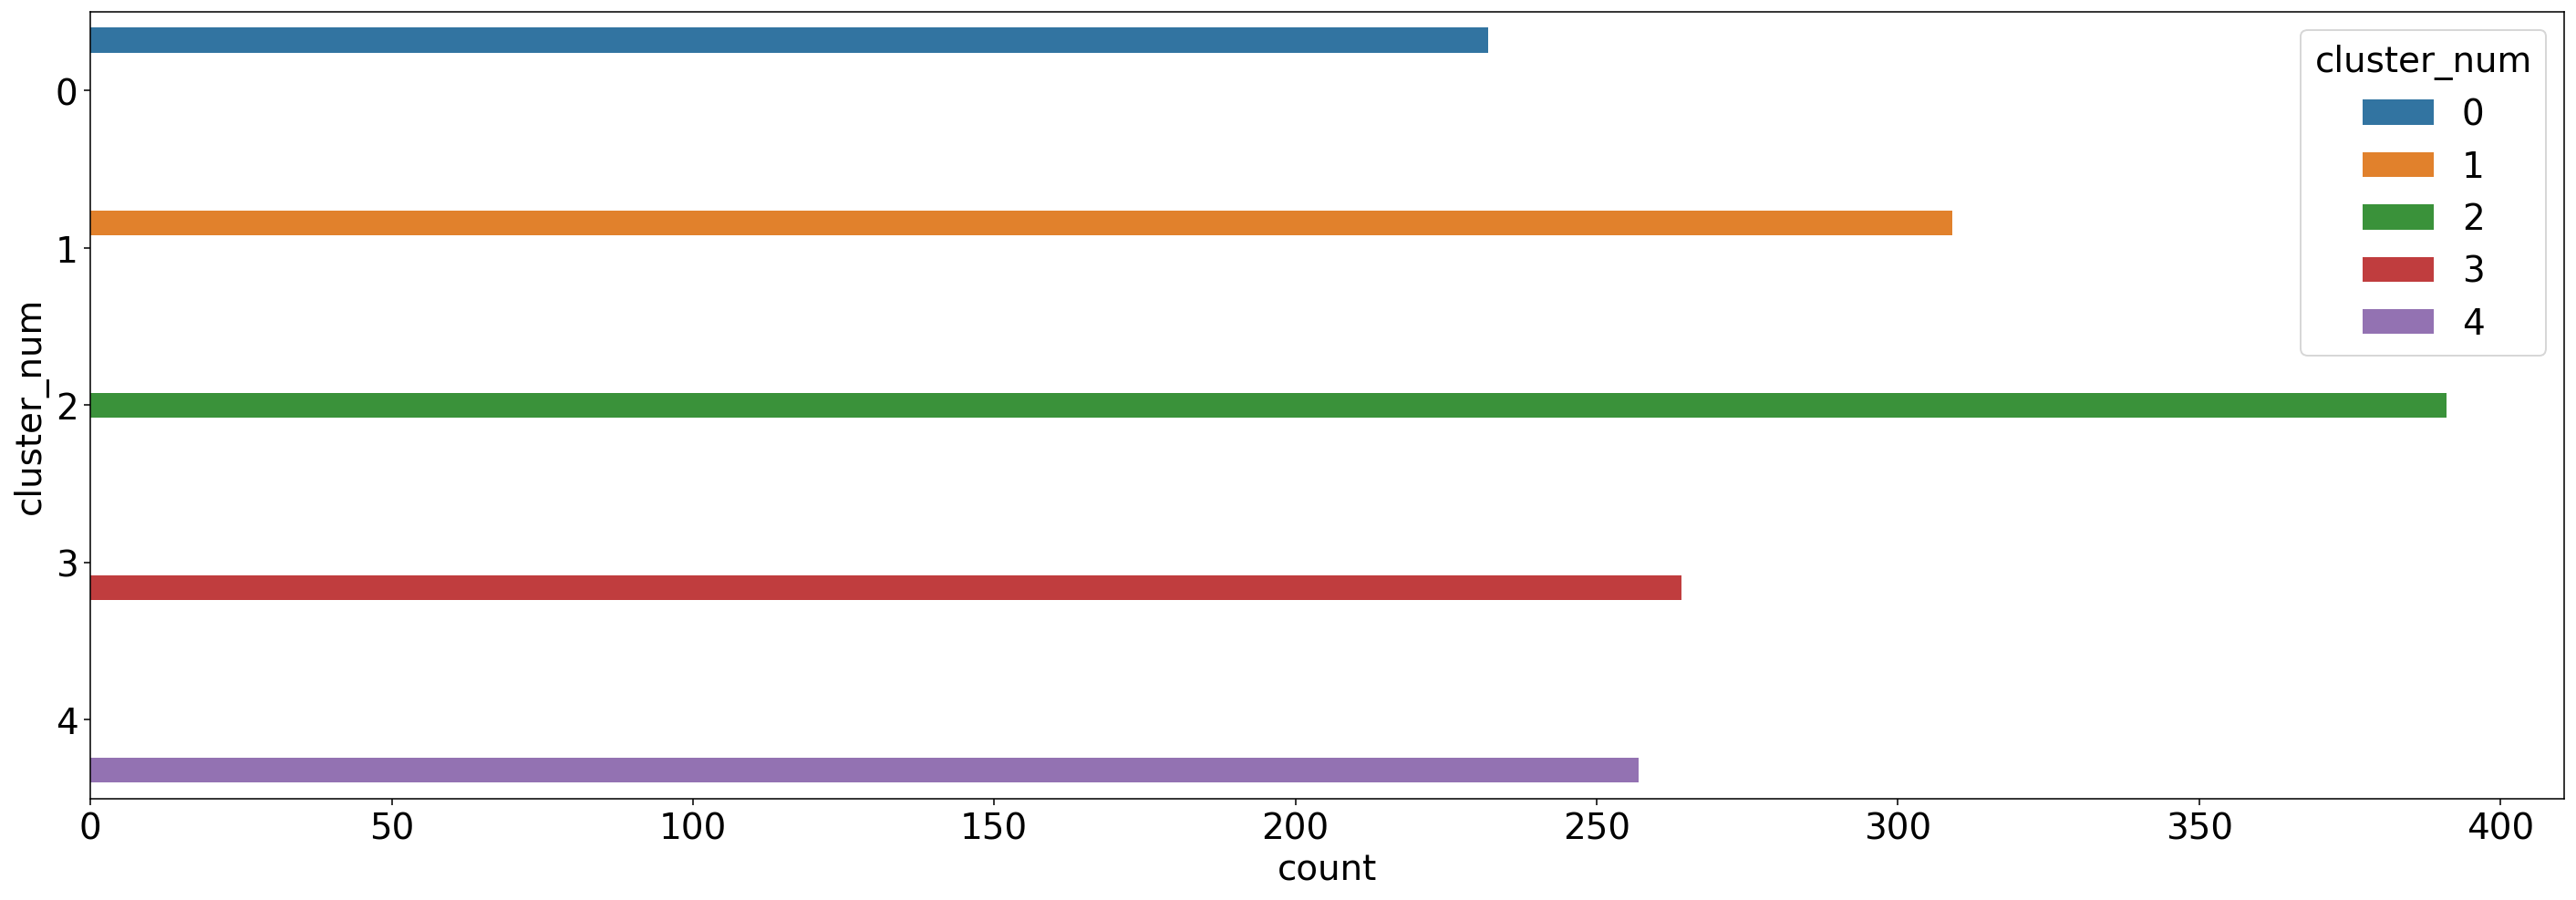

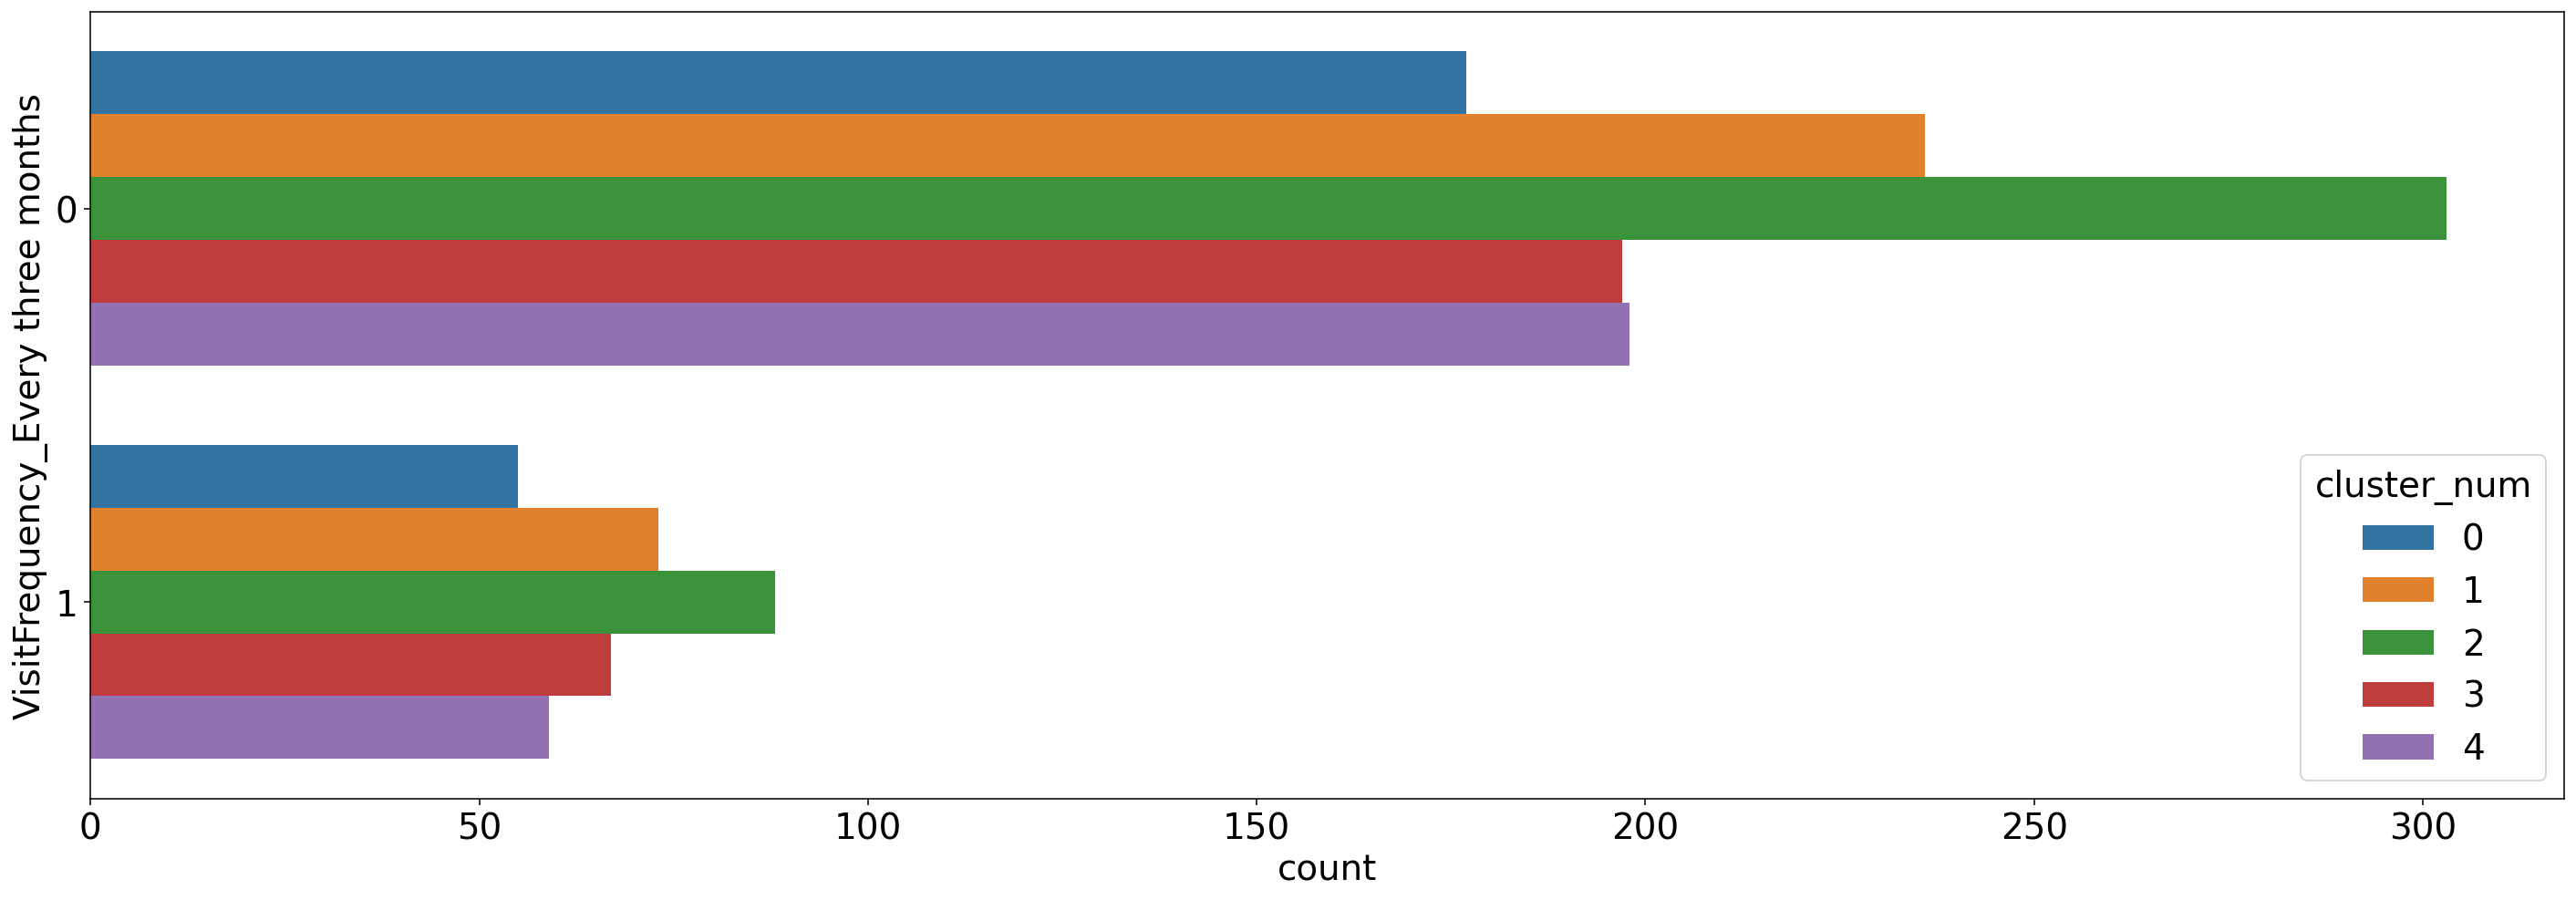

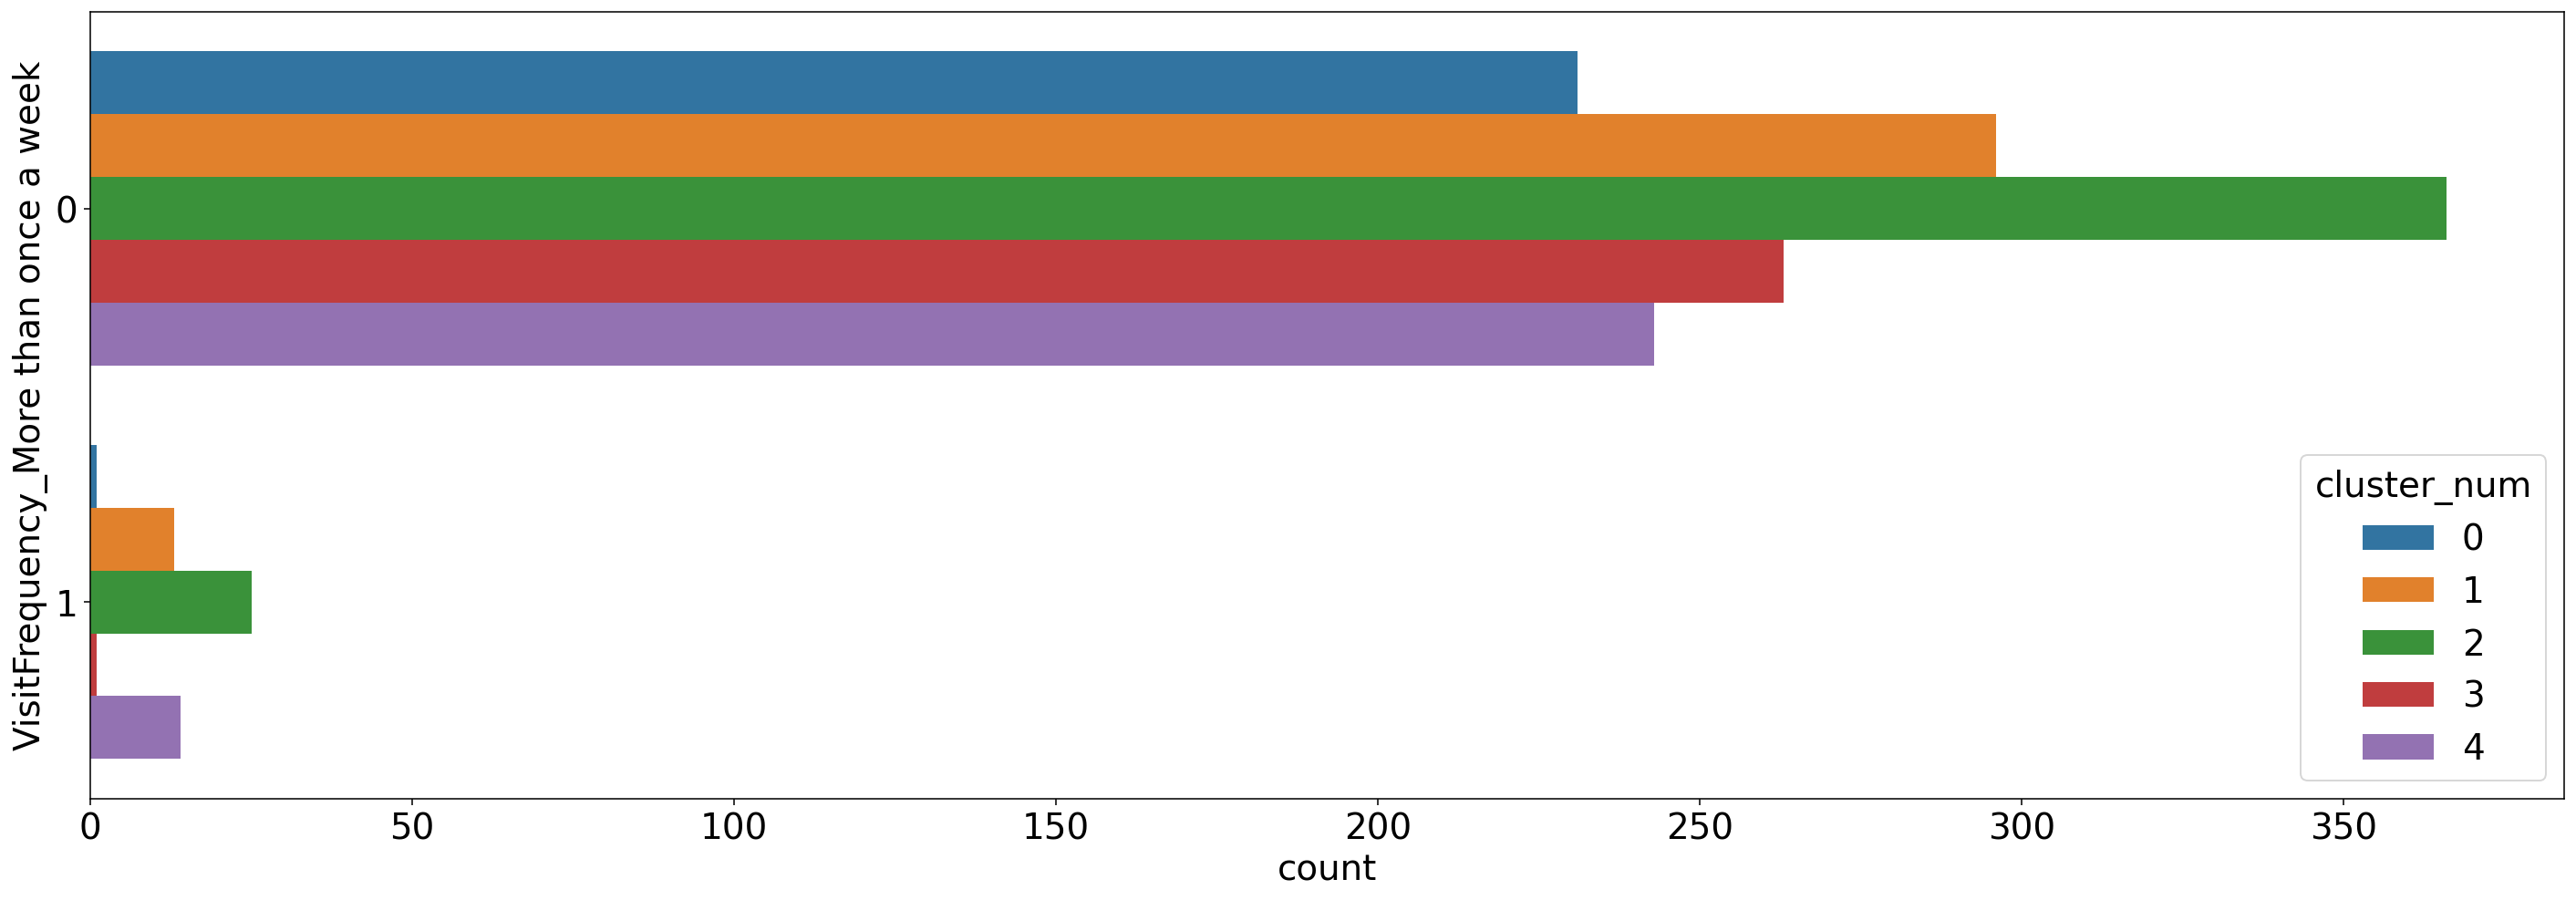

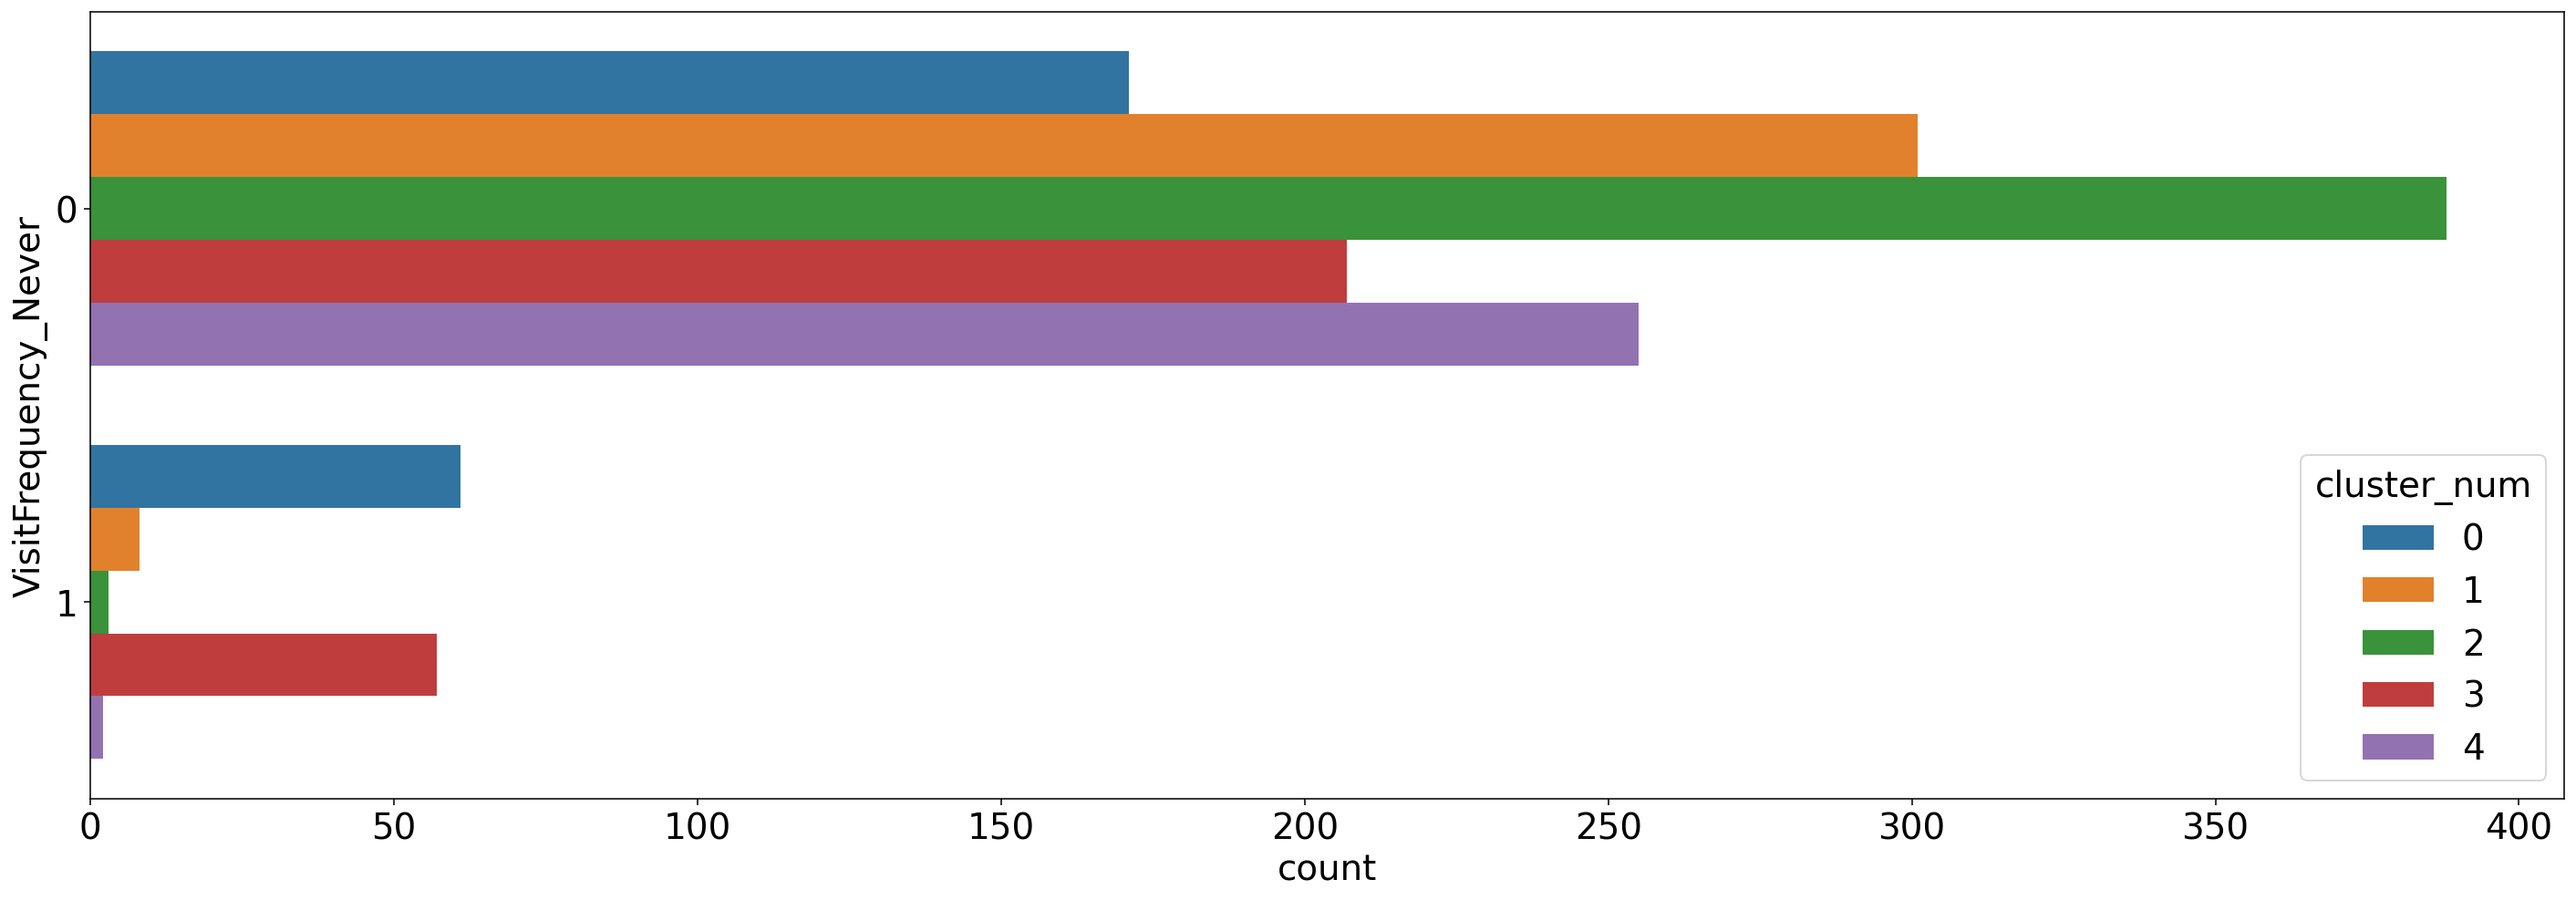

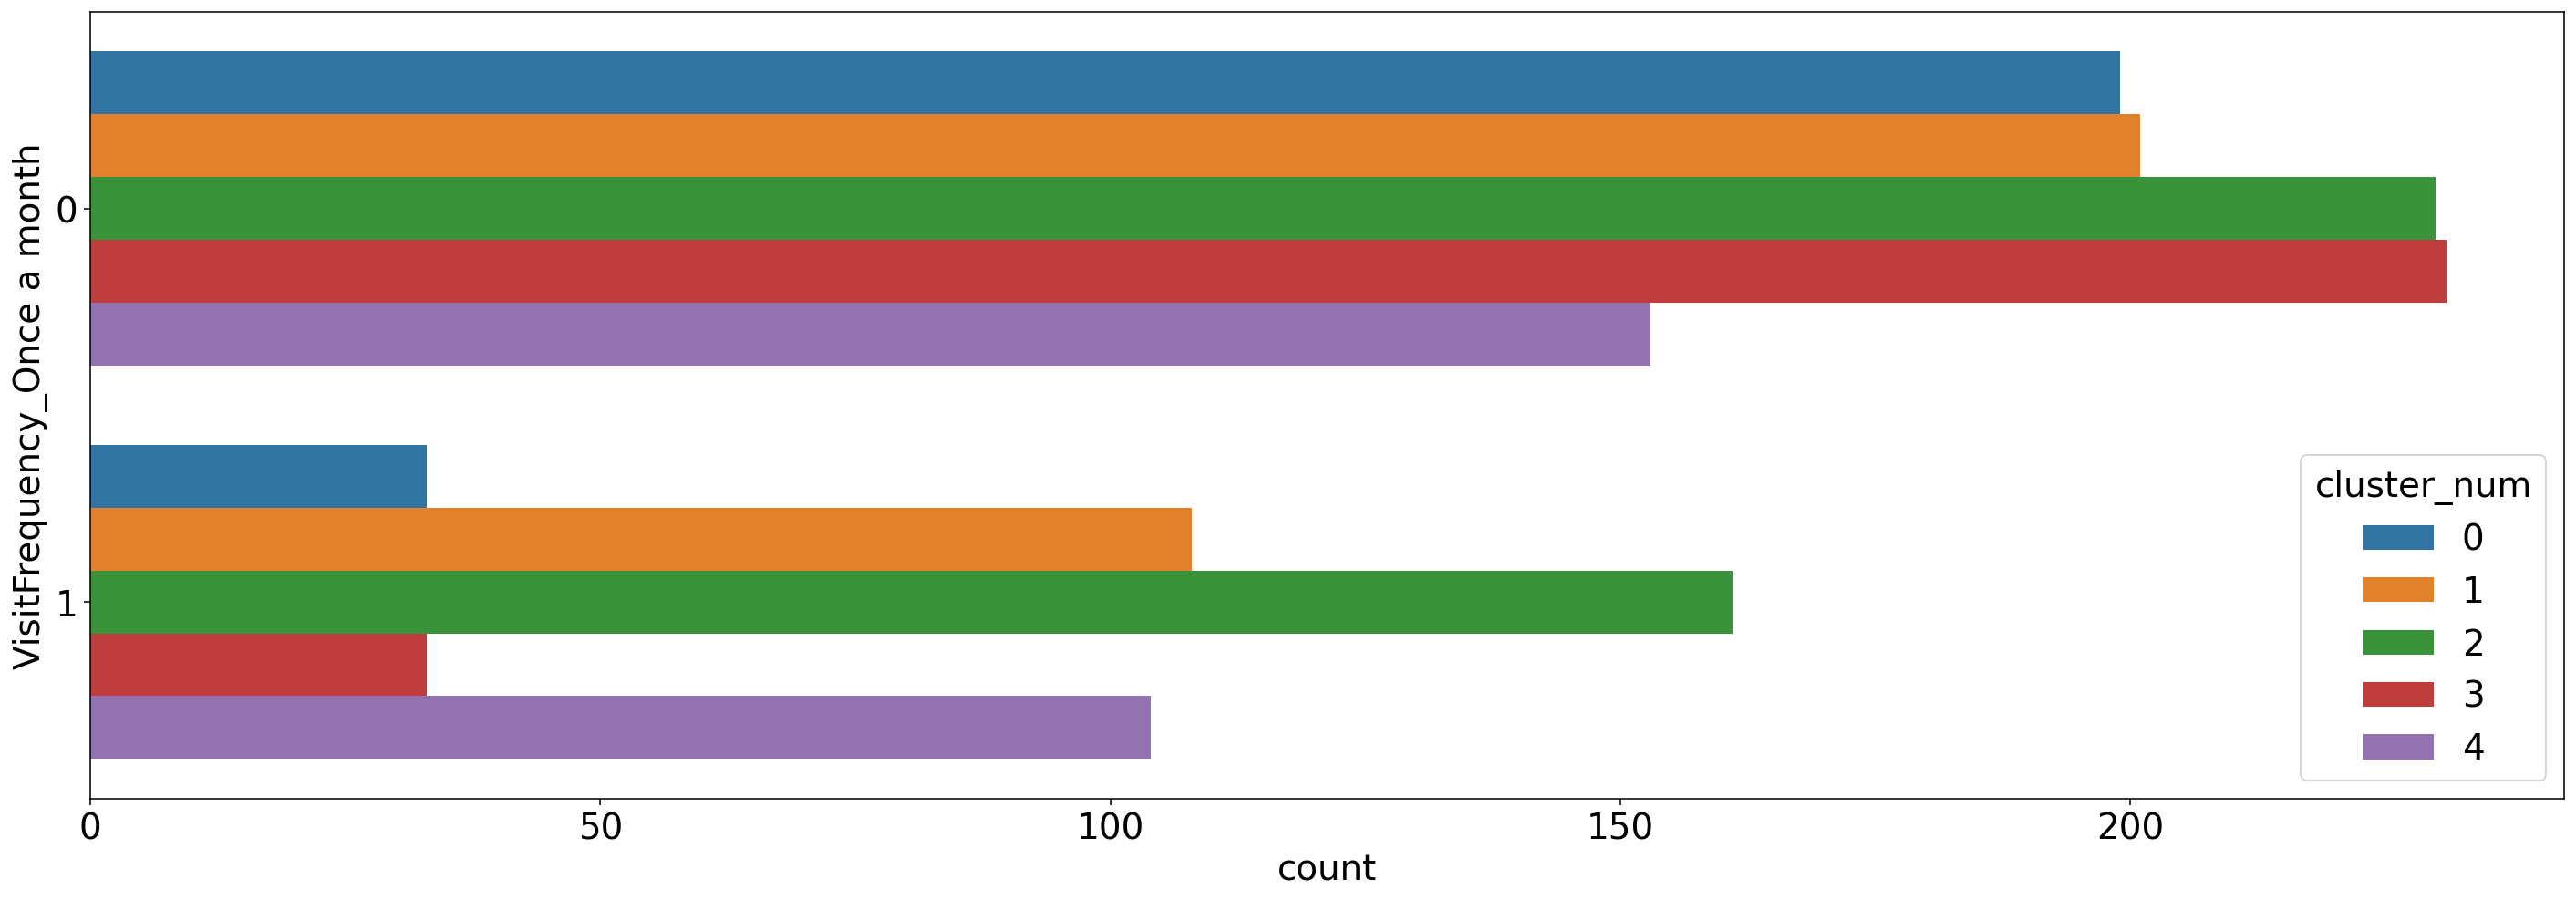

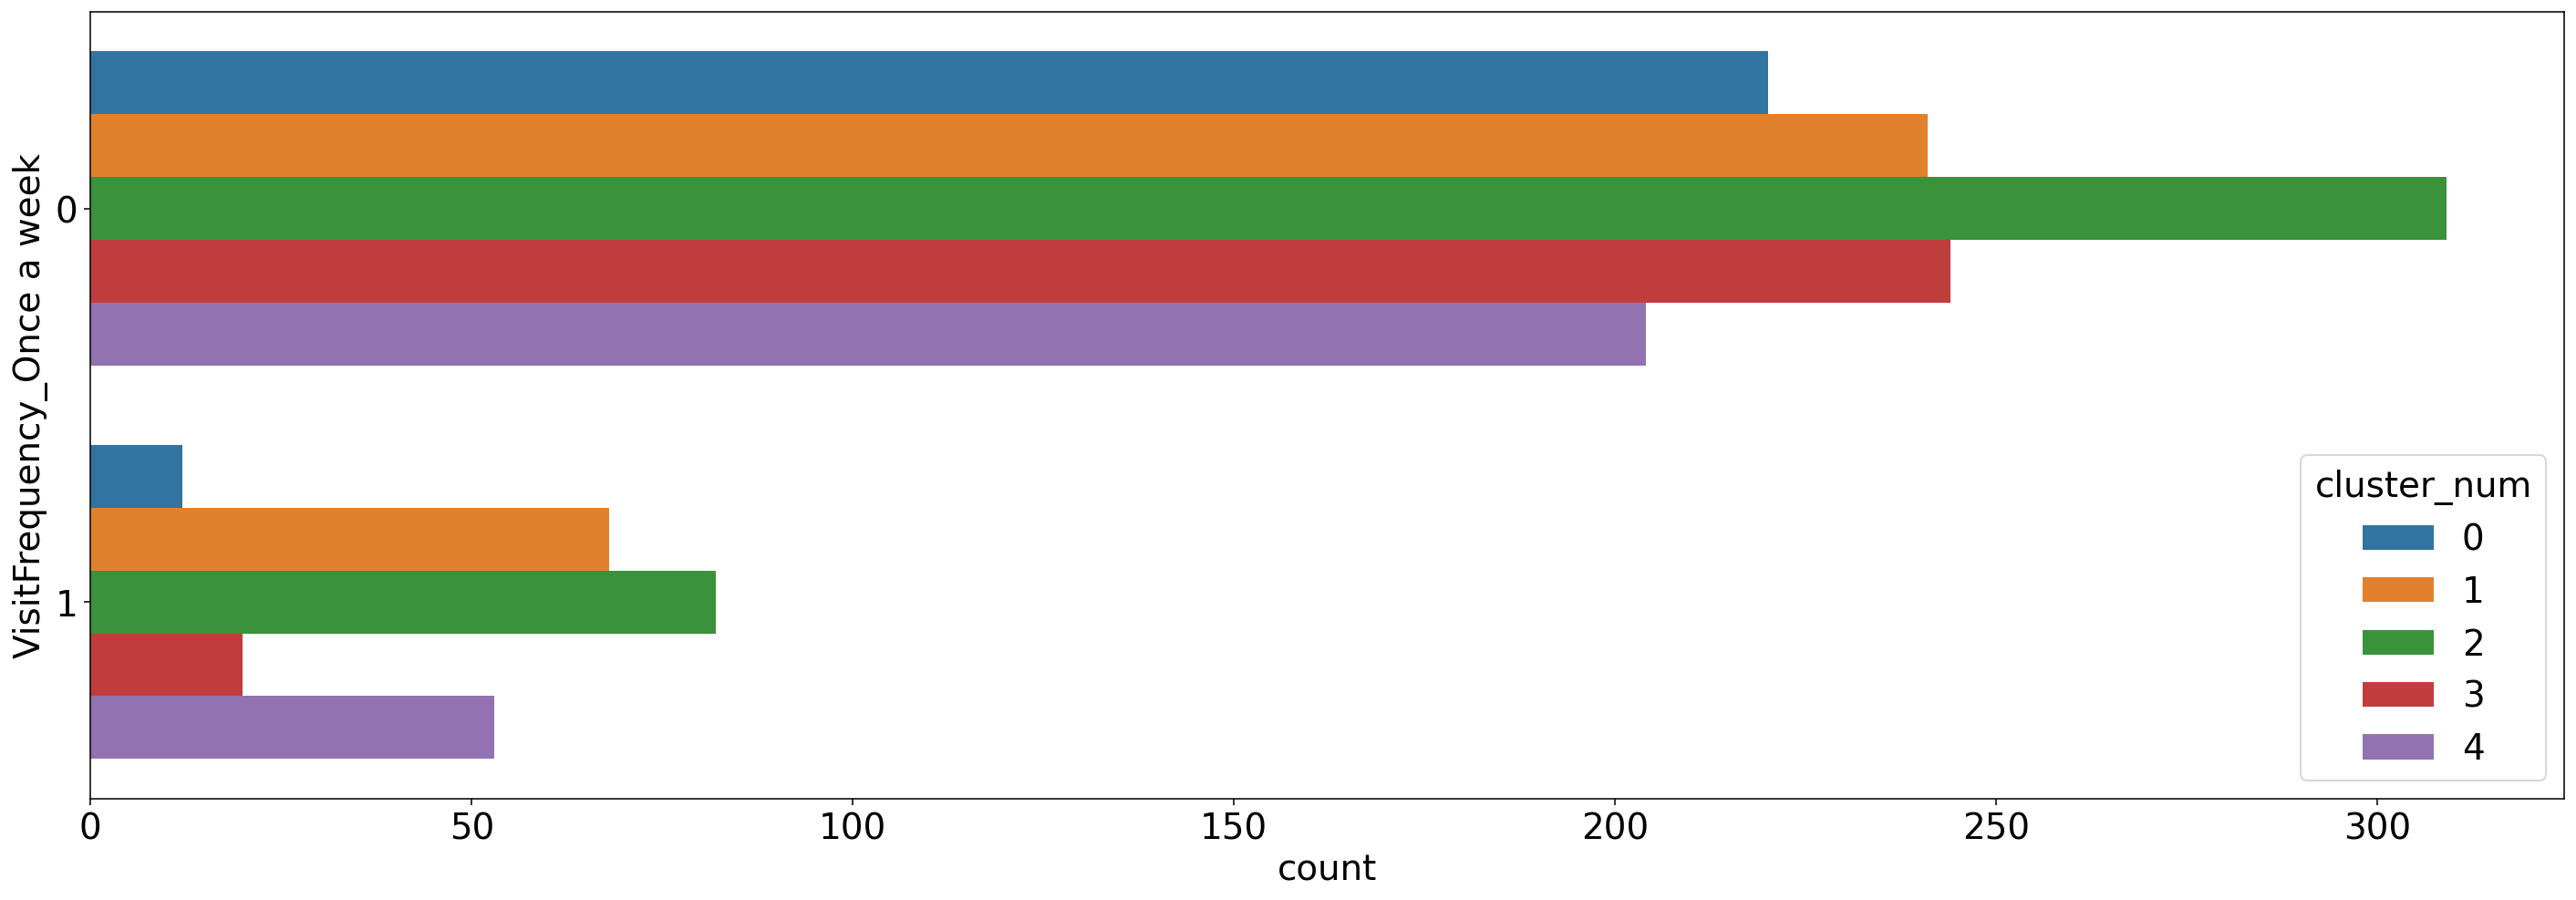

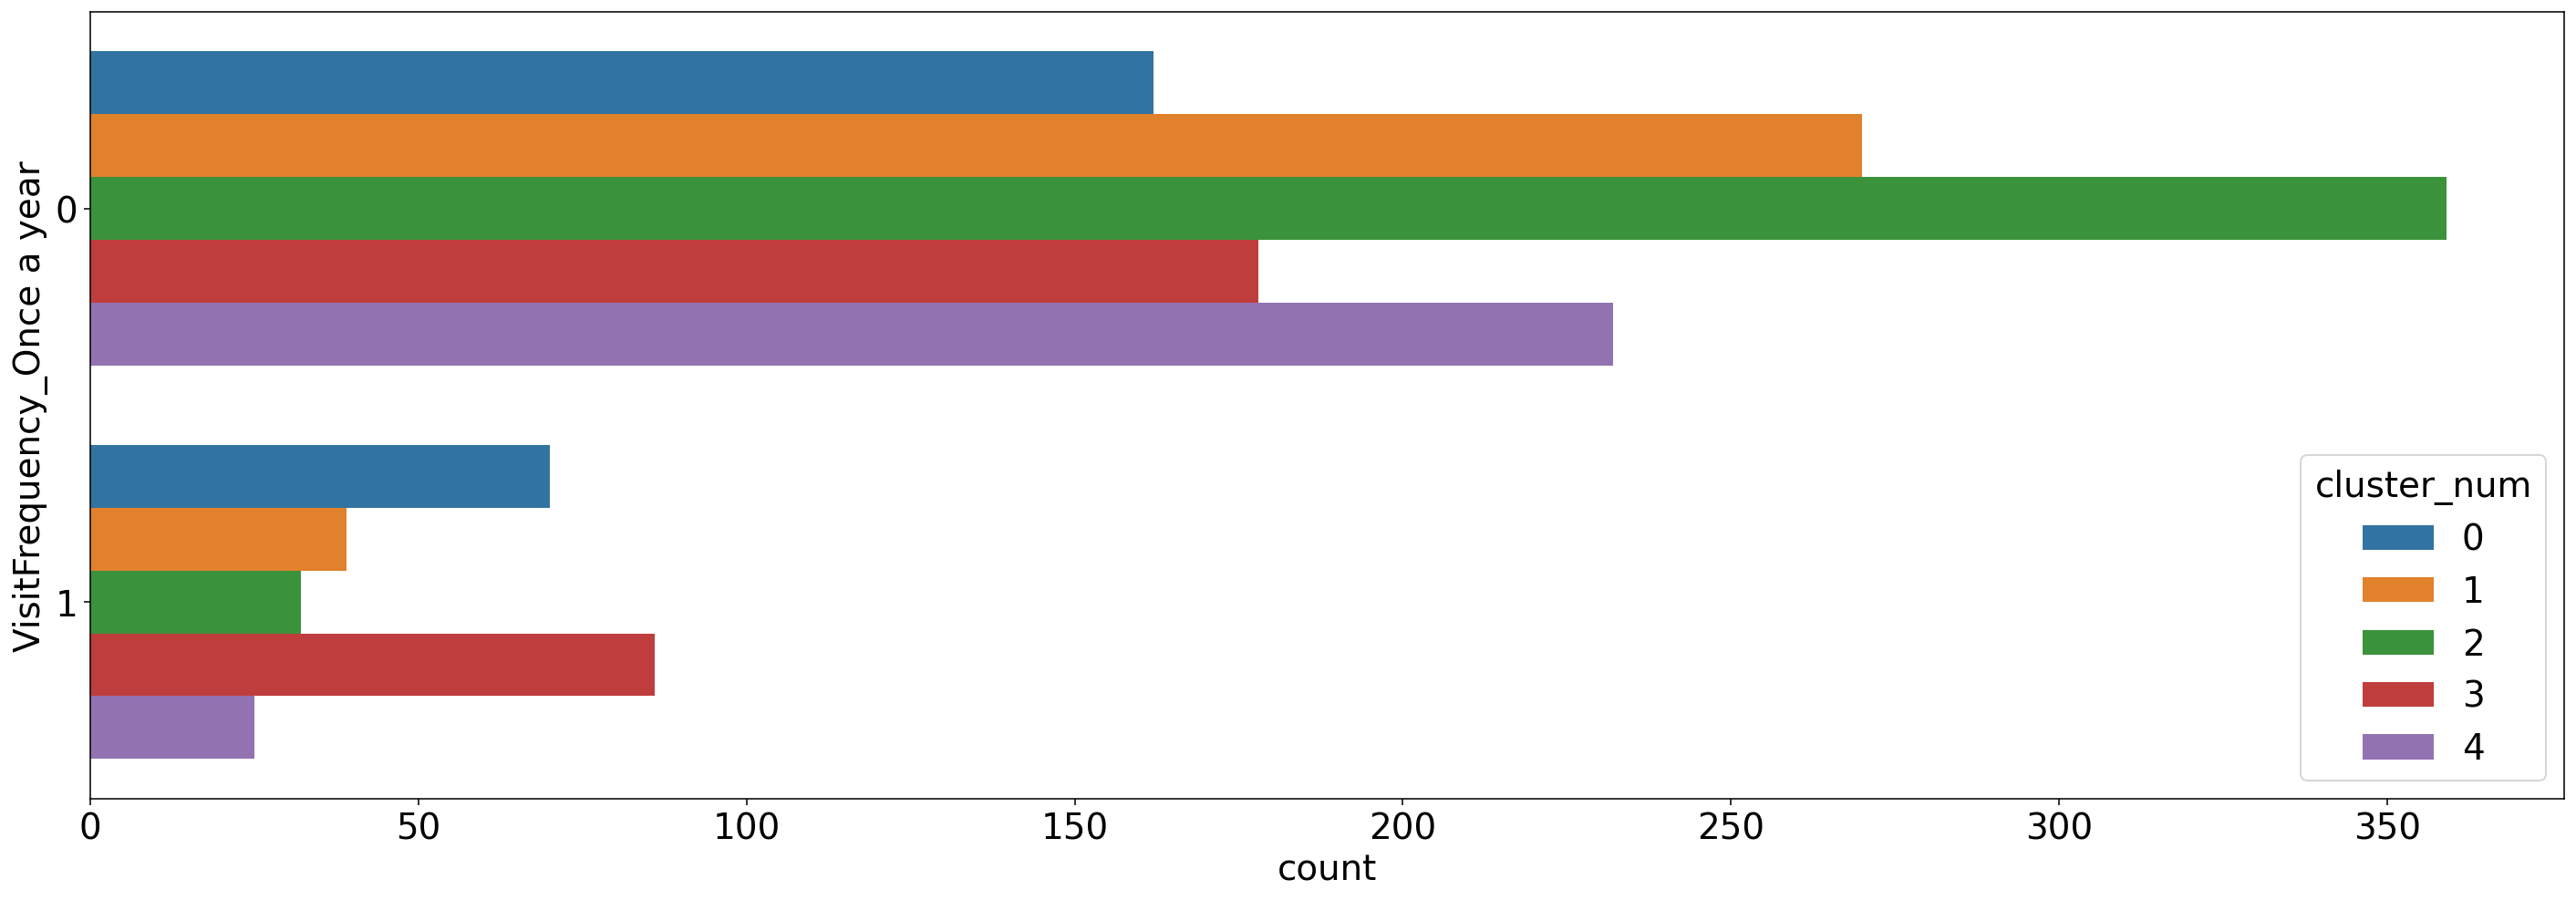

In [187]:
for i in df1.columns:
    sns.countplot(y=df1[i], hue=df1['cluster_num'], data=df1)
    plt.rcParams['figure.dpi'] = 140
    plt.rcParams['font.size'] = 20
    plt.show()

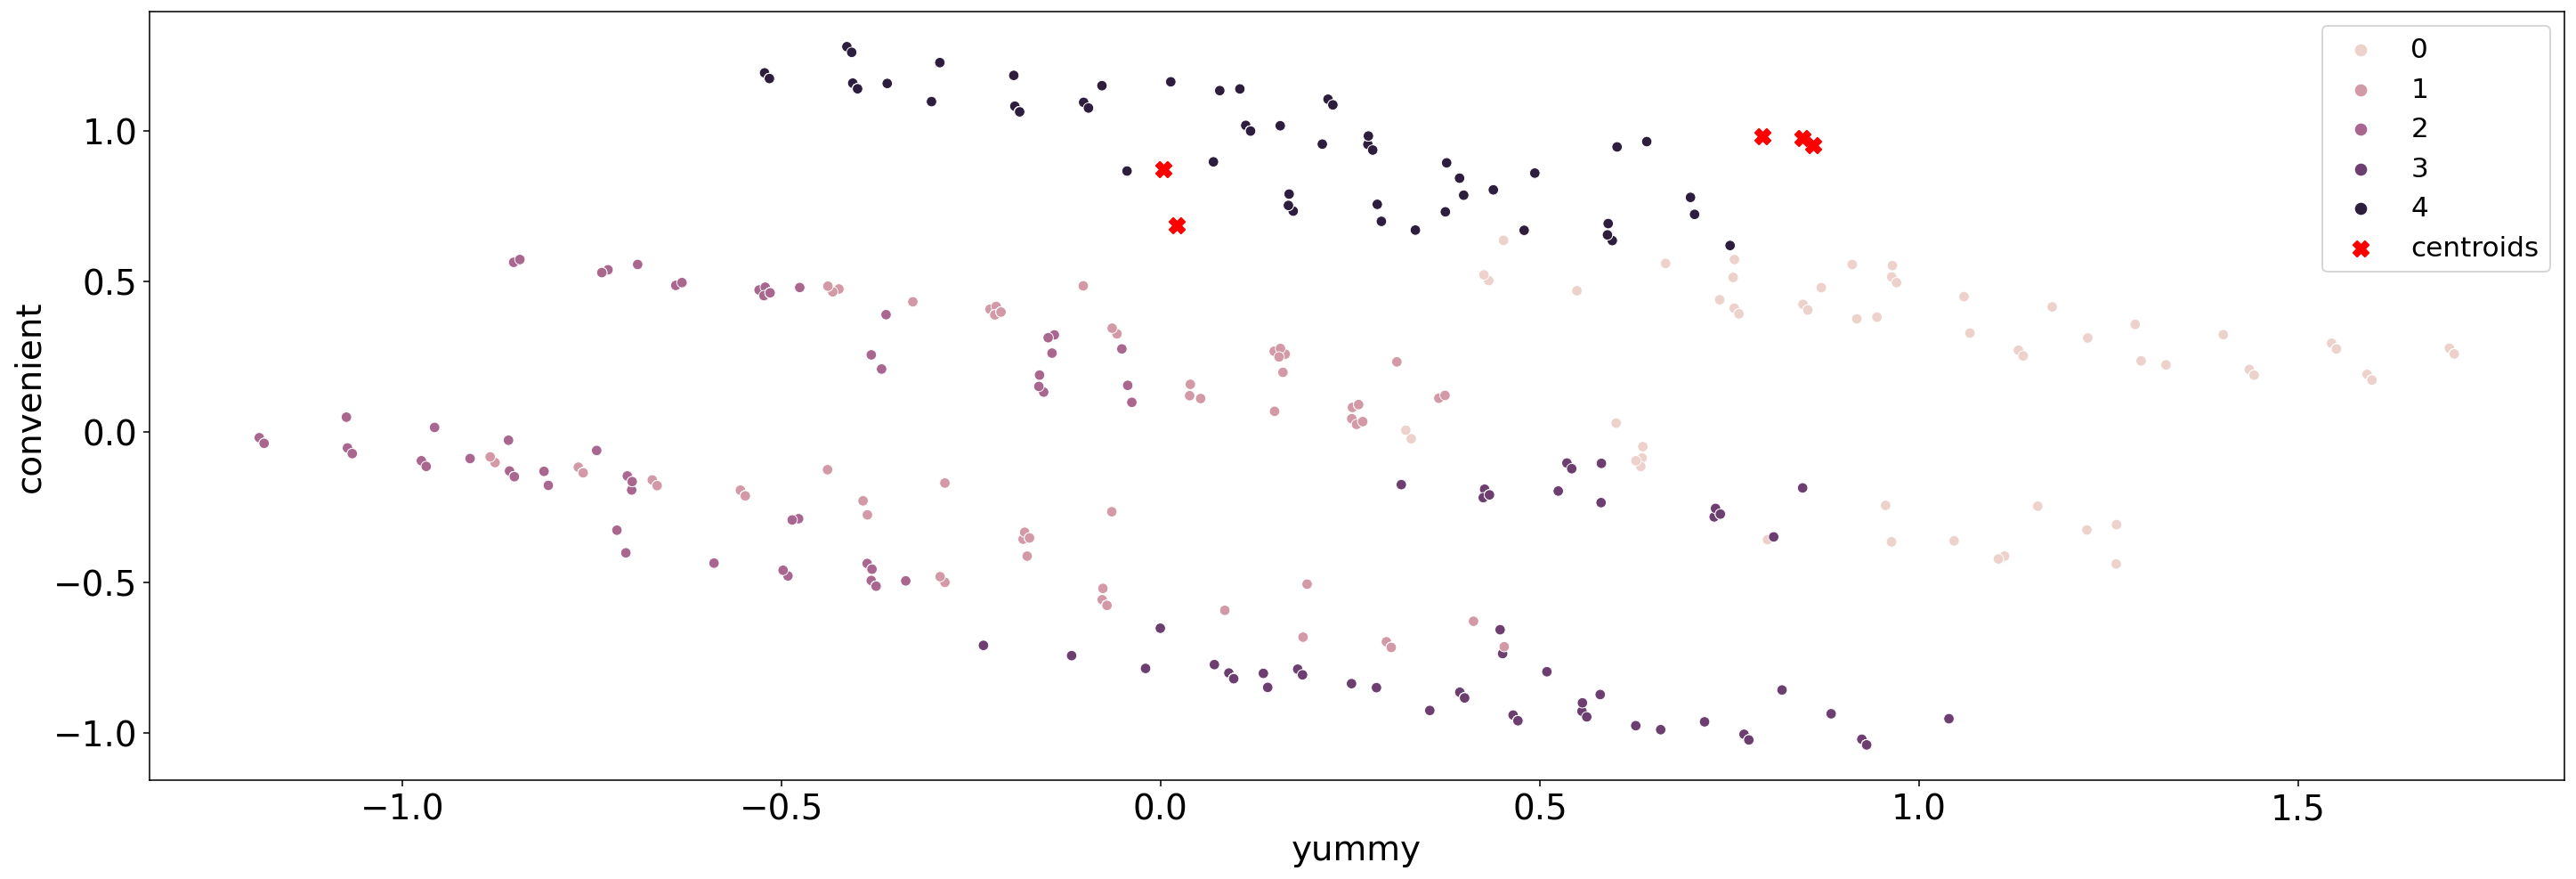

In [188]:
sns.scatterplot(data=pf, x="yummy", y="convenient", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.legend()
plt.show()

In [189]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,85,27,28,17,13,35,13,6,8,0,0
1,4,5,6,9,16,32,43,54,49,48,43
2,2,3,2,2,5,32,47,55,103,72,68
3,57,33,30,26,20,43,18,24,12,1,0
4,4,3,7,5,4,27,31,48,57,39,32


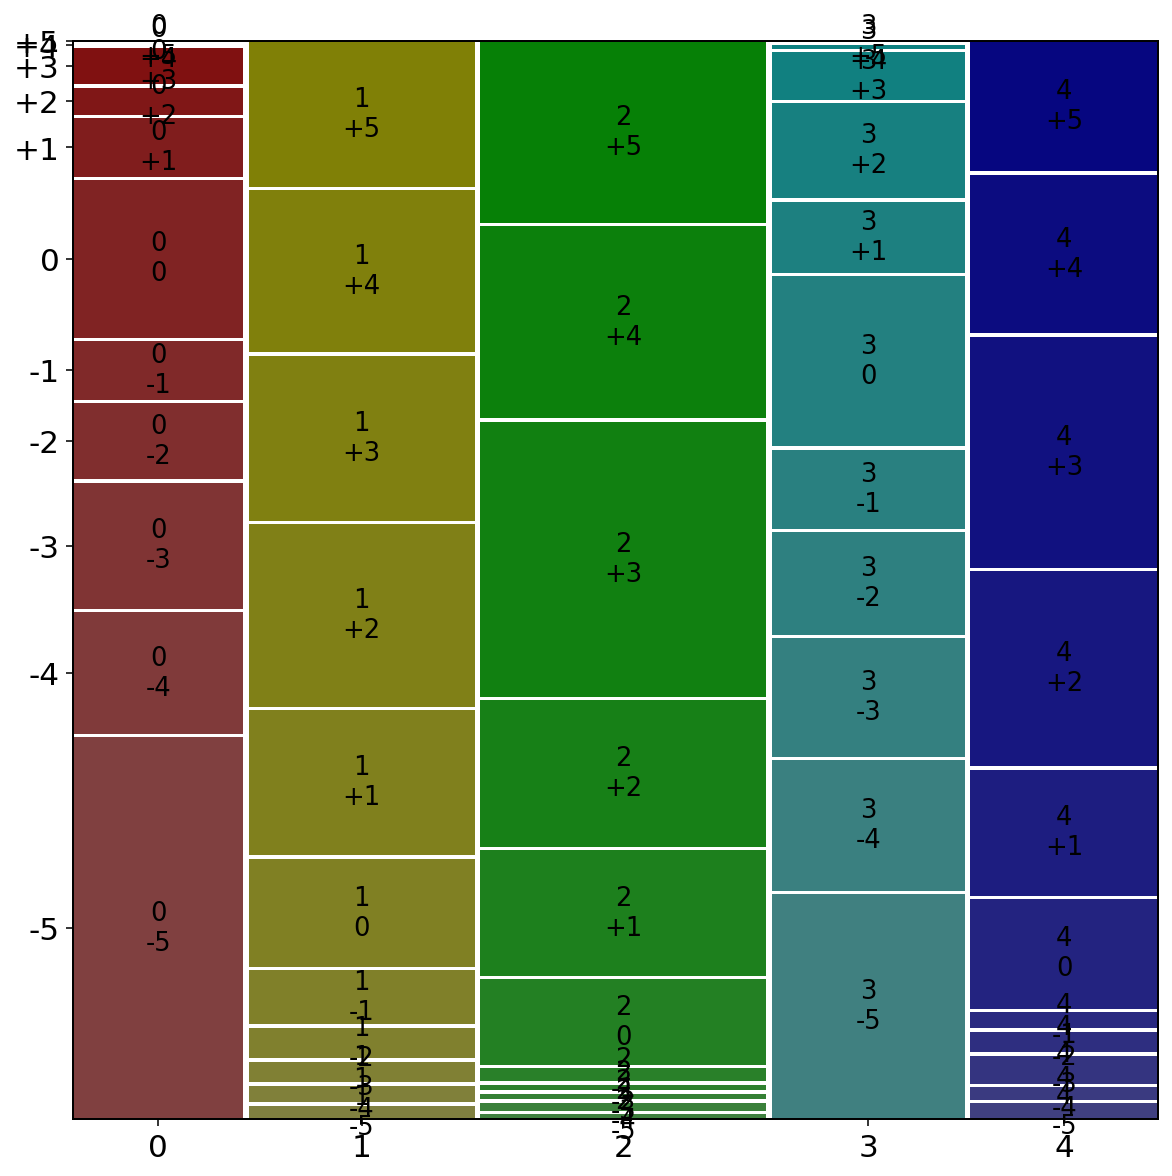

In [190]:
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['font.size'] = 5
plt.show()

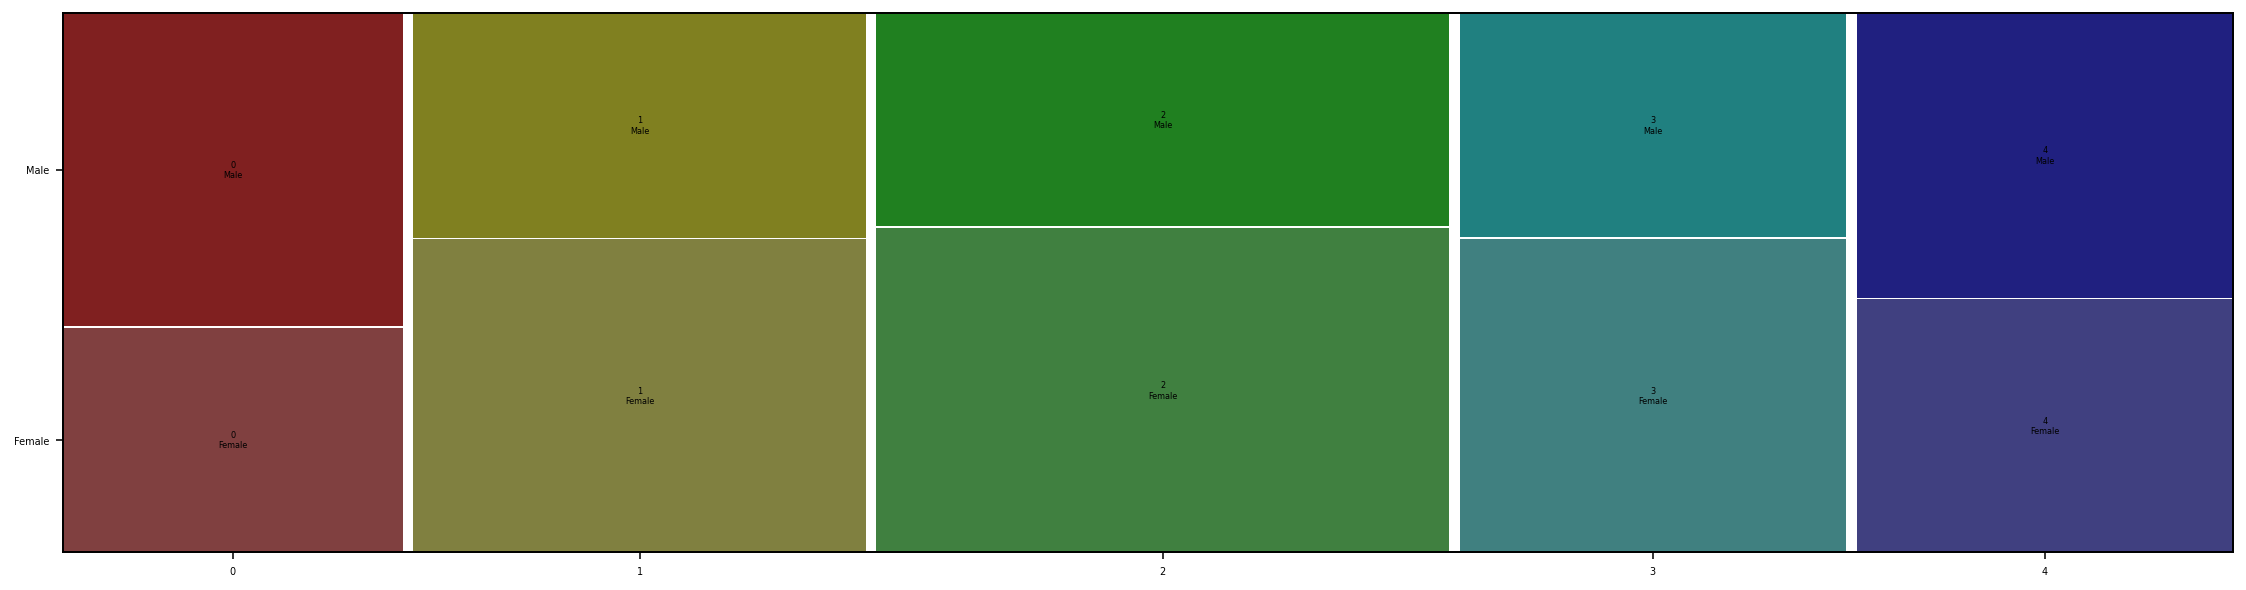

In [191]:
crosstab =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

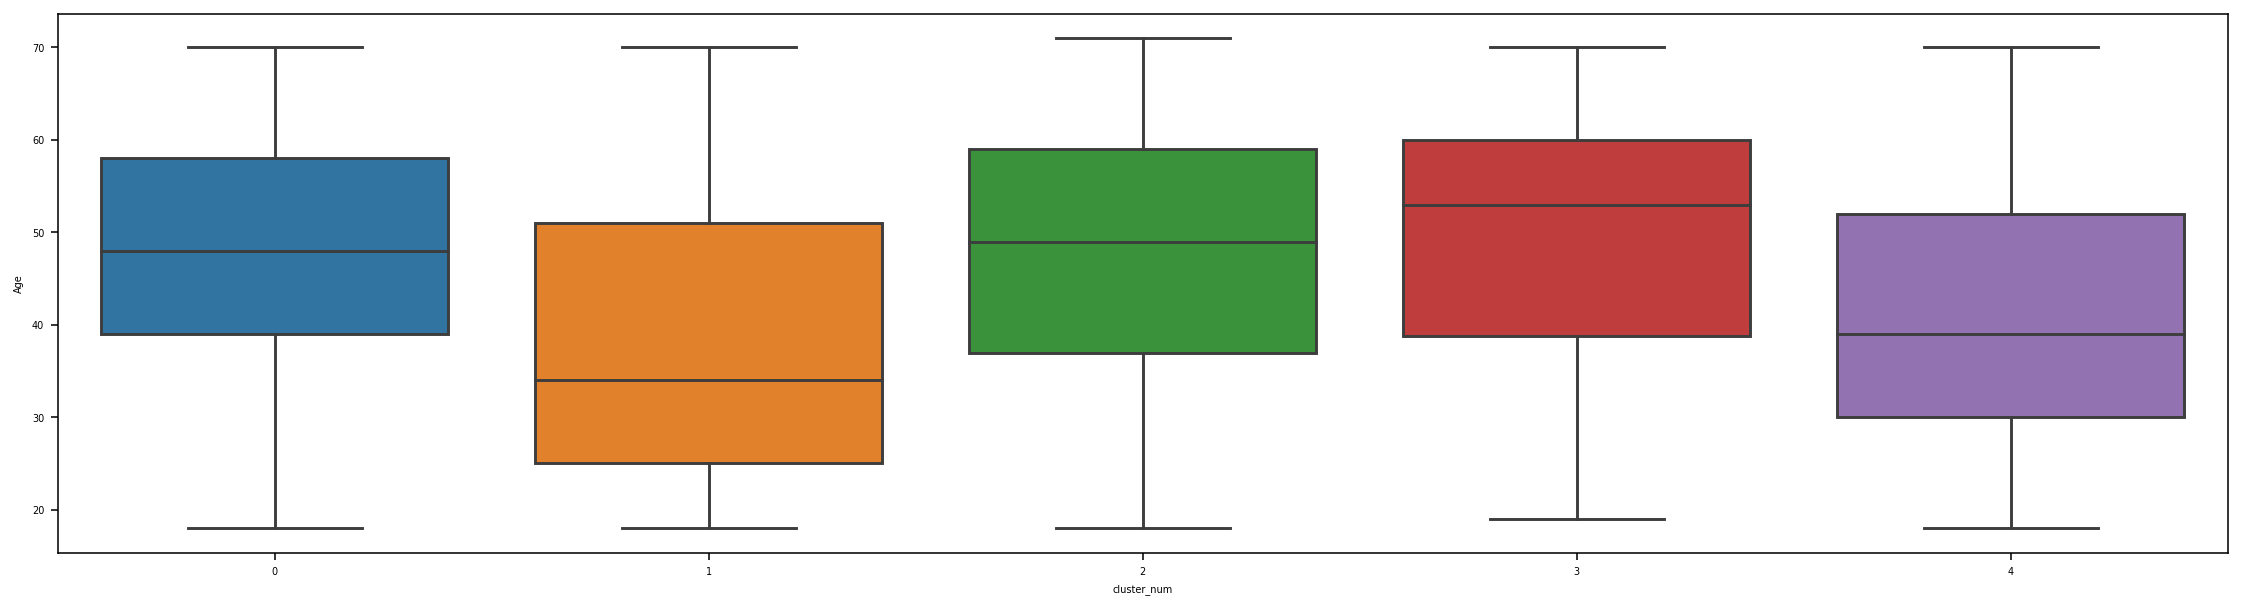

In [192]:
sns.boxplot(x='cluster_num', y='Age', data=df1)

In [193]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,4
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,0
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,4
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,2


In [194]:

df['VisitFrequency'] = le.fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean().reset_index()

print(visit)

   cluster_num  VisitFrequency
0            0        2.672414
1            1        2.653722
2            2        2.562660
3            3        2.742424
4            4        2.595331


In [195]:
df['Like'] = le.fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.396552
1,1,3.365696
2,2,2.971867
3,3,6.530303
4,4,3.252918


In [196]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.581897
1,1,0.417476
2,2,0.396419
3,3,0.416667
4,4,0.529183


In [197]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.581897,7.396552,2.672414
1,1,0.417476,3.365696,2.653722
2,2,0.396419,2.971867,2.562660
3,3,0.416667,6.530303,2.742424
4,4,0.529183,3.252918,2.595331


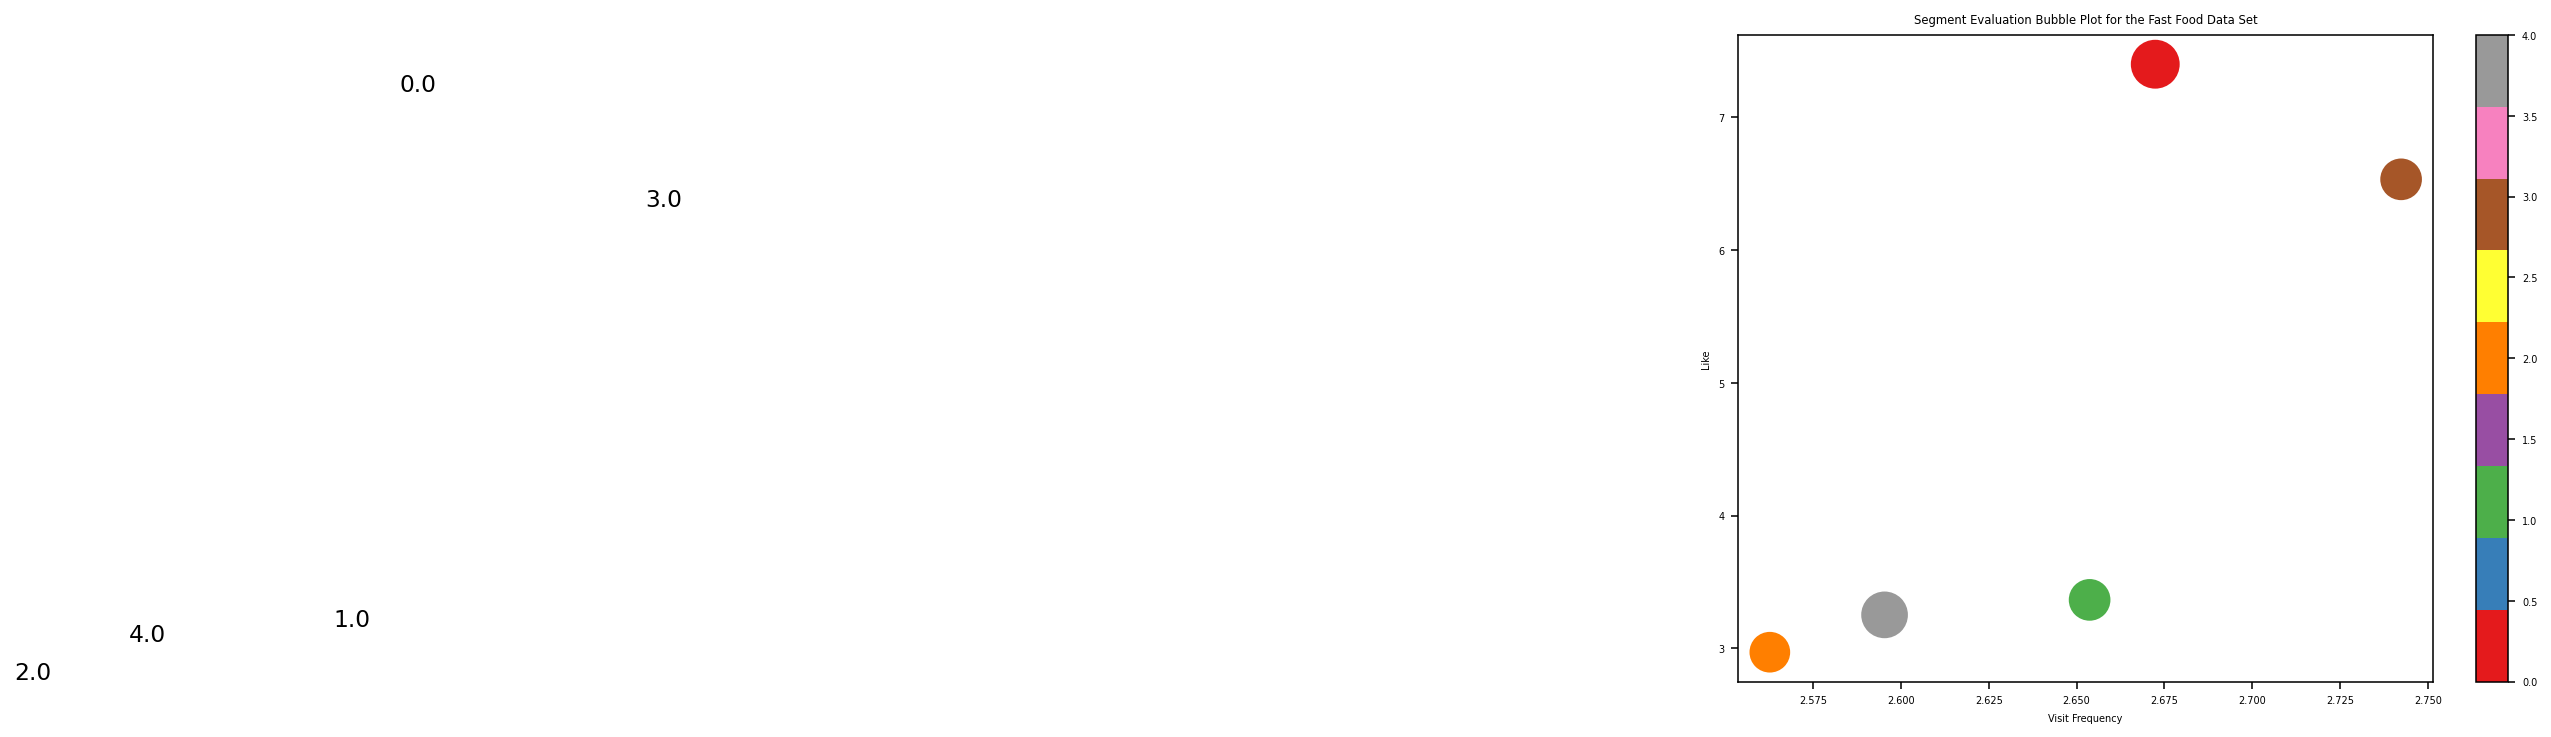

In [198]:
plt.figure(figsize=(8, 6))
plt.scatter(segment['VisitFrequency'], segment['Like'], s=segment['Gender']*1000, c=segment['cluster_num'], cmap='Set1')
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Segment Evaluation Bubble Plot for the Fast Food Data Set')

for i in range(len(segment)):
    plt.text(segment.iloc[i]['VisitFrequency']-0.5, segment.iloc[i]['Like']-0.2, 
             str(segment.iloc[i]['cluster_num']), fontsize=12)

plt.colorbar()
plt.show()

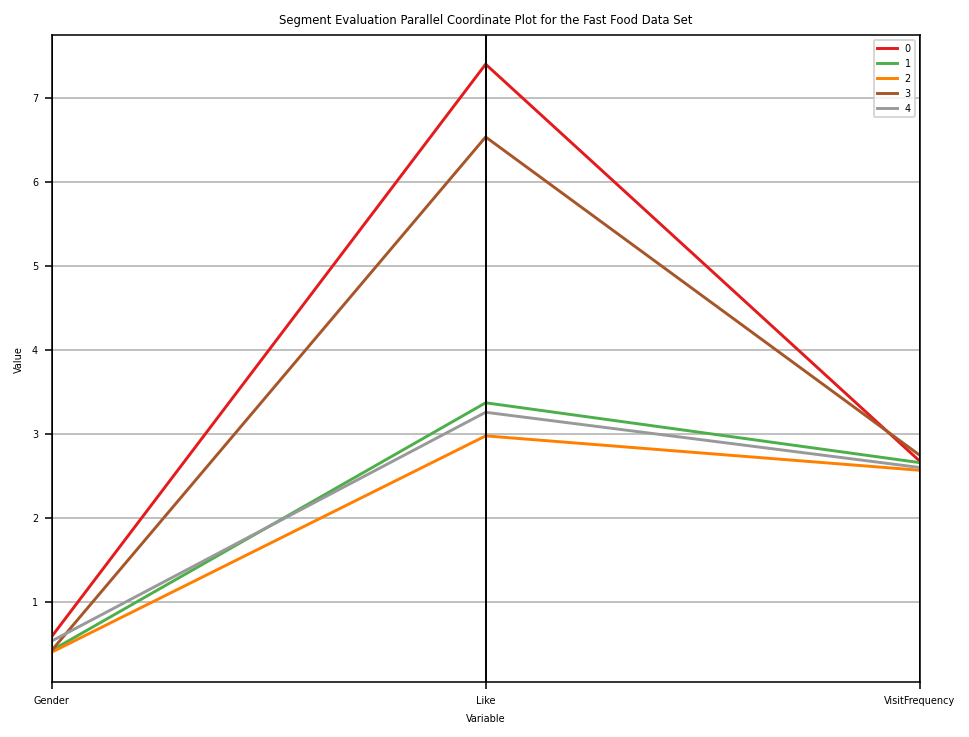

In [199]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8, 6))
parallel_coordinates(segment, 'cluster_num', colormap='Set1')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Segment Evaluation Parallel Coordinate Plot for the Fast Food Data Set')
plt.show()